### crop ROI --> bg cleaned --> augmented 

In [2]:
import os
import cv2
import pandas as pd

def crop_roi(image_dirs, annotation_csvs, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for img_dir, csv_path in zip(image_dirs, annotation_csvs):
        df = pd.read_csv(csv_path)
        for idx, row in df.iterrows():
            filename = row['filename']
            xmin, ymin, xmax, ymax = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
            img_path = os.path.join(img_dir, filename)
            if os.path.exists(img_path):
                img = cv2.imread(img_path)
                crop = img[ymin:ymax, xmin:xmax]
                out_path = os.path.join(output_dir, filename)
                cv2.imwrite(out_path, crop)
            else:
                print(f"Image not found: {img_path}")

In [3]:
image_dirs = [
    r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\raw\train",
    r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\raw\test"
]
annotation_csvs = [
    r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\raw\train\_annotations.csv",
    r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\raw\test\_annotations.csv"
]
output_dir = r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\processed\01_crop_roi"

crop_roi(image_dirs, annotation_csvs, output_dir)

In [4]:
import os
import shutil
import pandas as pd

def move_by_class(image_dir, annotation_csvs, output_dir, class_map):
    dfs = []
    for csv in annotation_csvs:
        df = pd.read_csv(csv)
        dfs.append(df)
    all_annots = pd.concat(dfs, ignore_index=True)
    
    filename2class = dict(zip(all_annots['filename'], all_annots['class']))
    
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            label = filename2class.get(filename, None)
            if label is None:
                print(f"Skip, {filename} is not found")
                continue
            folder = class_map.get(label, label)
            dest_folder = os.path.join(output_dir, folder)
            if not os.path.exists(dest_folder):
                os.makedirs(dest_folder)
            src_path = os.path.join(image_dir, filename)
            dest_path = os.path.join(dest_folder, filename)
            shutil.move(src_path, dest_path)

image_dir = r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\processed\01_crop_roi"
annotation_csvs = [
    r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\raw\train\_annotations.csv",
    r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\raw\test\_annotations.csv"
]
output_dir = r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\processed\01_crop_roi"
class_map = {
    'unripe': 'unripe',
    'semiripe': 'partial_ripe',
    'ripe': 'ripe',
    'rotten': 'overripe'
}

move_by_class(image_dir, annotation_csvs, output_dir, class_map)

In [5]:
from feature_extraction import (extract_rgb_his, extract_lab, extract_glcm, extract_lbp)

image_dirs = [
    r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\processed\02_cleaned\overripe",
    r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\processed\02_cleaned\partial_ripe",
    r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\processed\02_cleaned\ripe",
    r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\processed\02_cleaned\unripe"
]


In [6]:
extract_rgb_his(image_dirs, 
                        rgb_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_rgb_features.csv",
                        his_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_his_features.csv",
                        dataset="papaya_1",
                        resize=(128,128))

Processing 'papaya_1' (RGB+HIS)...


unripe: 100%|███████████████████████████████████████████████████████████████████████| 496/496 [00:03<00:00, 130.63it/s]

RGB values for papaya_1 saved in C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_rgb_features.csv, HIS values for papaya_1 saved in C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_his_features.csv


In [7]:
extract_lab(image_dirs, 
            save_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lab_features.csv", 
            dataset="papaya_1",
           resize=(128,128))

Processing 'papaya_1' (Lab)...


unripe: 100%|███████████████████████████████████████████████████████████████████████| 496/496 [00:01<00:00, 436.14it/s]

LAB values for papaya_1 saved in C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lab_features.csv


In [8]:
extract_lbp(image_dirs, 
            save_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lbp_features.csv",
            dataset="papaya_1", 
            resize=(128,128))

Processing 'papaya_1' (LBP)...


unripe: 100%|███████████████████████████████████████████████████████████████████████| 496/496 [00:01<00:00, 321.28it/s]


LBP values for papaya_1 saved in C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lbp_features.csv


In [9]:
extract_glcm(image_dirs, 
             save_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_glcm_features.csv", 
             dataset="papaya_1",
            resize=(128,128))

Processing 'papaya_1' (GLCM, angles=[0])...


unripe: 100%|███████████████████████████████████████████████████████████████████████| 496/496 [00:01<00:00, 388.66it/s]

GLCM values for papaya_1 (angles=[0]) saved in C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_glcm_features.csv


## Split test train class

In [11]:
from knn_classification import split_per_class

split_per_class(
    csv_path=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_rgb_features.csv",
    train_output=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_rgb_train.csv",
    test_output=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_rgb_test.csv",
    feature="128x128_papaya_1_rgb"
)

split_per_class(
    csv_path=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_his_features.csv",
    train_output=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_his_train.csv",
    test_output=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_his_test.csv",
    feature="128x1284_papaya_1_his"
)

split_per_class(
    csv_path=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lab_features.csv",
    train_output=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lab_train.csv",
    test_output=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lab_test.csv",
    feature="128x128_papaya_1_lab"
)


split_per_class(
    csv_path=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lbp_features.csv",
    train_output=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lbp_train.csv",
    test_output=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lbp_test.csv",
    feature="128x128_papaya_1_lbp"
)

split_per_class(
    csv_path=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_glcm_features.csv",
    train_output=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_glcm_train.csv",
    test_output=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_glcm_test.csv",
    feature="128x128_papaya_1_glcm"
)

 Train set for 128x128_papaya_1_rgb saved in C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_rgb_train.csv (1558 samples)
 Test set for 128x128_papaya_1_rgb saved in C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_rgb_test.csv (393 samples)
 Train set for 128x1284_papaya_1_his saved in C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_his_train.csv (1558 samples)
 Test set for 128x1284_papaya_1_his saved in C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_his_test.csv (393 samples)
 Train set for 128x128_papaya_1_lab saved in C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lab_train.csv (1558 samples)
 Test set for 128x128_papaya_1_lab saved in C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lab_test.csv (393 samples)
 Train set for 128x128_papaya_1_lbp saved in C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lbp_train.csv (1558 samples)
 Test set for 128x128_papaya_1_lbp saved in C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lbp_test.csv (393 samples)
 Train set

## KNN = 1,3,5,7


--- KNN (k=1) on 128x128_papaya_1_rgb Feature ---
              precision    recall  f1-score   support

      unripe     0.9804    1.0000    0.9901       100
partial_ripe     0.8958    0.9451    0.9198        91
        ripe     0.9101    0.8901    0.9000        91
    overripe     0.9434    0.9009    0.9217       111

    accuracy                         0.9338       393
   macro avg     0.9324    0.9340    0.9329       393
weighted avg     0.9341    0.9338    0.9336       393

Training time: 0.0010 seconds


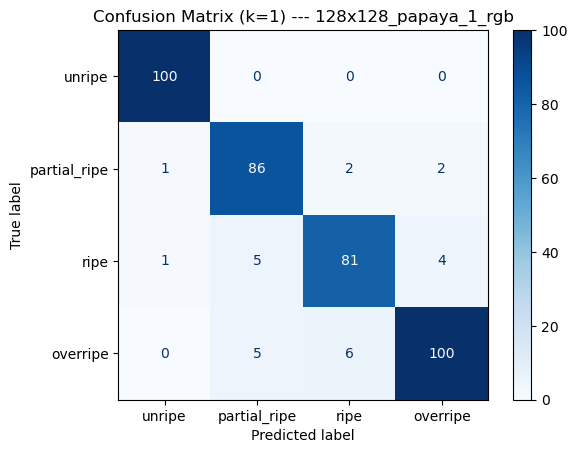

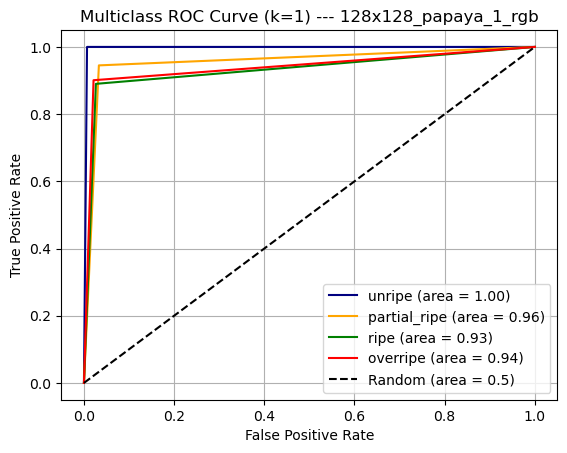


--- KNN (k=3) on 128x128_papaya_1_rgb Feature ---
              precision    recall  f1-score   support

      unripe     0.9900    0.9900    0.9900       100
partial_ripe     0.8854    0.9341    0.9091        91
        ripe     0.8750    0.8462    0.8603        91
    overripe     0.9083    0.8919    0.9000       111

    accuracy                         0.9160       393
   macro avg     0.9147    0.9155    0.9149       393
weighted avg     0.9161    0.9160    0.9158       393

Training time: 0.0020 seconds


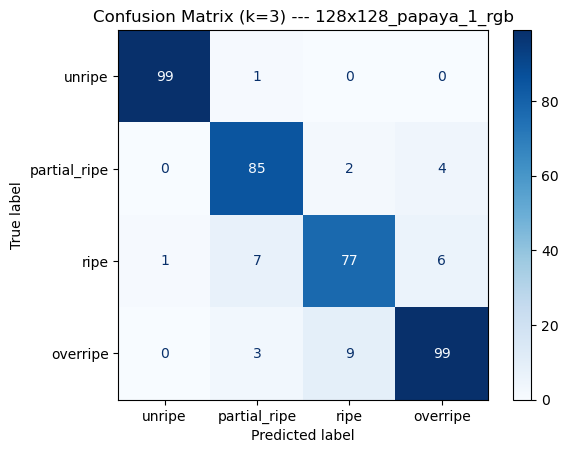

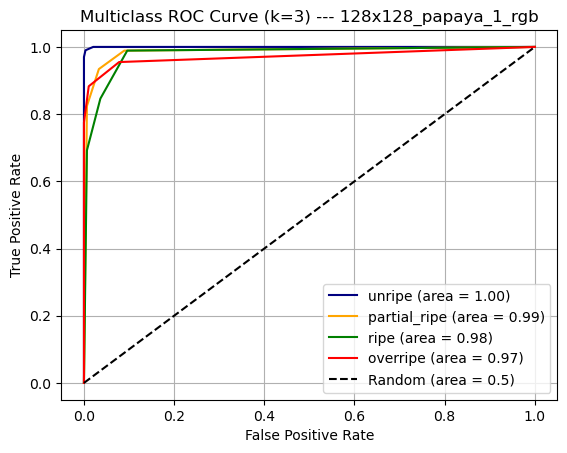


--- KNN (k=5) on 128x128_papaya_1_rgb Feature ---
              precision    recall  f1-score   support

      unripe     0.9900    0.9900    0.9900       100
partial_ripe     0.8673    0.9341    0.8995        91
        ripe     0.8721    0.8242    0.8475        91
    overripe     0.8899    0.8739    0.8818       111

    accuracy                         0.9059       393
   macro avg     0.9048    0.9055    0.9047       393
weighted avg     0.9060    0.9059    0.9055       393

Training time: 0.0030 seconds


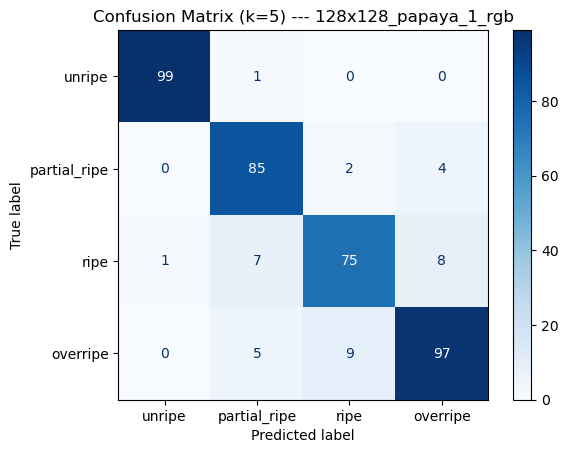

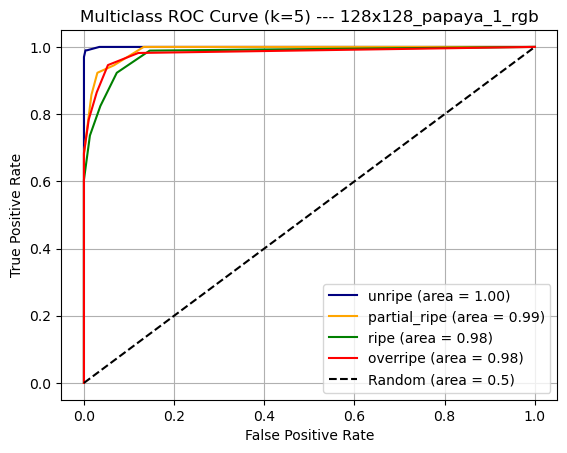


--- KNN (k=7) on 128x128_papaya_1_rgb Feature ---
              precision    recall  f1-score   support

      unripe     0.9900    0.9900    0.9900       100
partial_ripe     0.8763    0.9341    0.9043        91
        ripe     0.8824    0.8242    0.8523        91
    overripe     0.9009    0.9009    0.9009       111

    accuracy                         0.9135       393
   macro avg     0.9124    0.9123    0.9119       393
weighted avg     0.9136    0.9135    0.9131       393

Training time: 0.0030 seconds


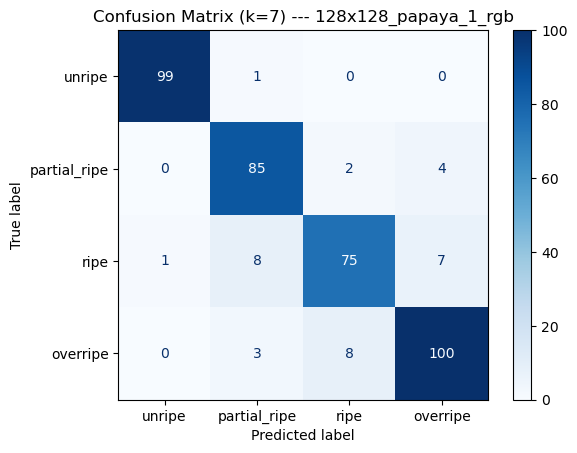

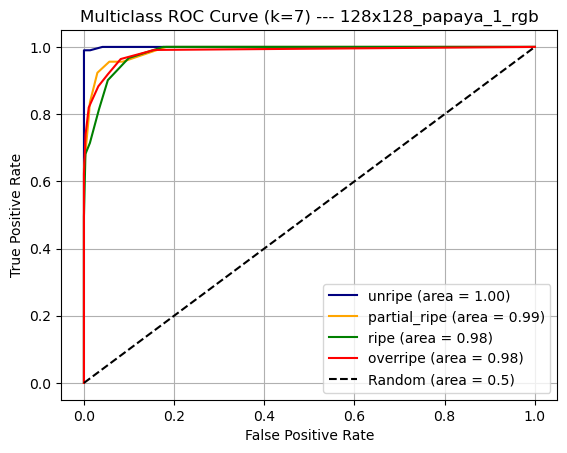


--- KNN (k=10) on 128x128_papaya_1_rgb Feature ---
              precision    recall  f1-score   support

      unripe     0.9900    0.9900    0.9900       100
partial_ripe     0.8750    0.9231    0.8984        91
        ripe     0.8690    0.8022    0.8343        91
    overripe     0.8761    0.8919    0.8839       111

    accuracy                         0.9033       393
   macro avg     0.9025    0.9018    0.9017       393
weighted avg     0.9032    0.9033    0.9028       393

Training time: 0.0020 seconds


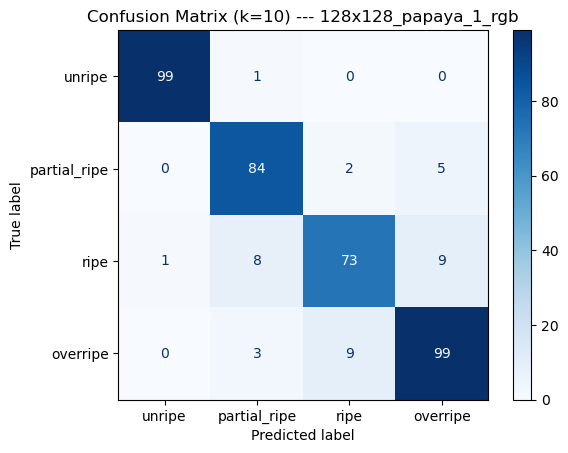

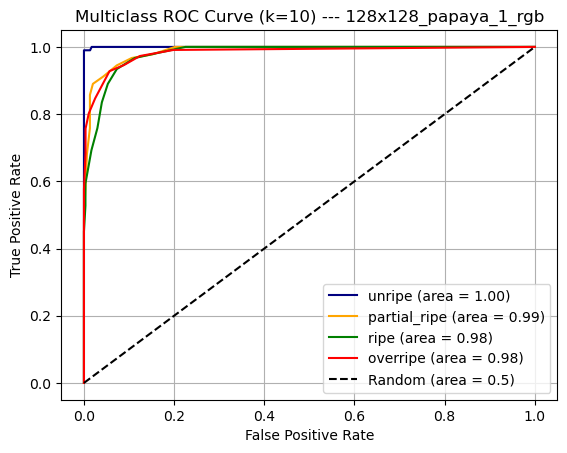

Results saved to knn_k_comparison_metrics.csv


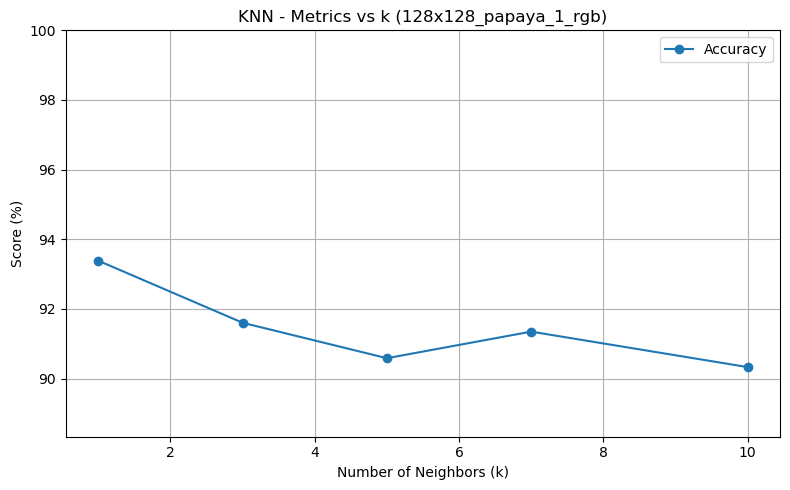

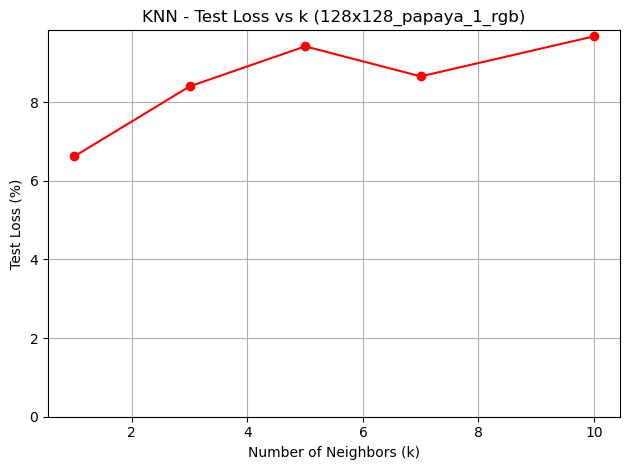

k  Accuracy (%)  Precision (%)  Recall (%)  F1-score (%)  Test Loss (%)  \
0   1     93.384224      93.408971   93.384224     93.362489       6.615776   
1   3     91.603053      91.606725   91.603053     91.582131       8.396947   
2   5     90.585242      90.602762   90.585242     90.547663       9.414758   
3   7     91.348601      91.357859   91.348601     91.308919       8.651399   
4  10     90.330789      90.319624   90.330789     90.277375       9.669211   

   Training Time (s)  
0           0.001000  
1           0.002001  
2           0.002999  
3           0.003000  
4           0.002000

In [13]:
from knn_classification import knn_classification

knn_classification(
    train_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_rgb_train.csv", 
    test_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_rgb_test.csv",
    feature="128x128_papaya_1_rgb",
    class_order=['unripe', 'partial_ripe', 'ripe', 'overripe']
)



--- KNN (k=1) on 128x128_papaya_1_his Feature ---
              precision    recall  f1-score   support

      unripe     0.9703    0.9800    0.9751       100
partial_ripe     0.8989    0.8791    0.8889        91
        ripe     0.8721    0.8242    0.8475        91
    overripe     0.8718    0.9189    0.8947       111

    accuracy                         0.9033       393
   macro avg     0.9033    0.9006    0.9016       393
weighted avg     0.9032    0.9033    0.9029       393

Training time: 0.0020 seconds


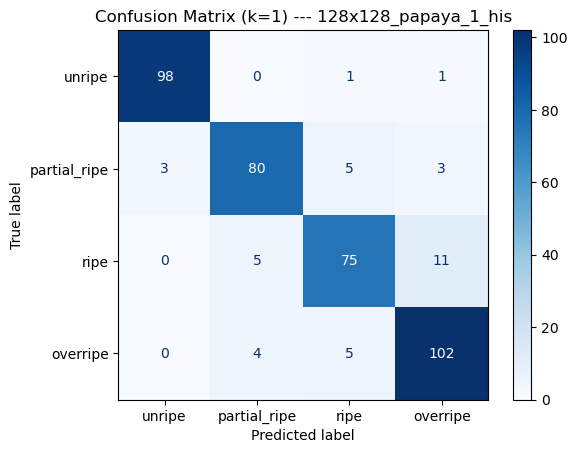

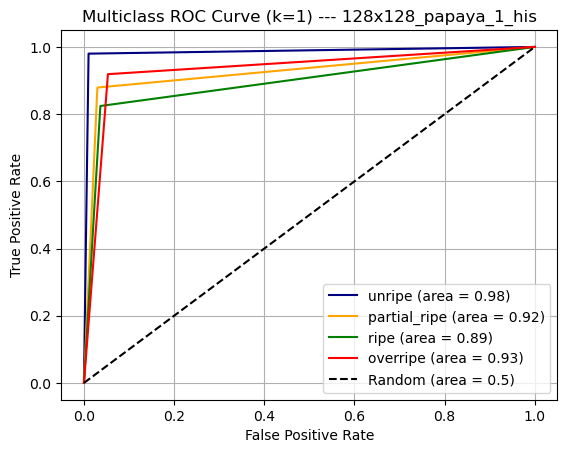


--- KNN (k=3) on 128x128_papaya_1_his Feature ---
              precision    recall  f1-score   support

      unripe     0.9706    0.9900    0.9802       100
partial_ripe     0.9070    0.8571    0.8814        91
        ripe     0.8636    0.8352    0.8492        91
    overripe     0.8889    0.9369    0.9123       111

    accuracy                         0.9084       393
   macro avg     0.9075    0.9048    0.9057       393
weighted avg     0.9080    0.9084    0.9078       393

Training time: 0.0030 seconds


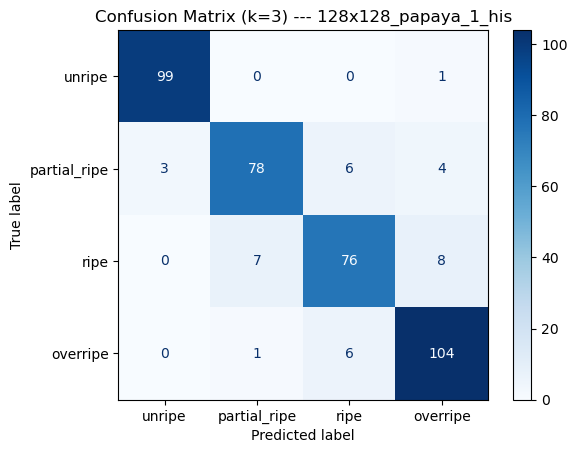

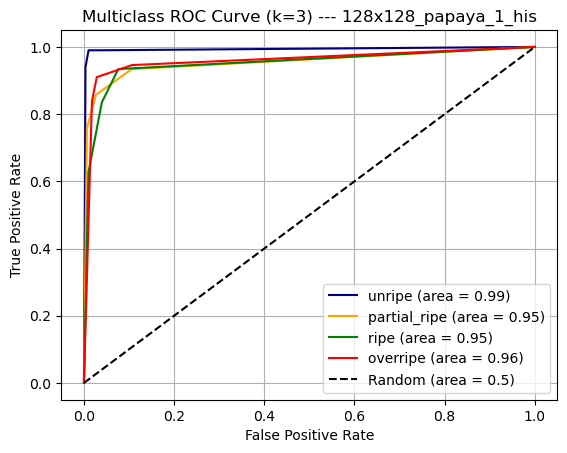


--- KNN (k=5) on 128x128_papaya_1_his Feature ---
              precision    recall  f1-score   support

      unripe     0.9706    0.9900    0.9802       100
partial_ripe     0.8571    0.8571    0.8571        91
        ripe     0.8636    0.8352    0.8492        91
    overripe     0.9107    0.9189    0.9148       111

    accuracy                         0.9033       393
   macro avg     0.9005    0.9003    0.9003       393
weighted avg     0.9026    0.9033    0.9029       393

Training time: 0.0030 seconds


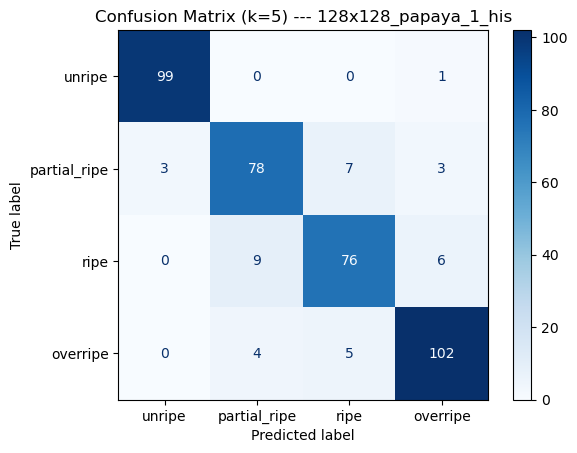

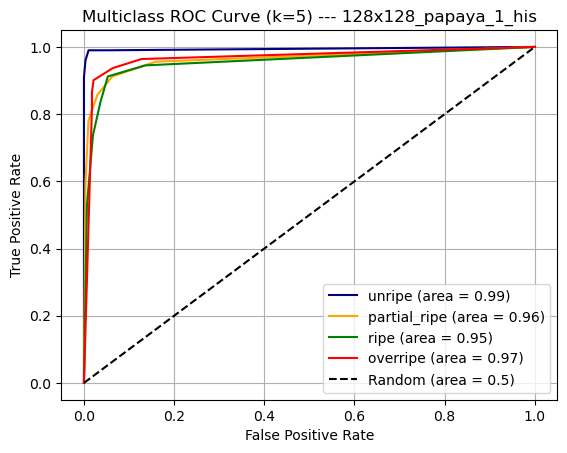


--- KNN (k=7) on 128x128_papaya_1_his Feature ---
              precision    recall  f1-score   support

      unripe     0.9802    0.9900    0.9851       100
partial_ripe     0.8901    0.8901    0.8901        91
        ripe     0.8495    0.8681    0.8587        91
    overripe     0.9259    0.9009    0.9132       111

    accuracy                         0.9135       393
   macro avg     0.9114    0.9123    0.9118       393
weighted avg     0.9137    0.9135    0.9135       393

Training time: 0.0030 seconds


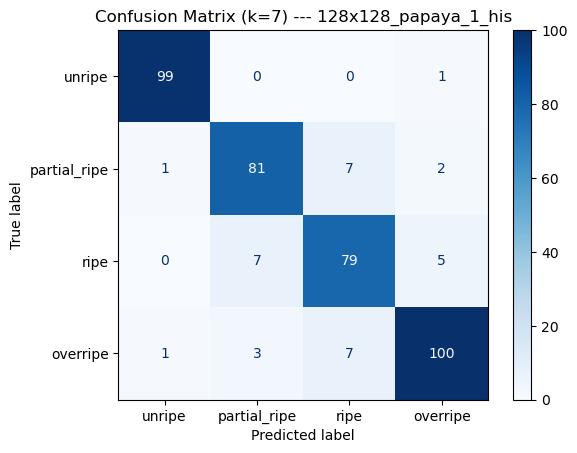

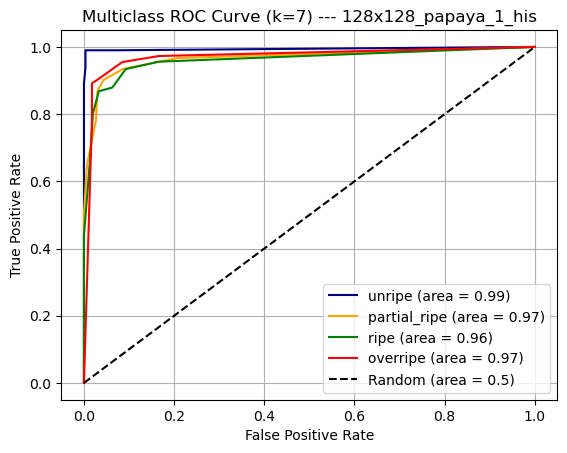


--- KNN (k=10) on 128x128_papaya_1_his Feature ---
              precision    recall  f1-score   support

      unripe     0.9608    0.9800    0.9703       100
partial_ripe     0.8710    0.8901    0.8804        91
        ripe     0.8876    0.8681    0.8778        91
    overripe     0.9266    0.9099    0.9182       111

    accuracy                         0.9135       393
   macro avg     0.9115    0.9120    0.9117       393
weighted avg     0.9134    0.9135    0.9133       393

Training time: 0.0030 seconds


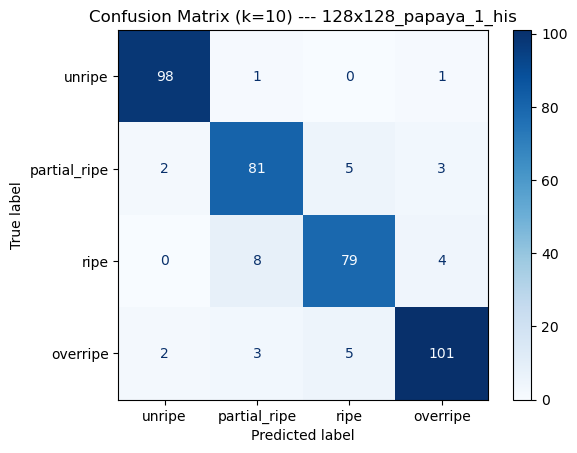

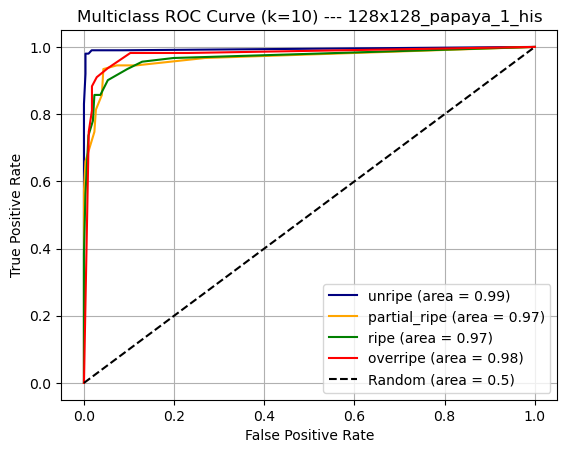

Results saved to knn_k_comparison_metrics.csv


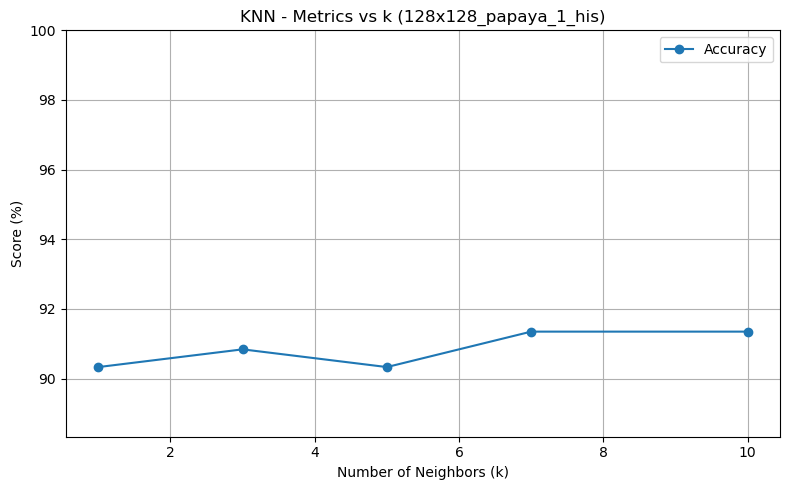

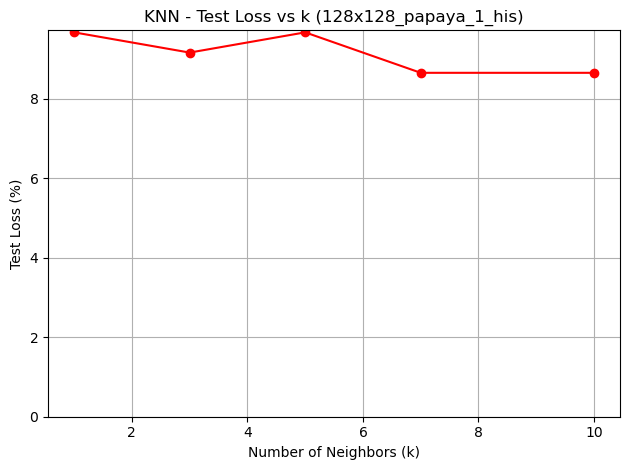

k  Accuracy (%)  Precision (%)  Recall (%)  F1-score (%)  Test Loss (%)  \
0   1     90.330789      90.319886   90.330789     90.288998       9.669211   
1   3     90.839695      90.801853   90.839695     90.778650       9.160305   
2   5     90.330789      90.264381   90.330789     90.289096       9.669211   
3   7     91.348601      91.373704   91.348601     91.353341       8.651399   
4  10     91.348601      91.339692   91.348601     91.334664       8.651399   

   Training Time (s)  
0           0.002000  
1           0.002999  
2           0.003002  
3           0.003001  
4           0.003000

In [14]:
from knn_classification import knn_classification

knn_classification(
    train_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_his_train.csv", 
    test_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_his_test.csv",
    feature="128x128_papaya_1_his",
    class_order=['unripe', 'partial_ripe', 'ripe', 'overripe']
)



--- KNN (k=1) on 128x128_papaya_1_lab Feature ---
              precision    recall  f1-score   support

      unripe     0.9703    0.9800    0.9751       100
partial_ripe     0.9091    0.8791    0.8939        91
        ripe     0.9140    0.9341    0.9239        91
    overripe     0.9820    0.9820    0.9820       111

    accuracy                         0.9466       393
   macro avg     0.9438    0.9438    0.9437       393
weighted avg     0.9464    0.9466    0.9464       393

Training time: 0.0020 seconds


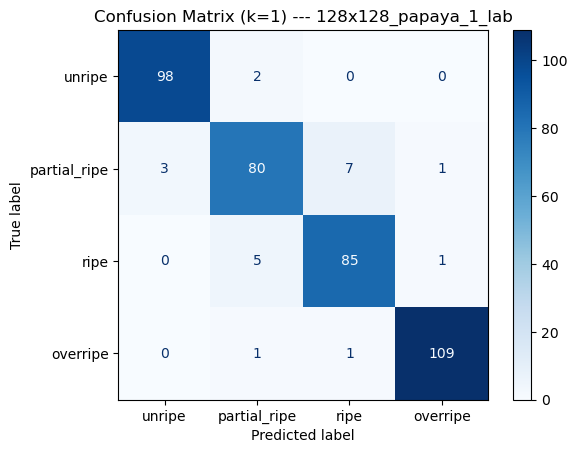

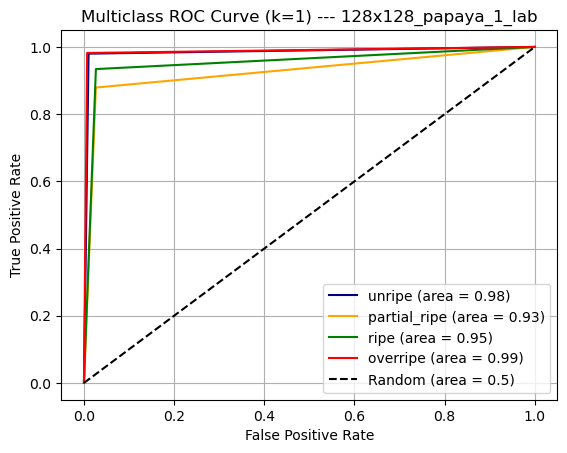


--- KNN (k=3) on 128x128_papaya_1_lab Feature ---
              precision    recall  f1-score   support

      unripe     0.9899    0.9800    0.9849       100
partial_ripe     0.9205    0.8901    0.9050        91
        ripe     0.9130    0.9231    0.9180        91
    overripe     0.9561    0.9820    0.9689       111

    accuracy                         0.9466       393
   macro avg     0.9449    0.9438    0.9442       393
weighted avg     0.9465    0.9466    0.9464       393

Training time: 0.0020 seconds


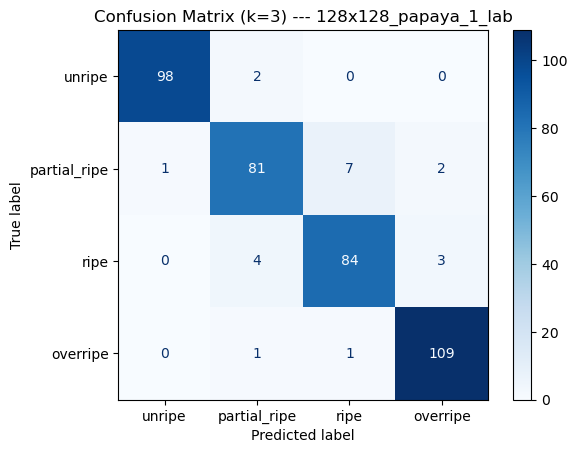

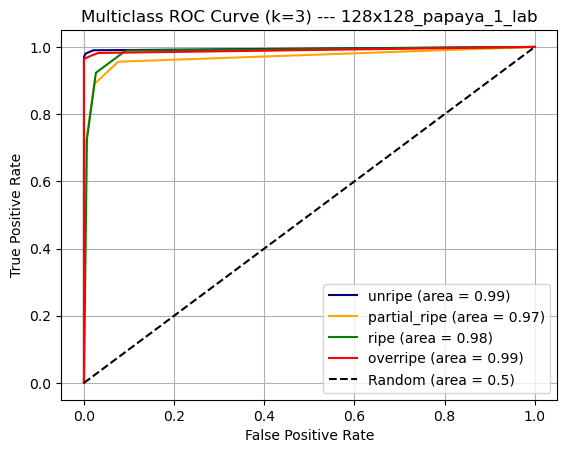


--- KNN (k=5) on 128x128_papaya_1_lab Feature ---
              precision    recall  f1-score   support

      unripe     1.0000    0.9800    0.9899       100
partial_ripe     0.9101    0.8901    0.9000        91
        ripe     0.9032    0.9231    0.9130        91
    overripe     0.9646    0.9820    0.9732       111

    accuracy                         0.9466       393
   macro avg     0.9445    0.9438    0.9440       393
weighted avg     0.9468    0.9466    0.9466       393

Training time: 0.0020 seconds


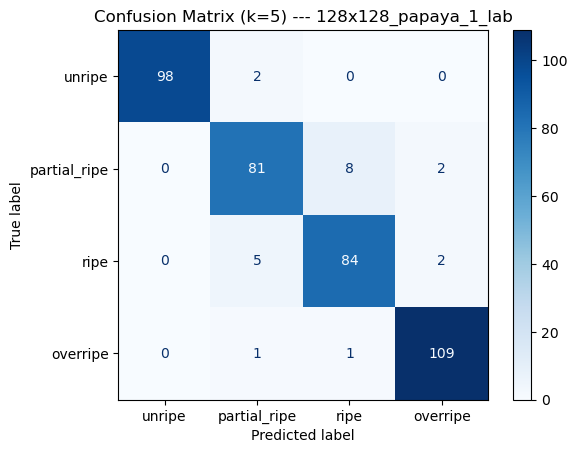

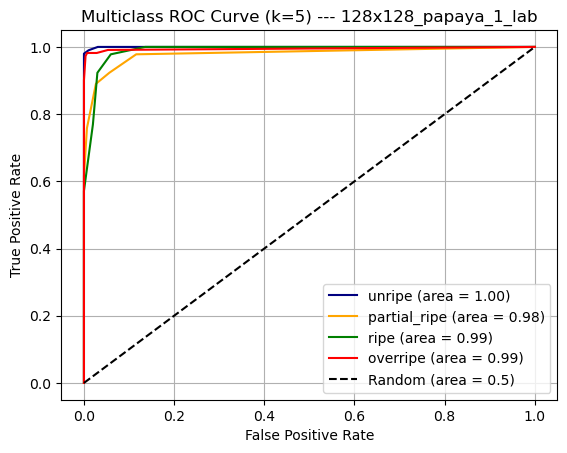


--- KNN (k=7) on 128x128_papaya_1_lab Feature ---
              precision    recall  f1-score   support

      unripe     1.0000    0.9900    0.9950       100
partial_ripe     0.9213    0.9011    0.9111        91
        ripe     0.9121    0.9121    0.9121        91
    overripe     0.9561    0.9820    0.9689       111

    accuracy                         0.9491       393
   macro avg     0.9474    0.9463    0.9468       393
weighted avg     0.9490    0.9491    0.9490       393

Training time: 0.0020 seconds


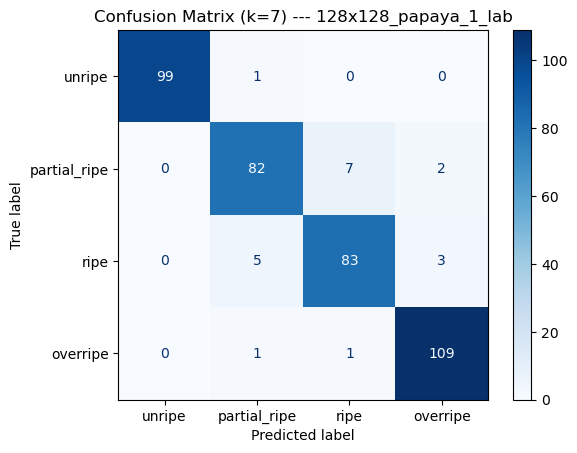

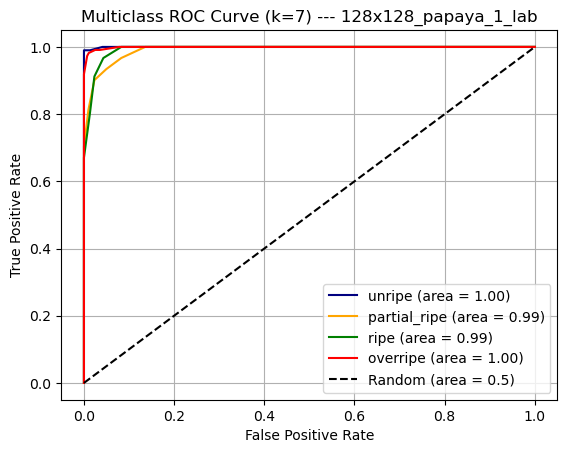


--- KNN (k=10) on 128x128_papaya_1_lab Feature ---
              precision    recall  f1-score   support

      unripe     0.9899    0.9800    0.9849       100
partial_ripe     0.8804    0.8901    0.8852        91
        ripe     0.9080    0.8681    0.8876        91
    overripe     0.9478    0.9820    0.9646       111

    accuracy                         0.9338       393
   macro avg     0.9316    0.9301    0.9306       393
weighted avg     0.9337    0.9338    0.9336       393

Training time: 0.0030 seconds


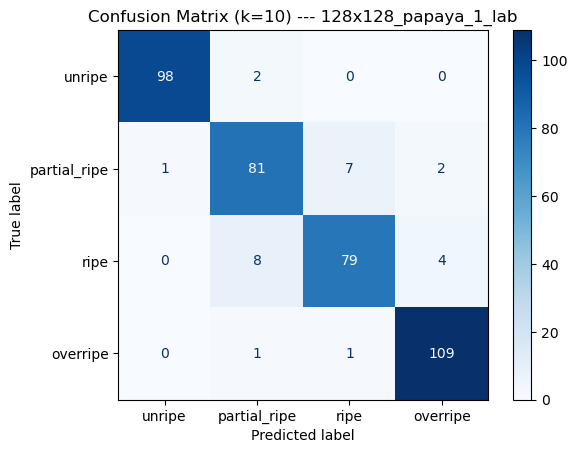

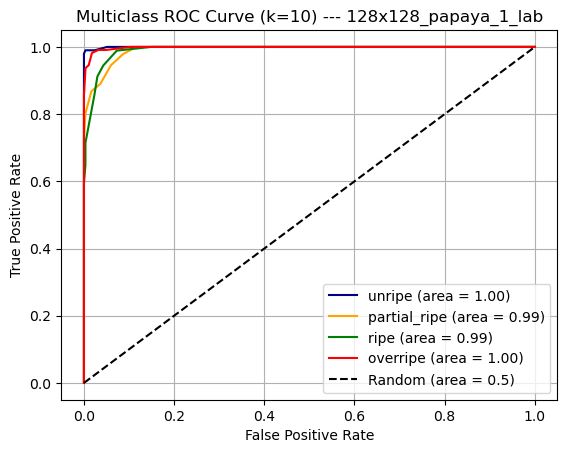

Results saved to knn_k_comparison_metrics.csv


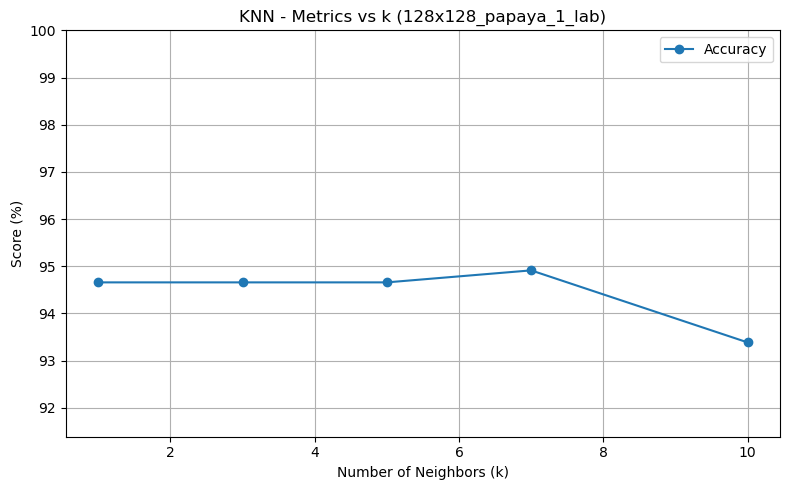

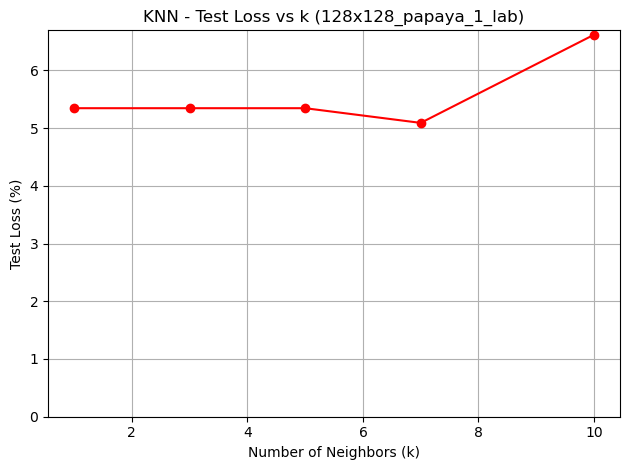

k  Accuracy (%)  Precision (%)  Recall (%)  F1-score (%)  Test Loss (%)  \
0   1     94.656489      94.638427   94.656489     94.638500       5.343511   
1   3     94.656489      94.648804   94.656489     94.640625       5.343511   
2   5     94.656489      94.678008   94.656489     94.657415       5.343511   
3   7     94.910941      94.904396   94.910941     94.899559       5.089059   
4  10     93.384224      93.371589   93.384224     93.357740       6.615776   

   Training Time (s)  
0           0.001998  
1           0.002001  
2           0.001999  
3           0.002005  
4           0.002998

In [15]:
from knn_classification import knn_classification

knn_classification(
    train_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lab_train.csv", 
    test_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lab_test.csv",
    feature="128x128_papaya_1_lab",
    class_order=['unripe', 'partial_ripe', 'ripe', 'overripe']
)



--- KNN (k=1) on 128x128_papaya_1_lbp Feature ---
              precision    recall  f1-score   support

      unripe     0.8000    0.8800    0.8381       100
partial_ripe     0.8554    0.7802    0.8161        91
        ripe     0.8000    0.7912    0.7956        91
    overripe     1.0000    0.9910    0.9955       111

    accuracy                         0.8677       393
   macro avg     0.8639    0.8606    0.8613       393
weighted avg     0.8693    0.8677    0.8676       393

Training time: 0.0010 seconds


C:\Users\User\anaconda3\envs\fyp_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\anaconda3\envs\fyp_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\User\anaconda3\envs\fyp_env\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\User\anaconda3\envs\fyp_env\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\User\anaconda3\envs\fyp_env\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(exec

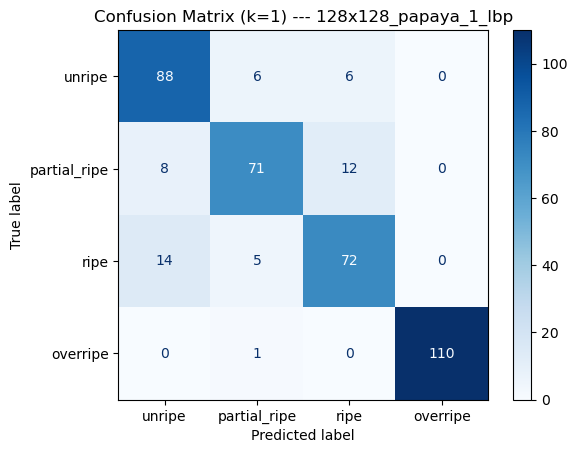

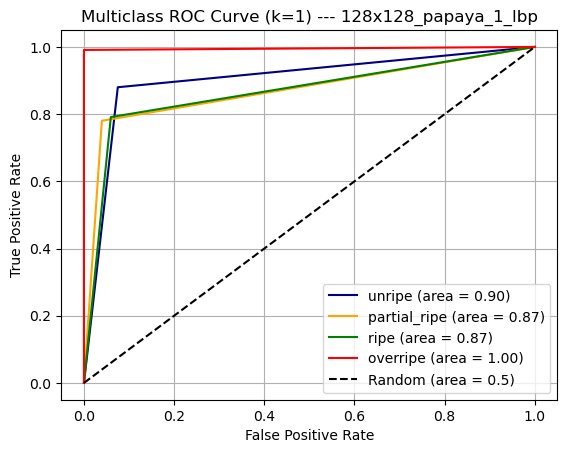


--- KNN (k=3) on 128x128_papaya_1_lbp Feature ---
              precision    recall  f1-score   support

      unripe     0.8073    0.8800    0.8421       100
partial_ripe     0.7778    0.8462    0.8105        91
        ripe     0.8133    0.6703    0.7349        91
    overripe     1.0000    0.9910    0.9955       111

    accuracy                         0.8550       393
   macro avg     0.8496    0.8469    0.8458       393
weighted avg     0.8563    0.8550    0.8533       393

Training time: 0.0010 seconds


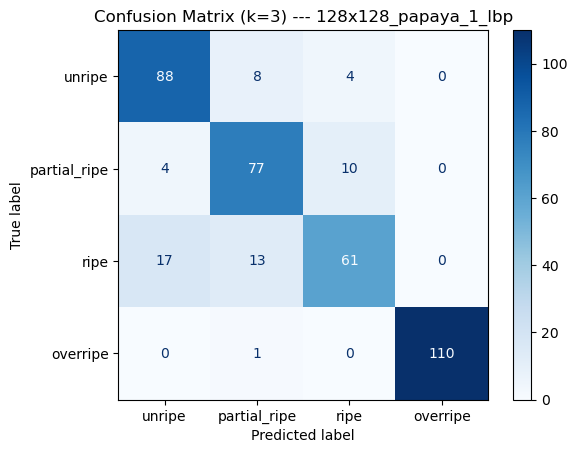

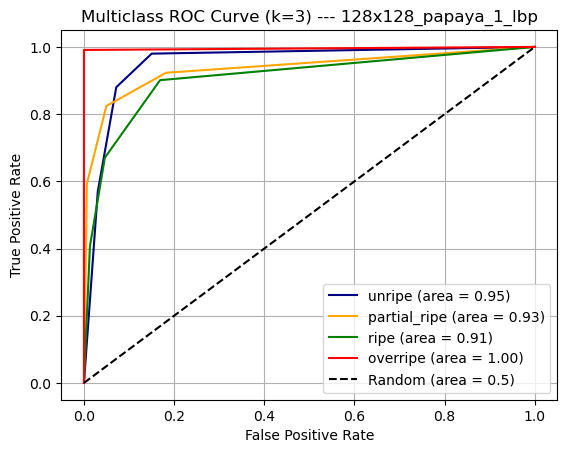


--- KNN (k=5) on 128x128_papaya_1_lbp Feature ---
              precision    recall  f1-score   support

      unripe     0.7982    0.8700    0.8325       100
partial_ripe     0.7857    0.8462    0.8148        91
        ripe     0.7632    0.6374    0.6946        91
    overripe     1.0000    0.9910    0.9955       111

    accuracy                         0.8448       393
   macro avg     0.8368    0.8361    0.8344       393
weighted avg     0.8442    0.8448    0.8425       393

Training time: 0.0020 seconds


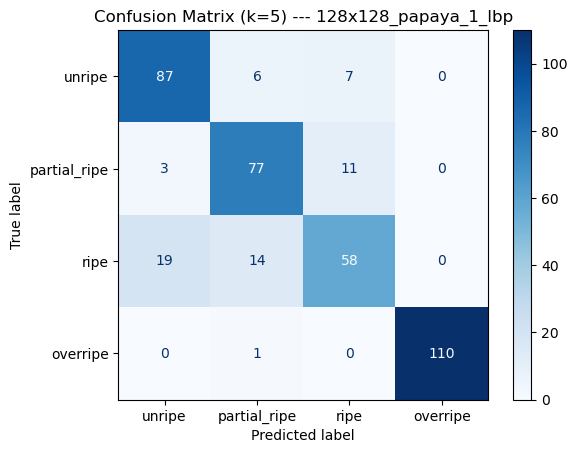

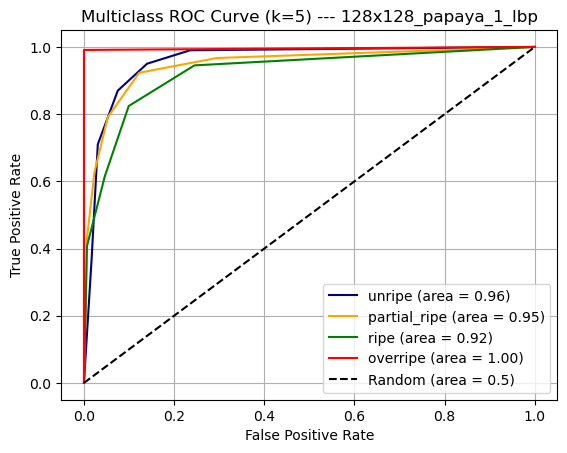


--- KNN (k=7) on 128x128_papaya_1_lbp Feature ---
              precision    recall  f1-score   support

      unripe     0.7857    0.8800    0.8302       100
partial_ripe     0.7647    0.8571    0.8083        91
        ripe     0.8116    0.6154    0.7000        91
    overripe     1.0000    0.9910    0.9955       111

    accuracy                         0.8448       393
   macro avg     0.8405    0.8359    0.8335       393
weighted avg     0.8474    0.8448    0.8417       393

Training time: 0.0017 seconds


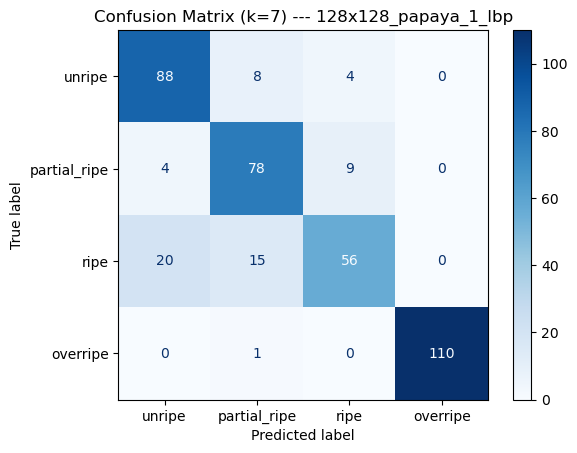

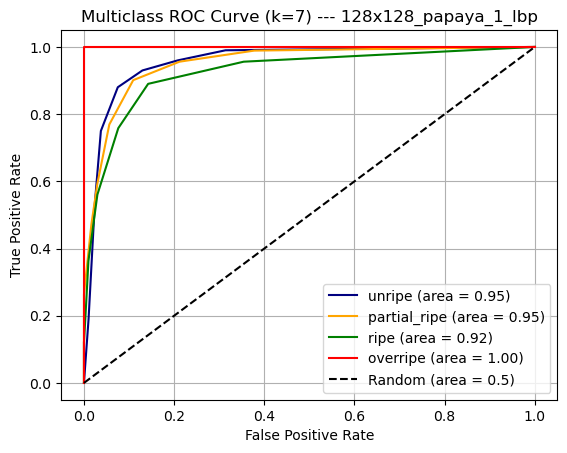


--- KNN (k=10) on 128x128_papaya_1_lbp Feature ---
              precision    recall  f1-score   support

      unripe     0.7807    0.8900    0.8318       100
partial_ripe     0.7353    0.8242    0.7772        91
        ripe     0.7910    0.5824    0.6709        91
    overripe     1.0000    0.9910    0.9955       111

    accuracy                         0.8321       393
   macro avg     0.8268    0.8219    0.8188       393
weighted avg     0.8345    0.8321    0.8281       393

Training time: 0.0010 seconds


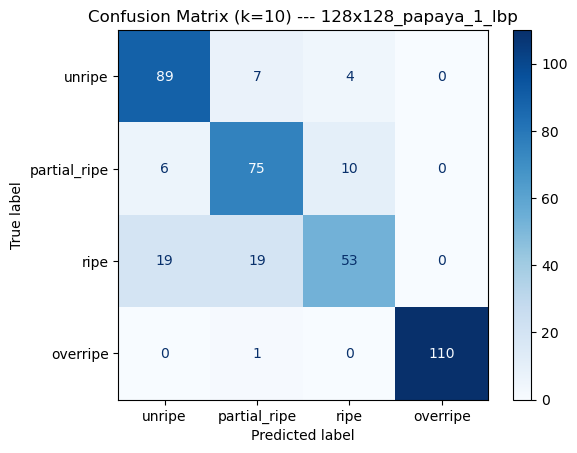

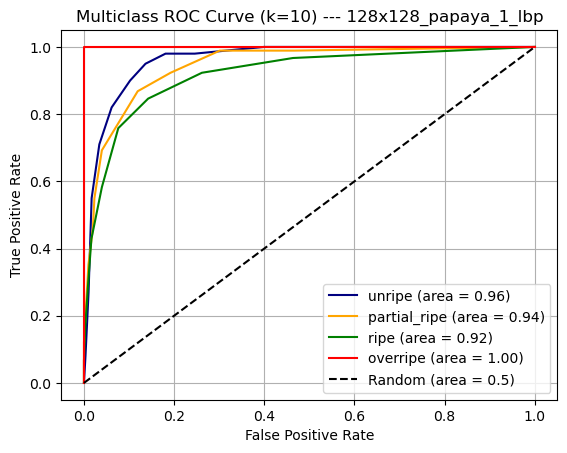

Results saved to knn_k_comparison_metrics.csv


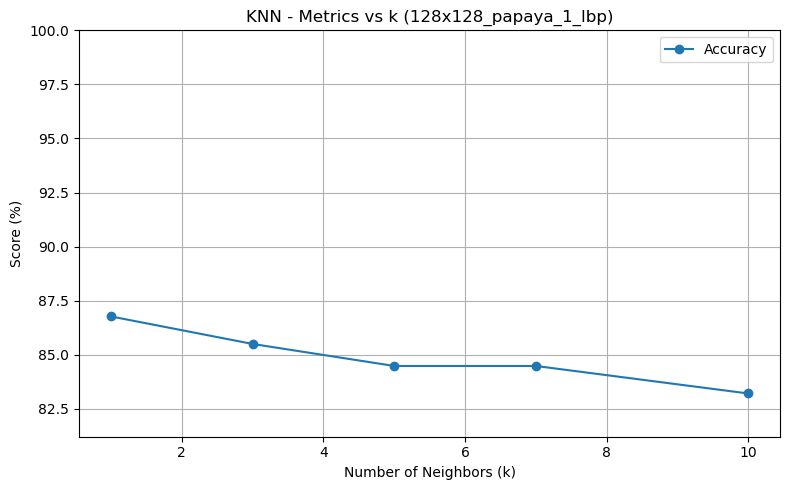

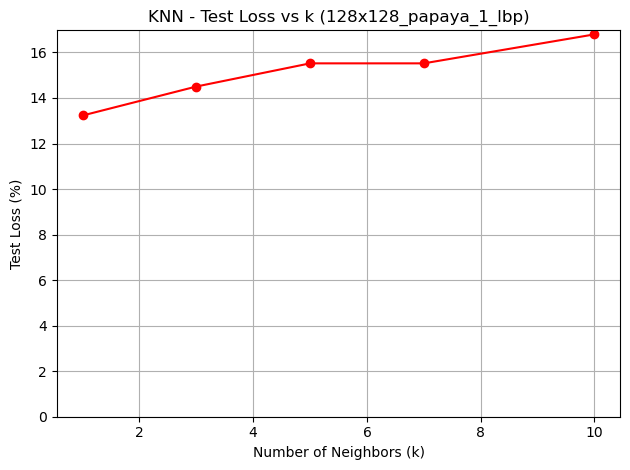

k  Accuracy (%)  Precision (%)  Recall (%)  F1-score (%)  Test Loss (%)  \
0   1     86.768448      86.932156   86.768448     86.760666      13.231552   
1   3     85.496183      85.629785   85.496183     85.329689      14.503817   
2   5     84.478372      84.418291   84.478372     84.251668      15.521628   
3   7     84.478372      84.736574   84.478372     84.165651      15.521628   
4  10     83.206107      83.452167   83.206107     82.812043      16.793893   

   Training Time (s)  
0           0.001000  
1           0.001000  
2           0.002000  
3           0.001744  
4           0.001001

In [16]:
from knn_classification import knn_classification

knn_classification(
    train_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lbp_train.csv", 
    test_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lbp_test.csv",
    feature="128x128_papaya_1_lbp",
    class_order=['unripe', 'partial_ripe', 'ripe', 'overripe']
)



--- KNN (k=1) on 128x128_papaya_1_glcm Feature ---
              precision    recall  f1-score   support

      unripe     0.9278    0.9000    0.9137       100
partial_ripe     0.9080    0.8681    0.8876        91
        ripe     0.8182    0.8901    0.8526        91
    overripe     1.0000    0.9910    0.9955       111

    accuracy                         0.9160       393
   macro avg     0.9135    0.9123    0.9124       393
weighted avg     0.9182    0.9160    0.9166       393

Training time: 0.0020 seconds


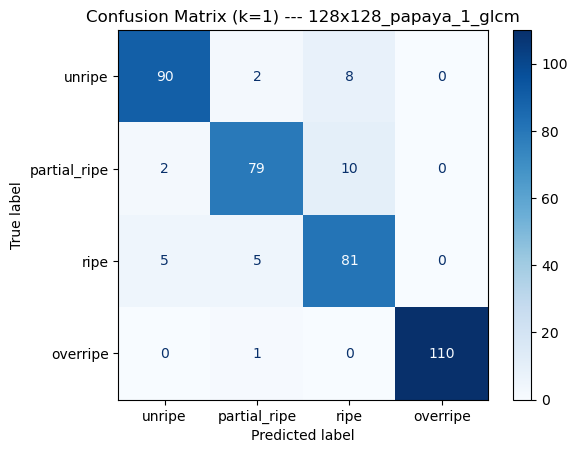

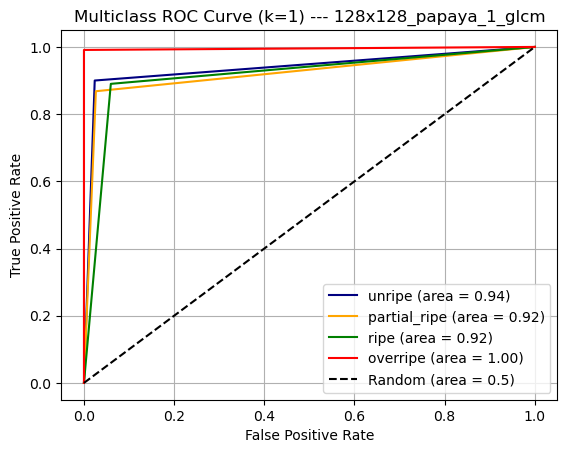


--- KNN (k=3) on 128x128_papaya_1_glcm Feature ---
              precision    recall  f1-score   support

      unripe     0.9038    0.9400    0.9216       100
partial_ripe     0.8750    0.8462    0.8603        91
        ripe     0.8352    0.8352    0.8352        91
    overripe     1.0000    0.9910    0.9955       111

    accuracy                         0.9084       393
   macro avg     0.9035    0.9031    0.9031       393
weighted avg     0.9084    0.9084    0.9083       393

Training time: 0.0030 seconds


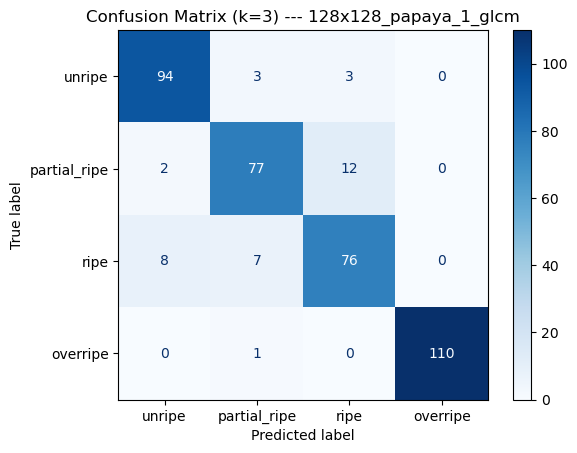

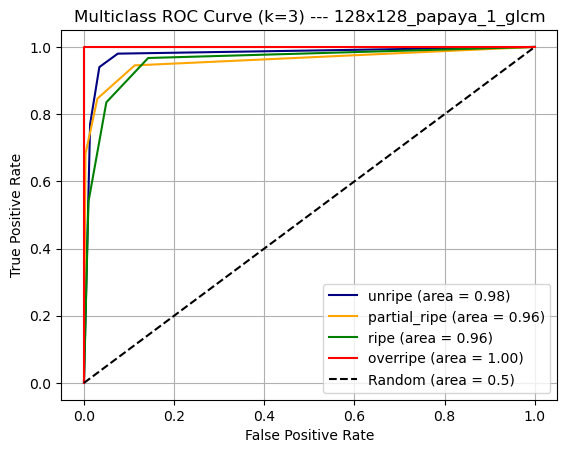


--- KNN (k=5) on 128x128_papaya_1_glcm Feature ---
              precision    recall  f1-score   support

      unripe     0.8952    0.9400    0.9171       100
partial_ripe     0.8989    0.8791    0.8889        91
        ripe     0.8636    0.8352    0.8492        91
    overripe     1.0000    1.0000    1.0000       111

    accuracy                         0.9186       393
   macro avg     0.9144    0.9136    0.9138       393
weighted avg     0.9184    0.9186    0.9182       393

Training time: 0.0030 seconds


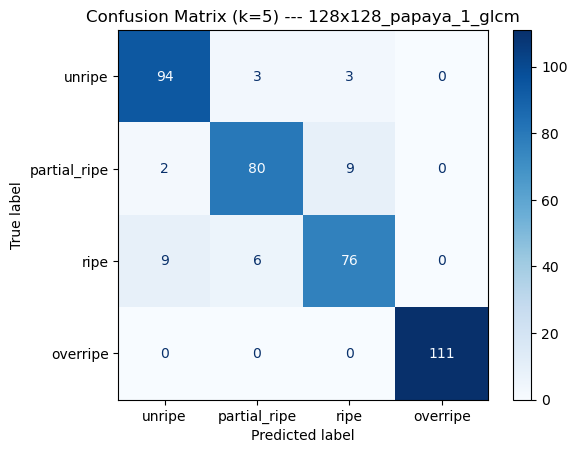

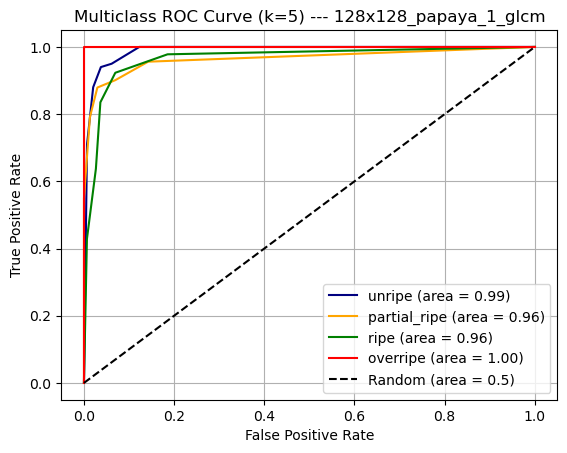


--- KNN (k=7) on 128x128_papaya_1_glcm Feature ---
              precision    recall  f1-score   support

      unripe     0.9020    0.9200    0.9109       100
partial_ripe     0.8889    0.8791    0.8840        91
        ripe     0.8667    0.8571    0.8619        91
    overripe     1.0000    1.0000    1.0000       111

    accuracy                         0.9186       393
   macro avg     0.9144    0.9141    0.9142       393
weighted avg     0.9185    0.9186    0.9185       393

Training time: 0.0030 seconds


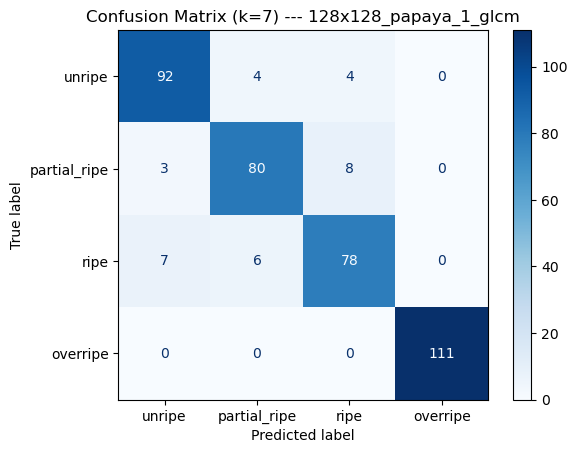

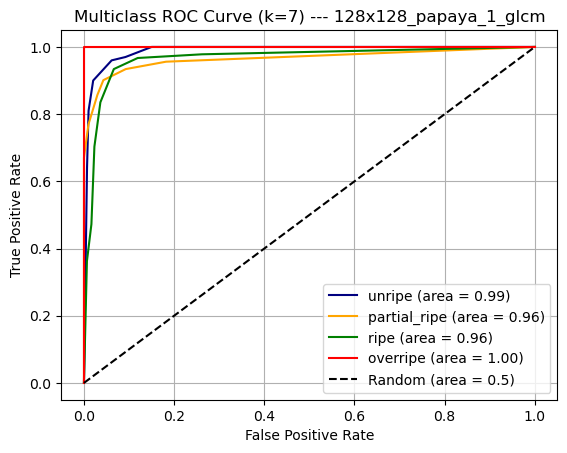


--- KNN (k=10) on 128x128_papaya_1_glcm Feature ---
              precision    recall  f1-score   support

      unripe     0.8704    0.9400    0.9038       100
partial_ripe     0.8977    0.8681    0.8827        91
        ripe     0.8605    0.8132    0.8362        91
    overripe     1.0000    1.0000    1.0000       111

    accuracy                         0.9109       393
   macro avg     0.9071    0.9053    0.9057       393
weighted avg     0.9110    0.9109    0.9104       393

Training time: 0.0020 seconds


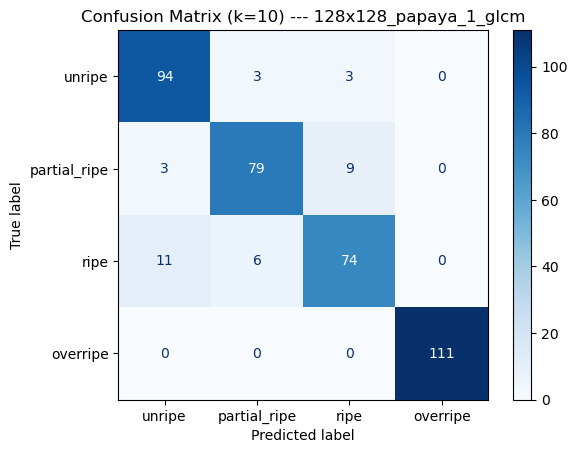

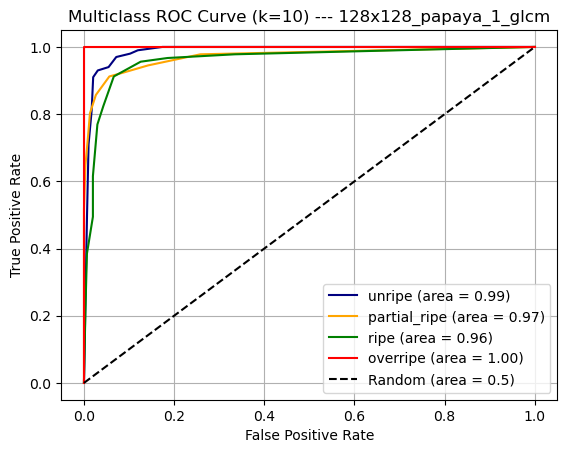

Results saved to knn_k_comparison_metrics.csv


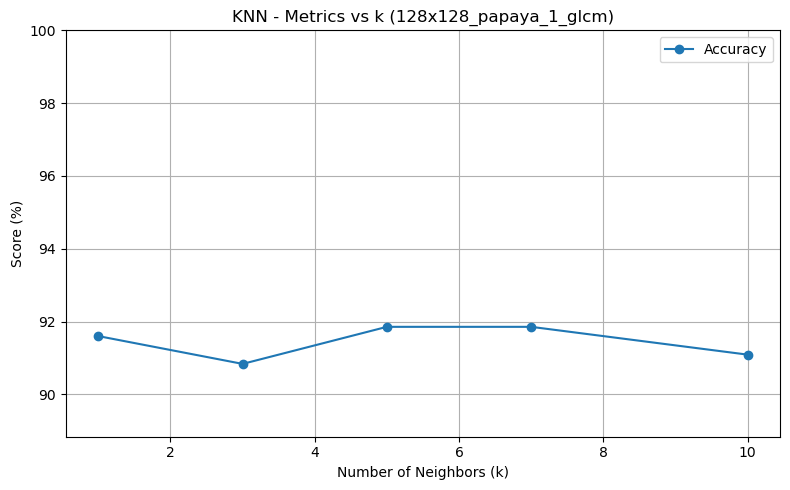

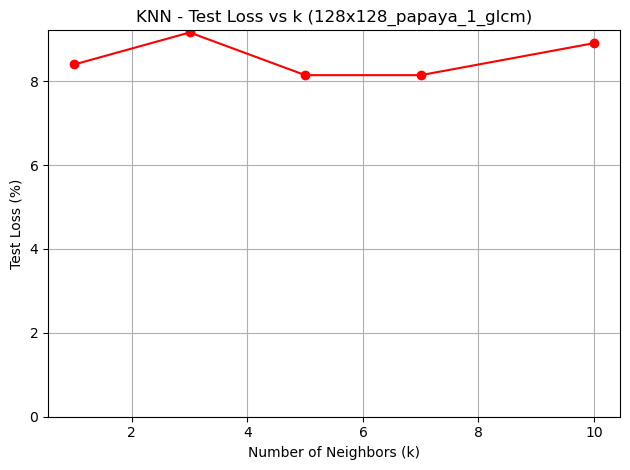

k  Accuracy (%)  Precision (%)  Recall (%)  F1-score (%)  Test Loss (%)  \
0   1     91.603053      91.824487   91.603053     91.662354       8.396947   
1   3     90.839695      90.842141   90.839695     90.825726       9.160305   
2   5     91.857506      91.835234   91.857506     91.824414       8.142494   
3   7     91.857506      91.845199   91.857506     91.847847       8.142494   
4  10     91.094148      91.102429   91.094148     91.043011       8.905852   

   Training Time (s)  
0           0.002000  
1           0.003003  
2           0.003000  
3           0.003001  
4           0.002000

In [17]:
from knn_classification import knn_classification

knn_classification(
    train_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_glcm_train.csv", 
    test_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_glcm_test.csv",
    feature="128x128_papaya_1_glcm",
    class_order=['unripe', 'partial_ripe', 'ripe', 'overripe']
)


## SVM


 Now running: 128x128_rgb

=== SVM (kernel=poly, degree=3, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9899    0.9800    0.9849       100
        ripe     0.8471    0.7912    0.8182        91

   micro avg     0.9239    0.8901    0.9067       191
   macro avg     0.9185    0.8856    0.9016       191
weighted avg     0.9218    0.8901    0.9055       191



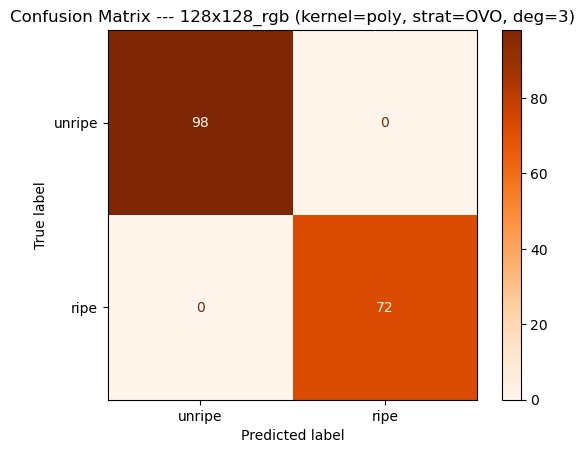


=== SVM (kernel=poly, degree=4, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9425    0.8200    0.8770       100
        ripe     0.8727    0.5275    0.6575        91

   micro avg     0.9155    0.6806    0.7808       191
   macro avg     0.9076    0.6737    0.7673       191
weighted avg     0.9093    0.6806    0.7724       191



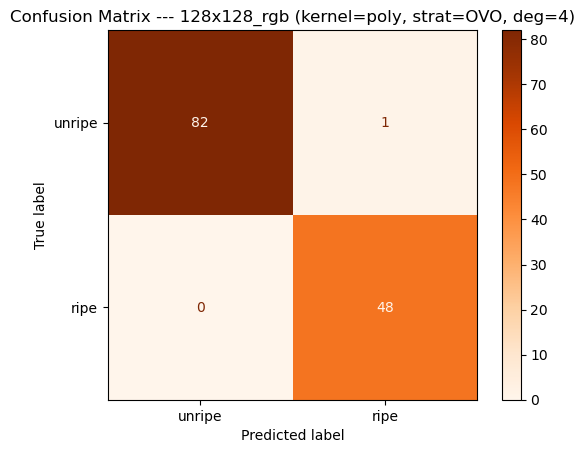


=== SVM (kernel=poly, degree=5, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9798    0.9700    0.9749       100
        ripe     0.9184    0.4945    0.6429        91

   micro avg     0.9595    0.7435    0.8378       191
   macro avg     0.9491    0.7323    0.8089       191
weighted avg     0.9505    0.7435    0.8167       191



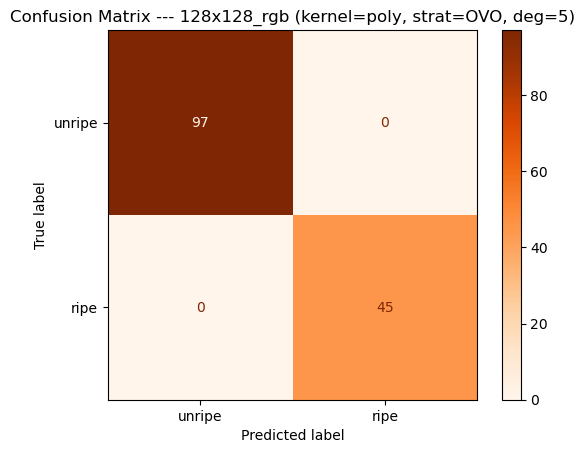


=== SVM (kernel=poly, degree=6, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9452    0.6900    0.7977       100
        ripe     0.9500    0.4176    0.5802        91

   micro avg     0.9469    0.5602    0.7039       191
   macro avg     0.9476    0.5538    0.6889       191
weighted avg     0.9475    0.5602    0.6940       191



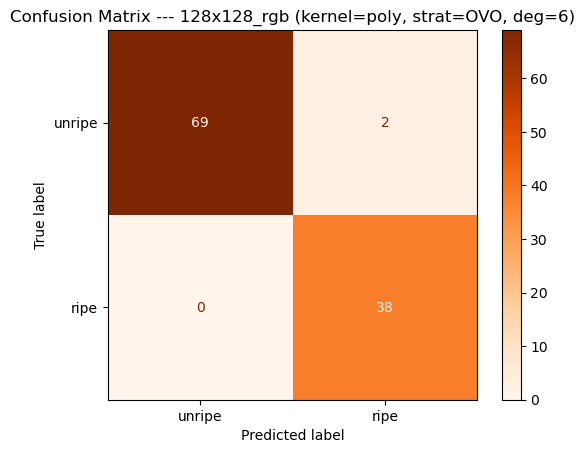


=== SVM (kernel=poly, degree=7, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9634    0.7900    0.8681       100
        ripe     0.9231    0.3956    0.5538        91

   micro avg     0.9504    0.6021    0.7372       191
   macro avg     0.9432    0.5928    0.7110       191
weighted avg     0.9442    0.6021    0.7184       191



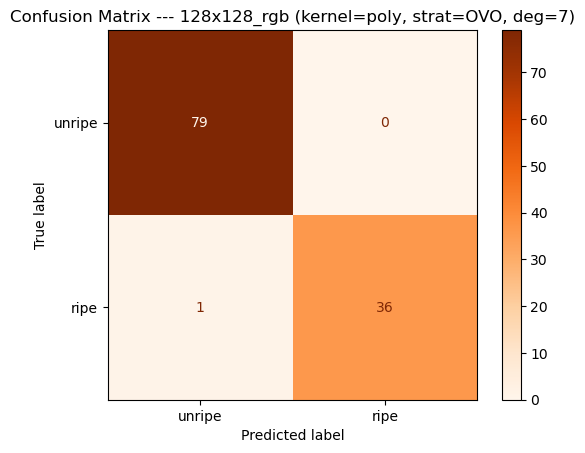


=== SVM (kernel=poly, degree=8, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9516    0.5900    0.7284       100
        ripe     0.9444    0.3736    0.5354        91

   micro avg     0.9490    0.4869    0.6436       191
   macro avg     0.9480    0.4818    0.6319       191
weighted avg     0.9482    0.4869    0.6365       191



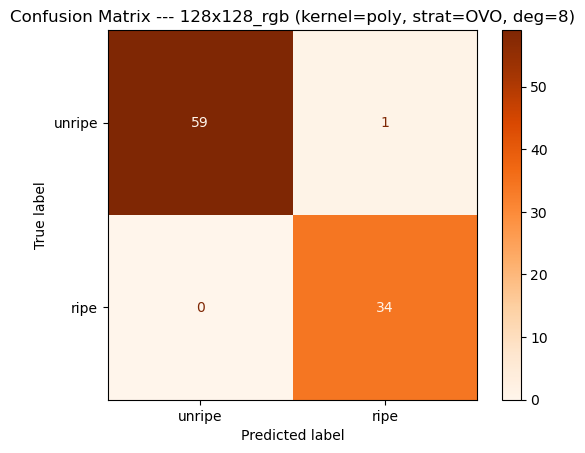


=== SVM (kernel=poly, degree=9, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9412    0.6400    0.7619       100
        ripe     0.8718    0.3736    0.5231        91

   micro avg     0.9159    0.5131    0.6577       191
   macro avg     0.9065    0.5068    0.6425       191
weighted avg     0.9081    0.5131    0.6481       191



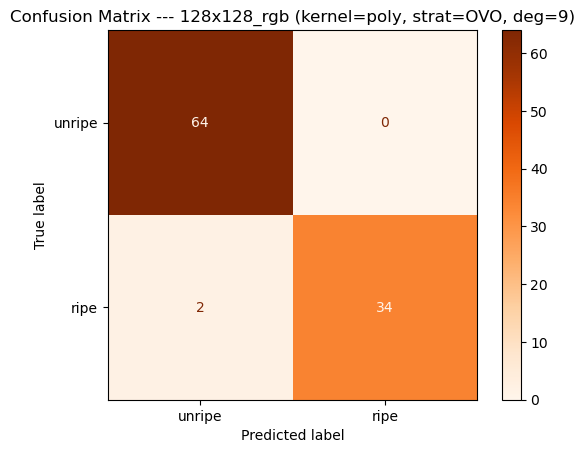


=== SVM (kernel=poly, degree=3, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9709    1.0000    0.9852       100
        ripe     0.8875    0.7802    0.8304        91

   micro avg     0.9344    0.8953    0.9144       191
   macro avg     0.9292    0.8901    0.9078       191
weighted avg     0.9312    0.8953    0.9115       191



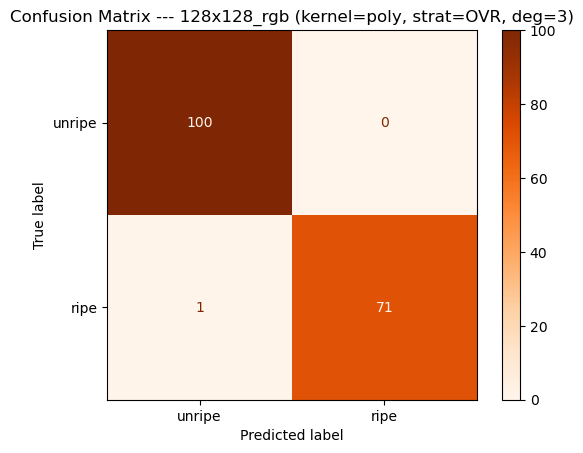


=== SVM (kernel=poly, degree=4, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.8378    0.9300    0.8815       100
        ripe     0.9259    0.5495    0.6897        91

   micro avg     0.8667    0.7487    0.8034       191
   macro avg     0.8819    0.7397    0.7856       191
weighted avg     0.8798    0.7487    0.7901       191



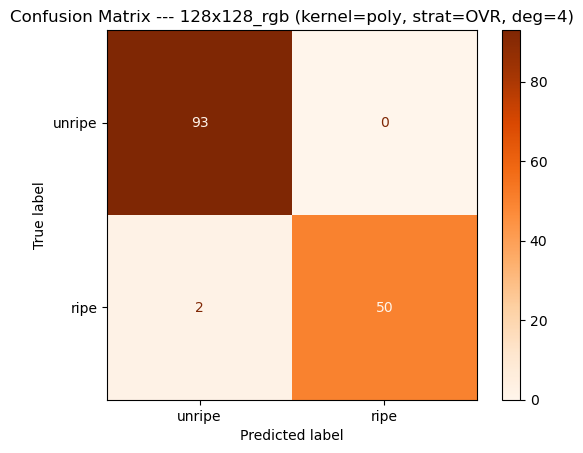


=== SVM (kernel=poly, degree=5, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9709    1.0000    0.9852       100
        ripe     0.9429    0.7253    0.8199        91

   micro avg     0.9595    0.8691    0.9121       191
   macro avg     0.9569    0.8626    0.9025       191
weighted avg     0.9575    0.8691    0.9064       191



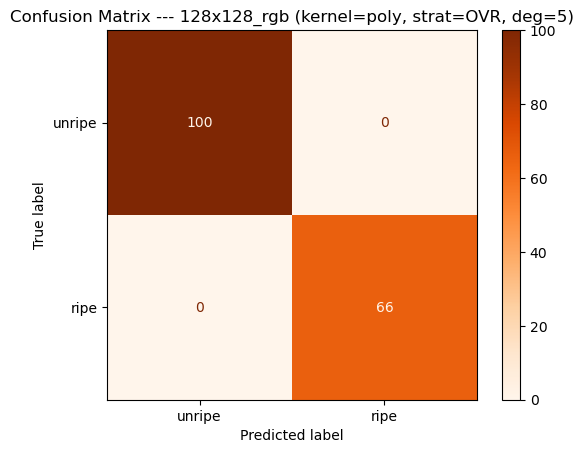


=== SVM (kernel=poly, degree=6, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.8364    0.9200    0.8762       100
        ripe     0.9091    0.5495    0.6849        91

   micro avg     0.8606    0.7435    0.7978       191
   macro avg     0.8727    0.7347    0.7806       191
weighted avg     0.8710    0.7435    0.7851       191



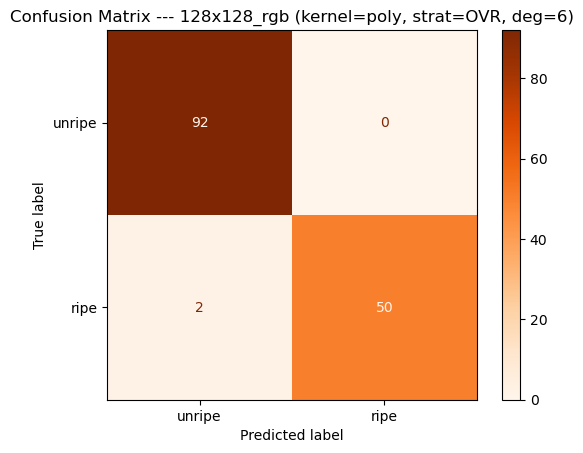


=== SVM (kernel=poly, degree=7, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9901    1.0000    0.9950       100
        ripe     0.9118    0.6813    0.7799        91

   micro avg     0.9586    0.8482    0.9000       191
   macro avg     0.9509    0.8407    0.8874       191
weighted avg     0.9528    0.8482    0.8925       191



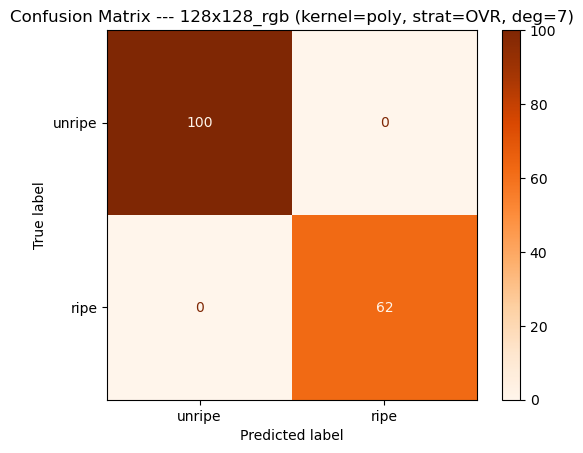


=== SVM (kernel=poly, degree=8, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.8455    0.9300    0.8857       100
        ripe     0.9412    0.5275    0.6761        91

   micro avg     0.8758    0.7382    0.8011       191
   macro avg     0.8933    0.7287    0.7809       191
weighted avg     0.8911    0.7382    0.7858       191



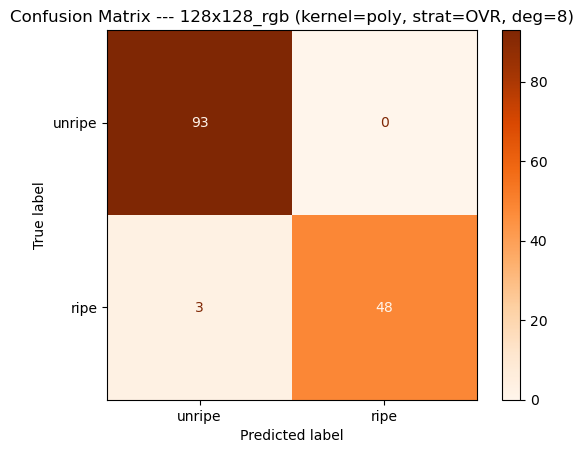


=== SVM (kernel=poly, degree=9, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9804    1.0000    0.9901       100
        ripe     0.9206    0.6374    0.7532        91

   micro avg     0.9576    0.8272    0.8876       191
   macro avg     0.9505    0.8187    0.8717       191
weighted avg     0.9519    0.8272    0.8773       191



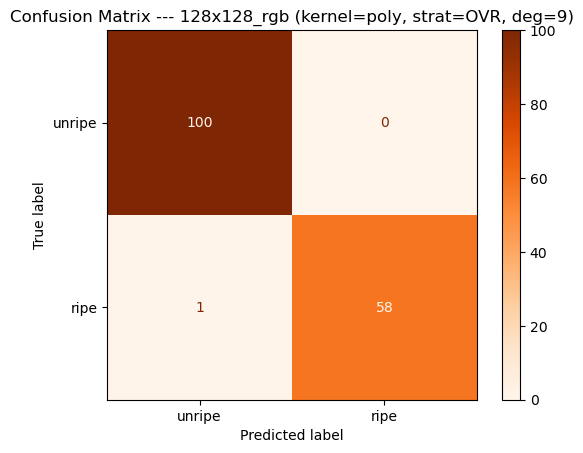


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_rgb\poly\poly_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_rgb\poly\poly_results_pairwise.csv


=== SVM (kernel=linear, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9900    0.9900    0.9900       100
        ripe     0.9277    0.8462    0.8851        91

   micro avg     0.9617    0.9215    0.9412       191
   macro avg     0.9589    0.9181    0.9375       191
weighted avg     0.9603    0.9215    0.9400       191



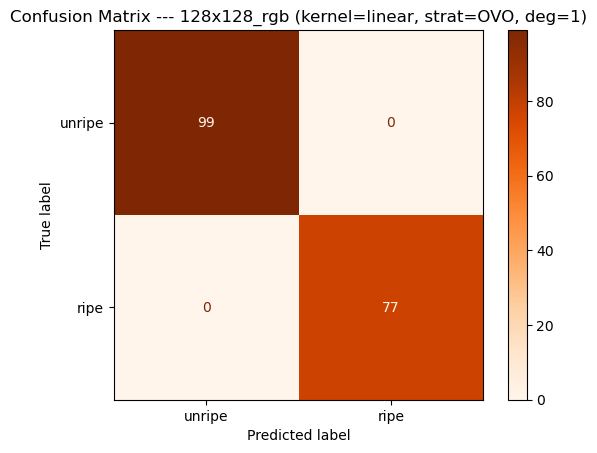


=== SVM (kernel=linear, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9615    1.0000    0.9804       100
        ripe     0.8022    0.8022    0.8022        91

   micro avg     0.8872    0.9058    0.8964       191
   macro avg     0.8819    0.9011    0.8913       191
weighted avg     0.8856    0.9058    0.8955       191



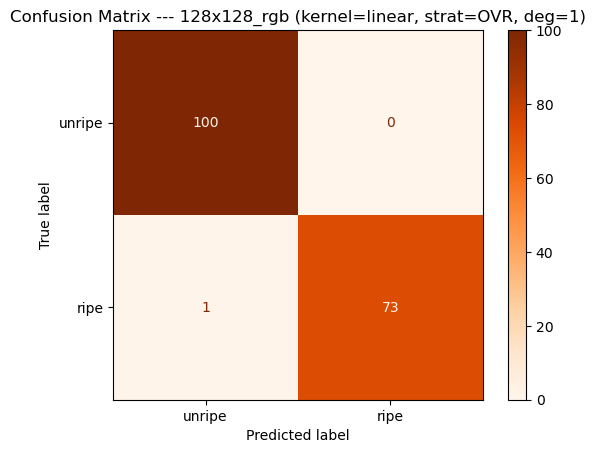


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_rgb\linear\linear_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_rgb\linear\linear_results_pairwise.csv


=== SVM (kernel=rbf, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9802    0.9900    0.9851       100
        ripe     0.9535    0.9011    0.9266        91

   micro avg     0.9679    0.9476    0.9577       191
   macro avg     0.9668    0.9455    0.9558       191
weighted avg     0.9675    0.9476    0.9572       191



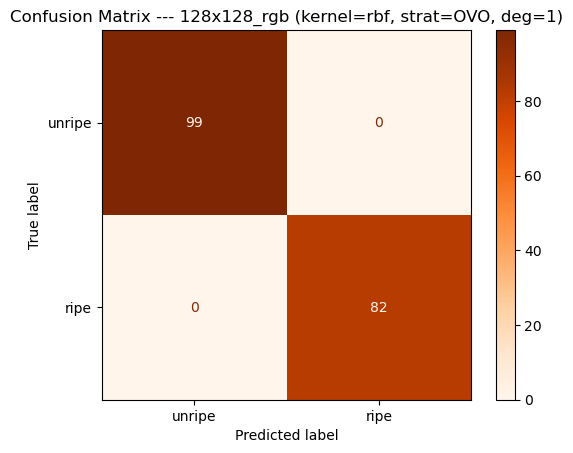


=== SVM (kernel=rbf, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9802    0.9900    0.9851       100
        ripe     0.9176    0.8571    0.8864        91

   micro avg     0.9516    0.9267    0.9390       191
   macro avg     0.9489    0.9236    0.9357       191
weighted avg     0.9504    0.9267    0.9380       191



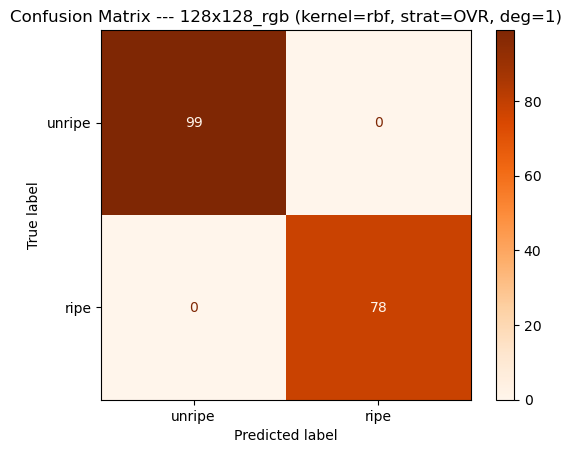


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_rgb\rbf\rbf_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_rgb\rbf\rbf_results_pairwise.csv


=== SVM (kernel=sigmoid, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9778    0.8800    0.9263       100
        ripe     0.6824    0.6374    0.6591        91

   micro avg     0.8343    0.7644    0.7978       191
   macro avg     0.8301    0.7587    0.7927       191
weighted avg     0.8370    0.7644    0.7990       191



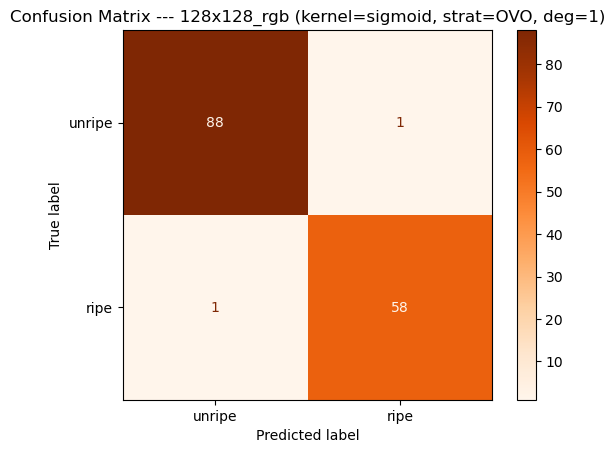


=== SVM (kernel=sigmoid, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.8641    0.8900    0.8768       100
        ripe     0.5446    0.6044    0.5729        91

   micro avg     0.7059    0.7539    0.7291       191
   macro avg     0.7043    0.7472    0.7249       191
weighted avg     0.7118    0.7539    0.7320       191



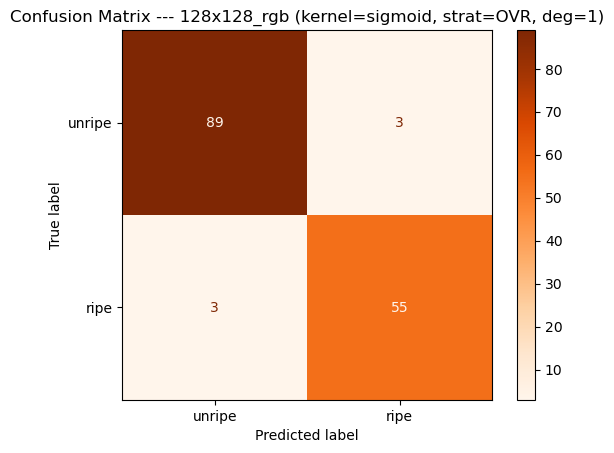


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_rgb\sigmoid\sigmoid_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_rgb\sigmoid\sigmoid_results_pairwise.csv


 Now running: 128x128_his

=== SVM (kernel=poly, degree=3, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     1.0000    0.9400    0.9691       100
        ripe     0.9024    0.8132    0.8555        91

   micro avg     0.9545    0.8796    0.9155       191
   macro avg     0.9512    0.8766    0.9123       191
weighted avg     0.9535    0.8796    0.9150       191



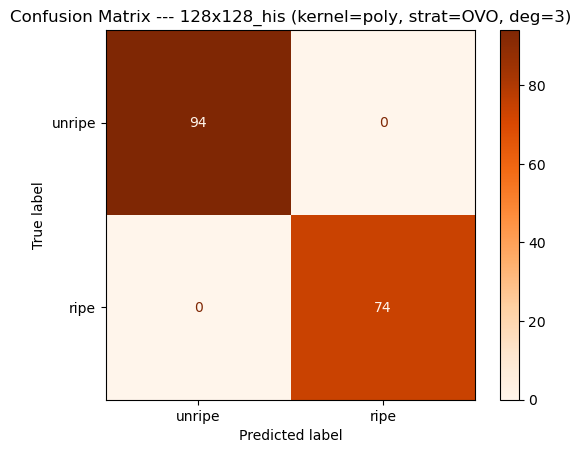


=== SVM (kernel=poly, degree=4, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9789    0.9300    0.9538       100
        ripe     0.8600    0.4725    0.6099        91

   micro avg     0.9379    0.7120    0.8095       191
   macro avg     0.9195    0.7013    0.7819       191
weighted avg     0.9223    0.7120    0.7900       191



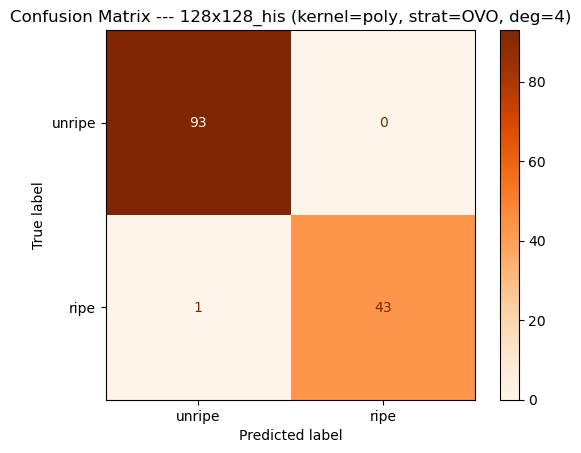


=== SVM (kernel=poly, degree=5, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     1.0000    0.9000    0.9474       100
        ripe     0.9302    0.4396    0.5970        91

   micro avg     0.9774    0.6806    0.8025       191
   macro avg     0.9651    0.6698    0.7722       191
weighted avg     0.9668    0.6806    0.7804       191



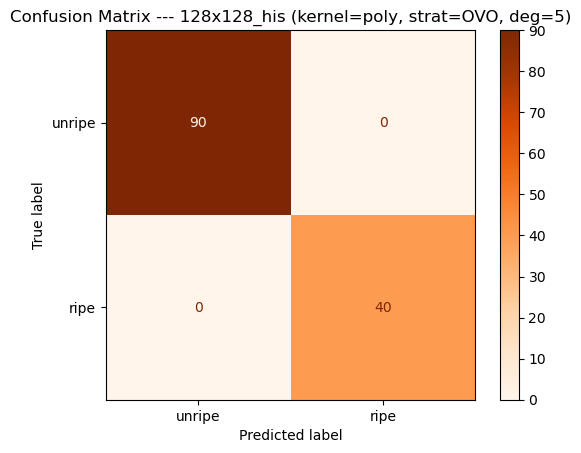


=== SVM (kernel=poly, degree=6, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9775    0.8700    0.9206       100
        ripe     0.9375    0.3297    0.4878        91

   micro avg     0.9669    0.6126    0.7500       191
   macro avg     0.9575    0.5998    0.7042       191
weighted avg     0.9585    0.6126    0.7144       191



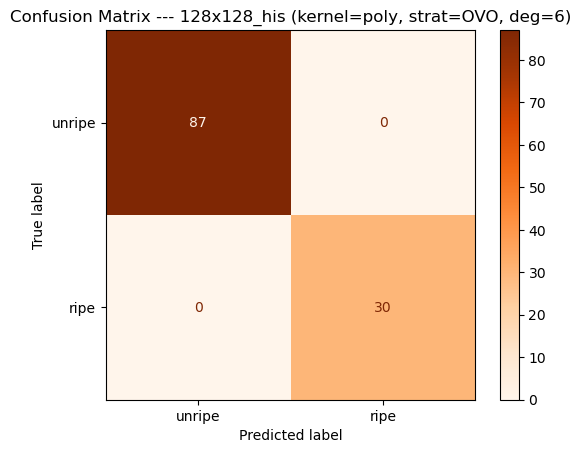


=== SVM (kernel=poly, degree=7, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9873    0.7800    0.8715       100
        ripe     1.0000    0.3077    0.4706        91

   micro avg     0.9907    0.5550    0.7114       191
   macro avg     0.9937    0.5438    0.6710       191
weighted avg     0.9934    0.5550    0.6805       191



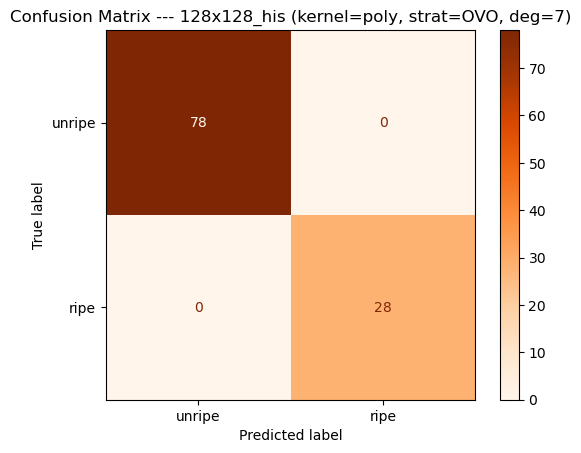


=== SVM (kernel=poly, degree=8, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9706    0.6600    0.7857       100
        ripe     0.9643    0.2967    0.4538        91

   micro avg     0.9688    0.4869    0.6481       191
   macro avg     0.9674    0.4784    0.6197       191
weighted avg     0.9676    0.4869    0.6276       191



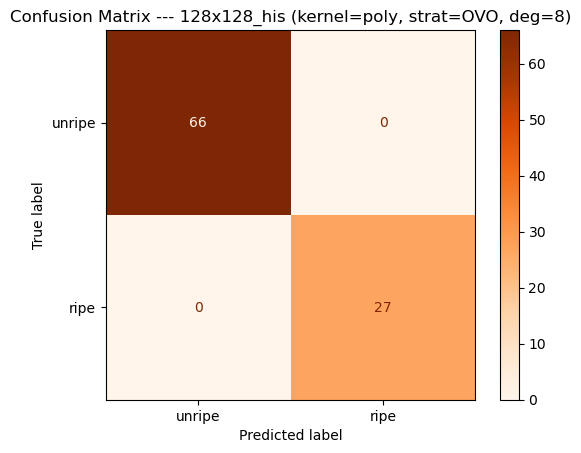


=== SVM (kernel=poly, degree=9, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9683    0.6100    0.7485       100
        ripe     1.0000    0.2747    0.4310        91

   micro avg     0.9773    0.4503    0.6165       191
   macro avg     0.9841    0.4424    0.5898       191
weighted avg     0.9834    0.4503    0.5972       191



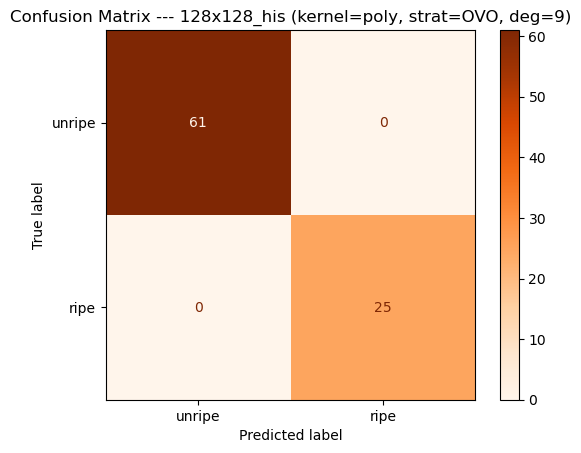


=== SVM (kernel=poly, degree=3, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9898    0.9700    0.9798       100
        ripe     0.8333    0.8791    0.8556        91

   micro avg     0.9124    0.9267    0.9195       191
   macro avg     0.9116    0.9246    0.9177       191
weighted avg     0.9153    0.9267    0.9206       191



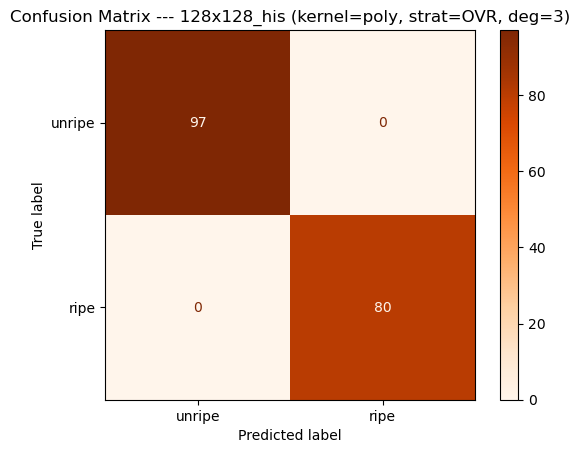


=== SVM (kernel=poly, degree=4, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9604    0.9700    0.9652       100
        ripe     0.8837    0.8352    0.8588        91

   micro avg     0.9251    0.9058    0.9153       191
   macro avg     0.9221    0.9026    0.9120       191
weighted avg     0.9239    0.9058    0.9145       191



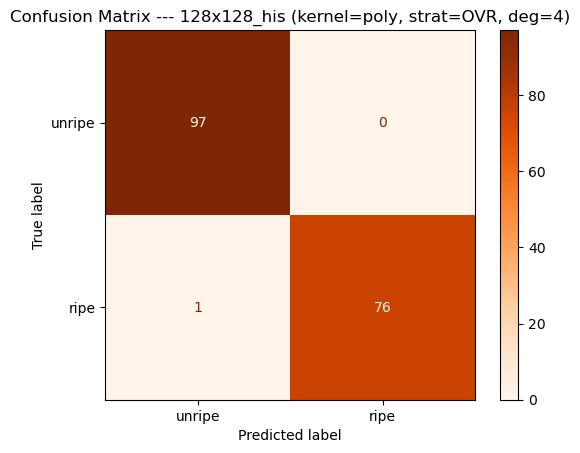


=== SVM (kernel=poly, degree=5, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9703    0.9800    0.9751       100
        ripe     0.8556    0.8462    0.8508        91

   micro avg     0.9162    0.9162    0.9162       191
   macro avg     0.9129    0.9131    0.9130       191
weighted avg     0.9156    0.9162    0.9159       191



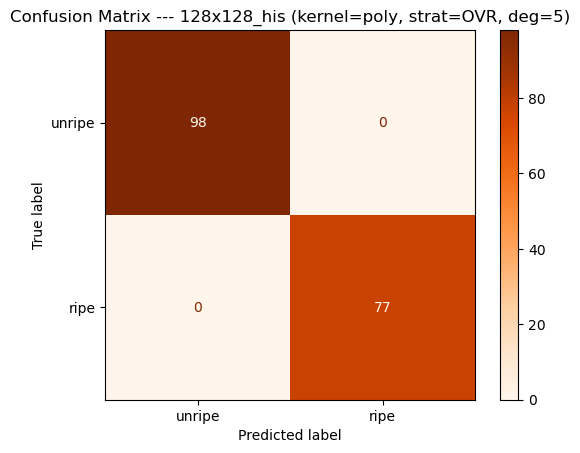


=== SVM (kernel=poly, degree=6, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9697    0.9600    0.9648       100
        ripe     0.8701    0.7363    0.7976        91

   micro avg     0.9261    0.8534    0.8883       191
   macro avg     0.9199    0.8481    0.8812       191
weighted avg     0.9223    0.8534    0.8852       191



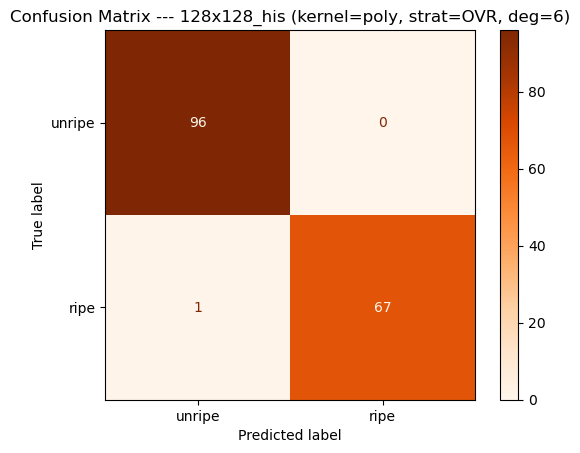


=== SVM (kernel=poly, degree=7, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9700    0.9700    0.9700       100
        ripe     0.8519    0.7582    0.8023        91

   micro avg     0.9171    0.8691    0.8925       191
   macro avg     0.9109    0.8641    0.8862       191
weighted avg     0.9137    0.8691    0.8901       191



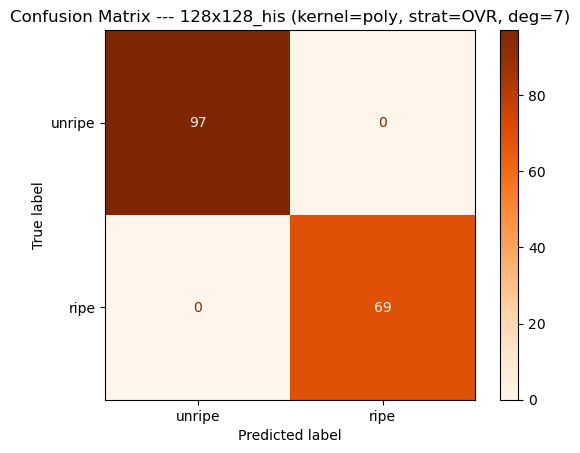


=== SVM (kernel=poly, degree=8, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9505    0.9600    0.9552       100
        ripe     0.8493    0.6813    0.7561        91

   micro avg     0.9080    0.8272    0.8658       191
   macro avg     0.8999    0.8207    0.8557       191
weighted avg     0.9023    0.8272    0.8604       191



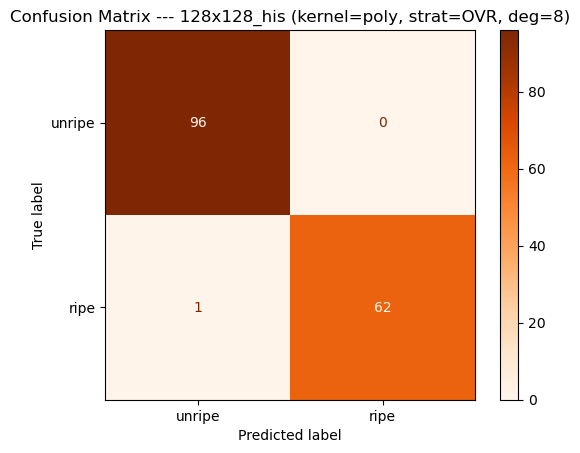


=== SVM (kernel=poly, degree=9, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9697    0.9600    0.9648       100
        ripe     0.8571    0.7253    0.7857        91

   micro avg     0.9205    0.8482    0.8828       191
   macro avg     0.9134    0.8426    0.8753       191
weighted avg     0.9161    0.8482    0.8795       191



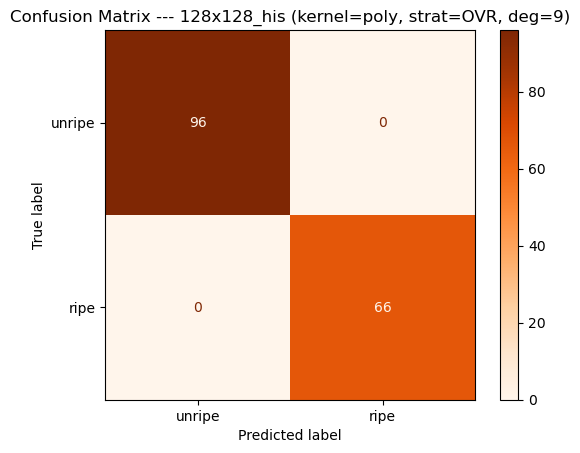


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_his\poly\poly_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_his\poly\poly_results_pairwise.csv


=== SVM (kernel=linear, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9703    0.9800    0.9751       100
        ripe     0.9186    0.8681    0.8927        91

   micro avg     0.9465    0.9267    0.9365       191
   macro avg     0.9445    0.9241    0.9339       191
weighted avg     0.9457    0.9267    0.9358       191



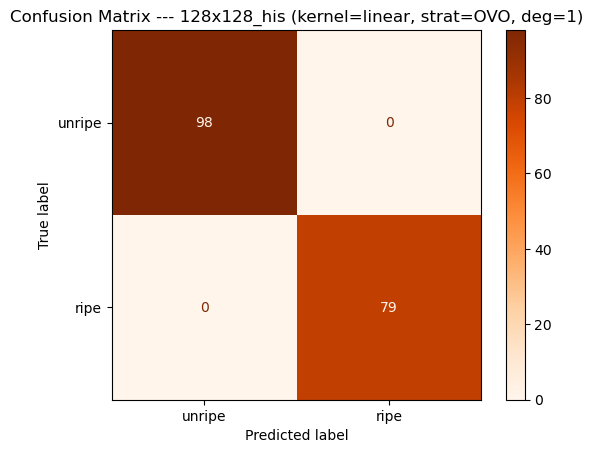


=== SVM (kernel=linear, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9340    0.9900    0.9612       100
        ripe     0.7830    0.9121    0.8426        91

   micro avg     0.8585    0.9529    0.9032       191
   macro avg     0.8585    0.9510    0.9019       191
weighted avg     0.8620    0.9529    0.9047       191



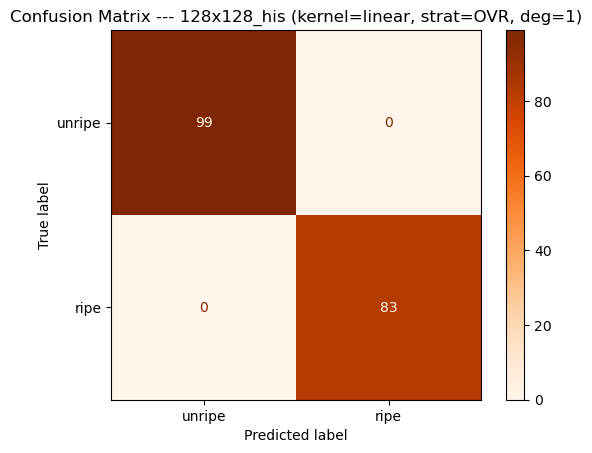


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_his\linear\linear_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_his\linear\linear_results_pairwise.csv


=== SVM (kernel=rbf, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9900    0.9900    0.9900       100
        ripe     0.8511    0.8791    0.8649        91

   micro avg     0.9227    0.9372    0.9299       191
   macro avg     0.9205    0.9346    0.9274       191
weighted avg     0.9238    0.9372    0.9304       191



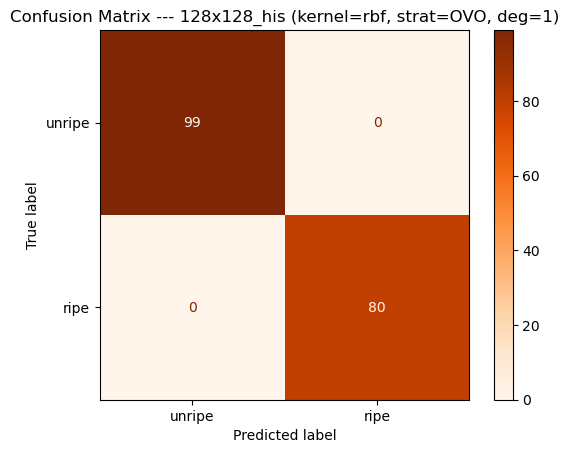


=== SVM (kernel=rbf, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9802    0.9900    0.9851       100
        ripe     0.8511    0.8791    0.8649        91

   micro avg     0.9179    0.9372    0.9275       191
   macro avg     0.9156    0.9346    0.9250       191
weighted avg     0.9187    0.9372    0.9278       191



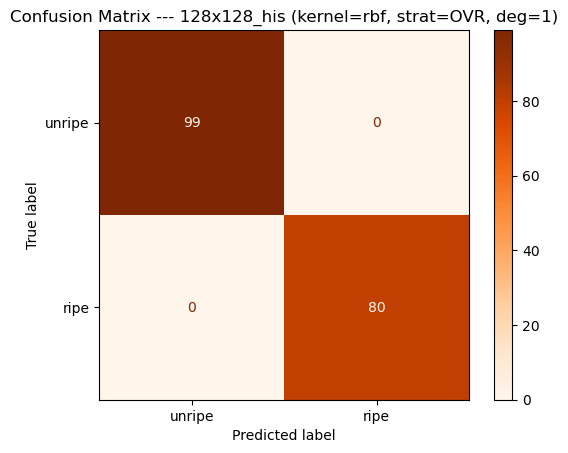


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_his\rbf\rbf_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_his\rbf\rbf_results_pairwise.csv


=== SVM (kernel=sigmoid, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.8942    0.9300    0.9118       100
        ripe     0.7835    0.8352    0.8085        91

   micro avg     0.8408    0.8848    0.8622       191
   macro avg     0.8389    0.8826    0.8601       191
weighted avg     0.8415    0.8848    0.8626       191



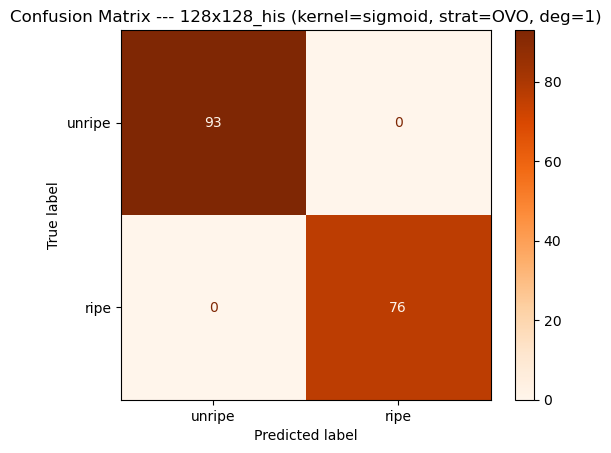


=== SVM (kernel=sigmoid, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.7222    0.9100    0.8053       100
        ripe     0.7143    0.7143    0.7143        91

   micro avg     0.7189    0.8168    0.7647       191
   macro avg     0.7183    0.8121    0.7598       191
weighted avg     0.7184    0.8168    0.7619       191



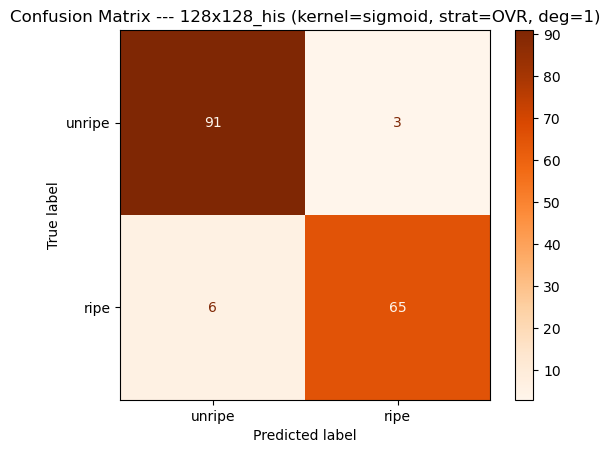


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_his\sigmoid\sigmoid_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_his\sigmoid\sigmoid_results_pairwise.csv


 Now running: 128x128_lab

=== SVM (kernel=poly, degree=3, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9898    0.9700    0.9798       100
        ripe     0.9032    0.9231    0.9130        91

   micro avg     0.9476    0.9476    0.9476       191
   macro avg     0.9465    0.9465    0.9464       191
weighted avg     0.9486    0.9476    0.9480       191



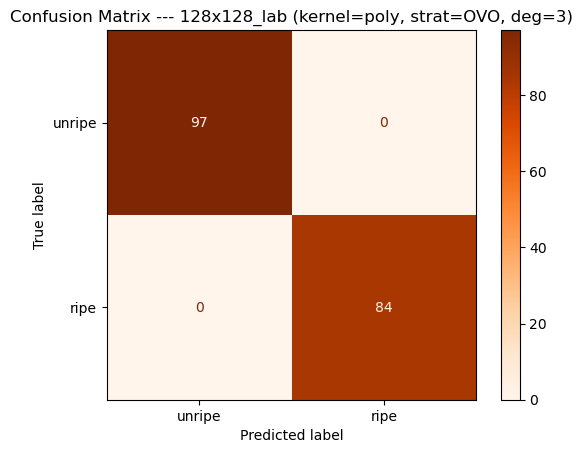


=== SVM (kernel=poly, degree=4, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9789    0.9300    0.9538       100
        ripe     0.8557    0.9121    0.8830        91

   micro avg     0.9167    0.9215    0.9191       191
   macro avg     0.9173    0.9210    0.9184       191
weighted avg     0.9202    0.9215    0.9201       191



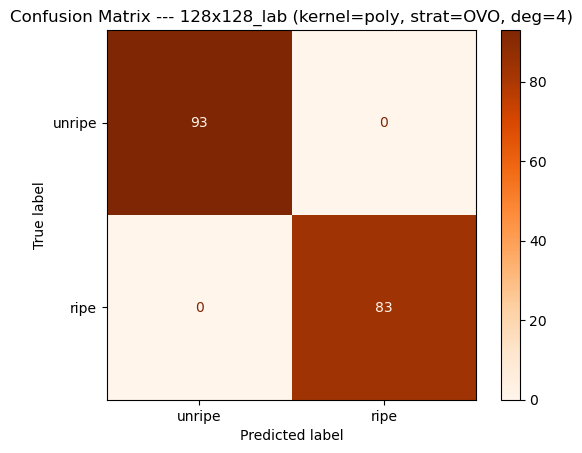


=== SVM (kernel=poly, degree=5, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     1.0000    0.9500    0.9744       100
        ripe     0.7547    0.8791    0.8122        91

   micro avg     0.8706    0.9162    0.8929       191
   macro avg     0.8774    0.9146    0.8933       191
weighted avg     0.8831    0.9162    0.8971       191



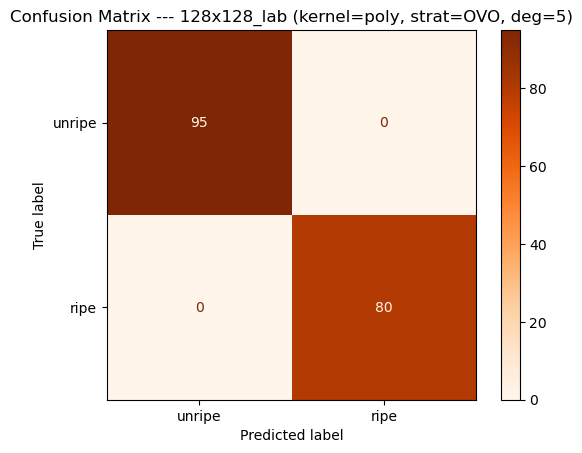


=== SVM (kernel=poly, degree=6, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9770    0.8500    0.9091       100
        ripe     0.5806    0.9890    0.7317        91

   micro avg     0.7231    0.9162    0.8083       191
   macro avg     0.7788    0.9195    0.8204       191
weighted avg     0.7882    0.9162    0.8246       191



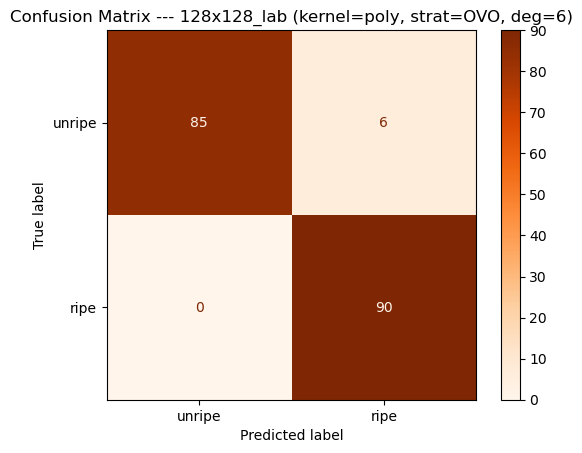


=== SVM (kernel=poly, degree=7, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     1.0000    0.8600    0.9247       100
        ripe     0.5494    0.9780    0.7036        91

   micro avg     0.7056    0.9162    0.7973       191
   macro avg     0.7747    0.9190    0.8141       191
weighted avg     0.7853    0.9162    0.8194       191



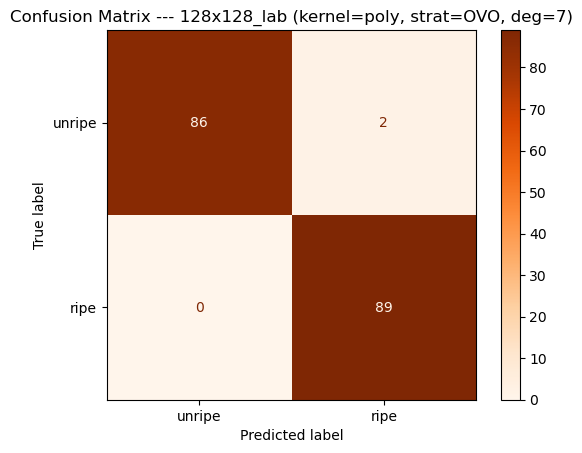


=== SVM (kernel=poly, degree=8, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9722    0.7000    0.8140       100
        ripe     0.4734    0.9780    0.6380        91

   micro avg     0.6115    0.8325    0.7051       191
   macro avg     0.7228    0.8390    0.7260       191
weighted avg     0.7346    0.8325    0.7301       191



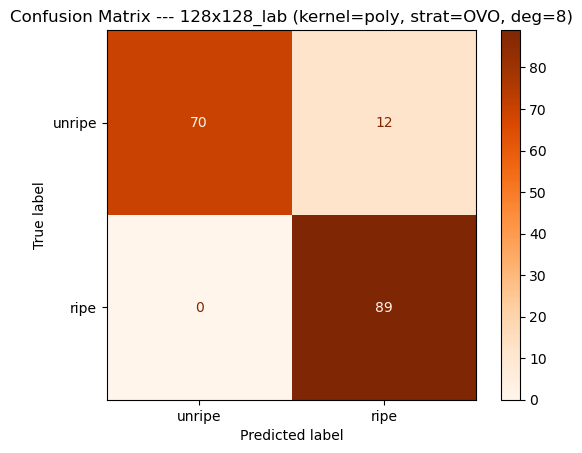


=== SVM (kernel=poly, degree=9, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     1.0000    0.7700    0.8701       100
        ripe     0.5086    0.9780    0.6692        91

   micro avg     0.6587    0.8691    0.7494       191
   macro avg     0.7543    0.8740    0.7696       191
weighted avg     0.7659    0.8691    0.7743       191



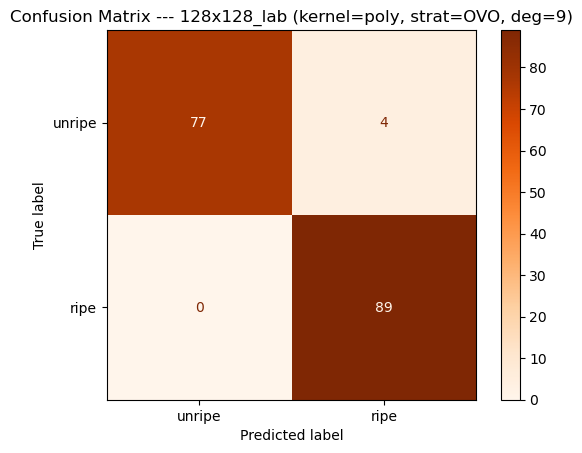


=== SVM (kernel=poly, degree=3, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9706    0.9900    0.9802       100
        ripe     0.8269    0.9451    0.8821        91

   micro avg     0.8981    0.9686    0.9320       191
   macro avg     0.8988    0.9675    0.9311       191
weighted avg     0.9021    0.9686    0.9334       191



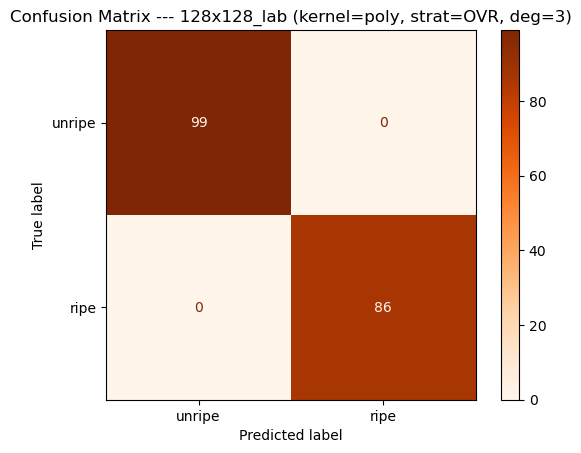


=== SVM (kernel=poly, degree=4, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9417    0.9700    0.9557       100
        ripe     0.9231    0.9231    0.9231        91

   micro avg     0.9330    0.9476    0.9403       191
   macro avg     0.9324    0.9465    0.9394       191
weighted avg     0.9329    0.9476    0.9401       191



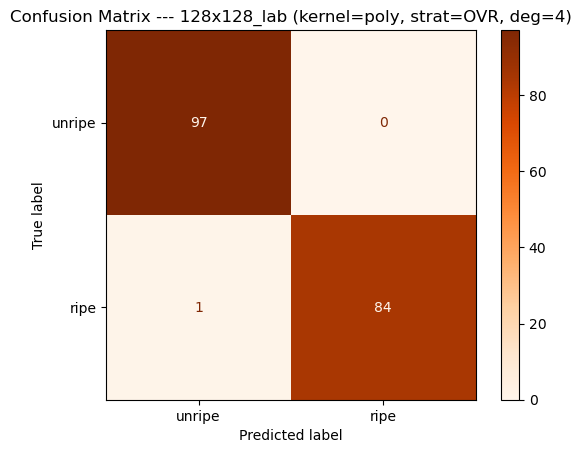


=== SVM (kernel=poly, degree=5, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9800    0.9800    0.9800       100
        ripe     0.8485    0.9231    0.8842        91

   micro avg     0.9146    0.9529    0.9333       191
   macro avg     0.9142    0.9515    0.9321       191
weighted avg     0.9173    0.9529    0.9344       191



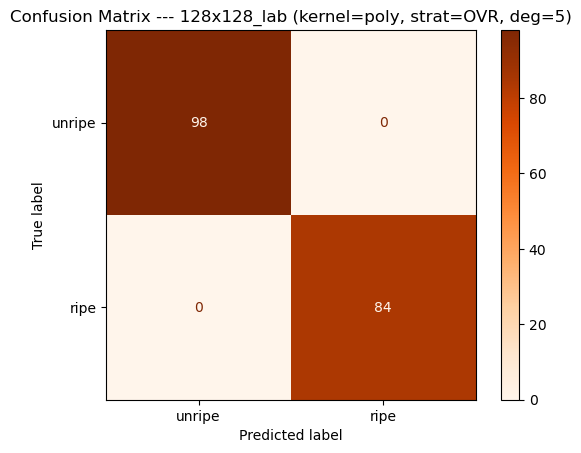


=== SVM (kernel=poly, degree=6, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9320    0.9600    0.9458       100
        ripe     0.8889    0.8791    0.8840        91

   micro avg     0.9119    0.9215    0.9167       191
   macro avg     0.9105    0.9196    0.9149       191
weighted avg     0.9115    0.9215    0.9164       191



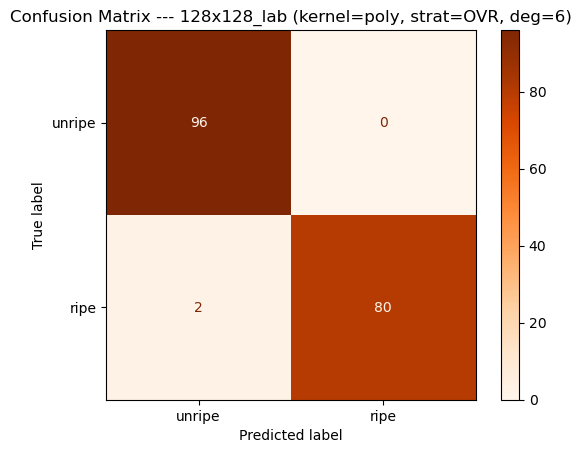


=== SVM (kernel=poly, degree=7, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9800    0.9800    0.9800       100
        ripe     0.8706    0.8132    0.8409        91

   micro avg     0.9297    0.9005    0.9149       191
   macro avg     0.9253    0.8966    0.9105       191
weighted avg     0.9279    0.9005    0.9137       191



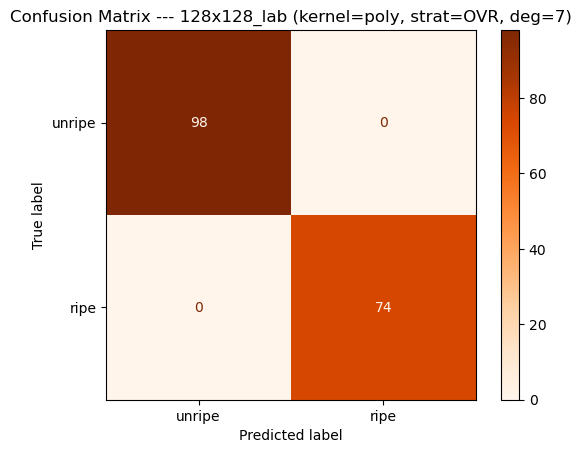


=== SVM (kernel=poly, degree=8, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9143    0.9600    0.9366       100
        ripe     0.8916    0.8132    0.8506        91

   micro avg     0.9043    0.8901    0.8971       191
   macro avg     0.9029    0.8866    0.8936       191
weighted avg     0.9035    0.8901    0.8956       191



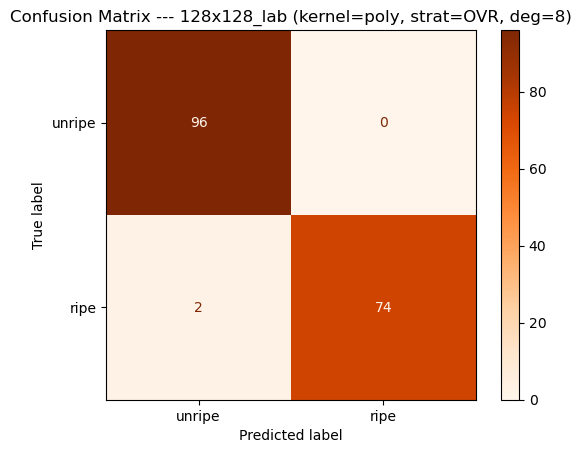


=== SVM (kernel=poly, degree=9, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9800    0.9800    0.9800       100
        ripe     0.8846    0.7582    0.8166        91

   micro avg     0.9382    0.8743    0.9051       191
   macro avg     0.9323    0.8691    0.8983       191
weighted avg     0.9346    0.8743    0.9021       191



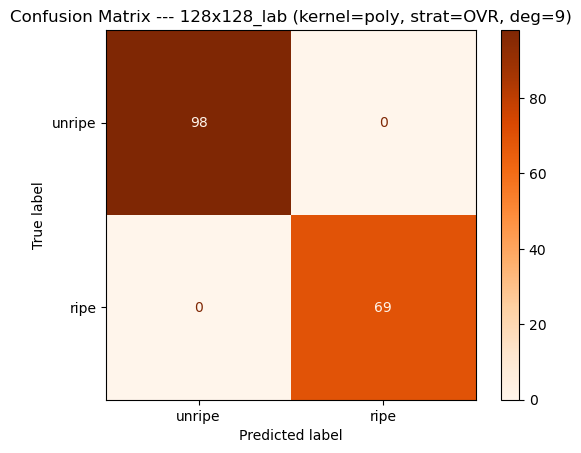


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_lab\poly\poly_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_lab\poly\poly_results_pairwise.csv


=== SVM (kernel=linear, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9800    0.9800    0.9800       100
        ripe     0.9663    0.9451    0.9556        91

   micro avg     0.9735    0.9634    0.9684       191
   macro avg     0.9731    0.9625    0.9678       191
weighted avg     0.9735    0.9634    0.9684       191



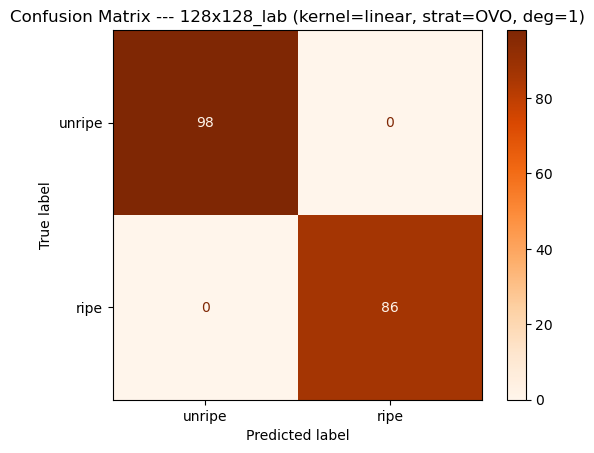


=== SVM (kernel=linear, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9174    1.0000    0.9569       100
        ripe     0.8627    0.9670    0.9119        91

   micro avg     0.8910    0.9843    0.9353       191
   macro avg     0.8901    0.9835    0.9344       191
weighted avg     0.8914    0.9843    0.9355       191



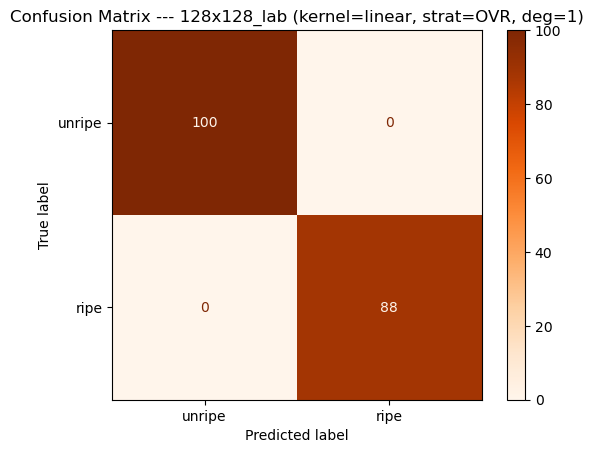


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_lab\linear\linear_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_lab\linear\linear_results_pairwise.csv


=== SVM (kernel=rbf, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.9800    0.9800    0.9800       100
        ripe     0.9670    0.9670    0.9670        91

   micro avg     0.9738    0.9738    0.9738       191
   macro avg     0.9735    0.9735    0.9735       191
weighted avg     0.9738    0.9738    0.9738       191



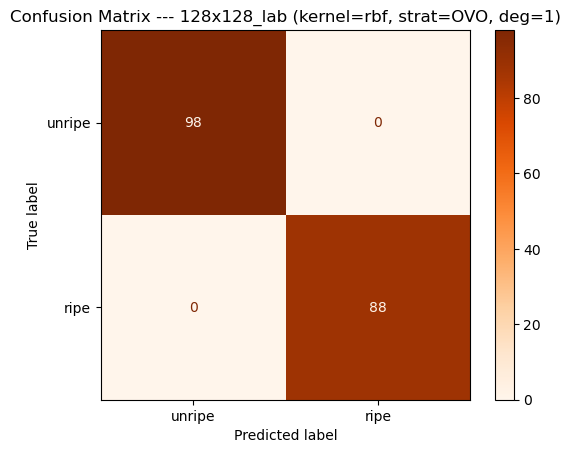


=== SVM (kernel=rbf, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9800    0.9800    0.9800       100
        ripe     0.9551    0.9341    0.9444        91

   micro avg     0.9683    0.9581    0.9632       191
   macro avg     0.9675    0.9570    0.9622       191
weighted avg     0.9681    0.9581    0.9631       191



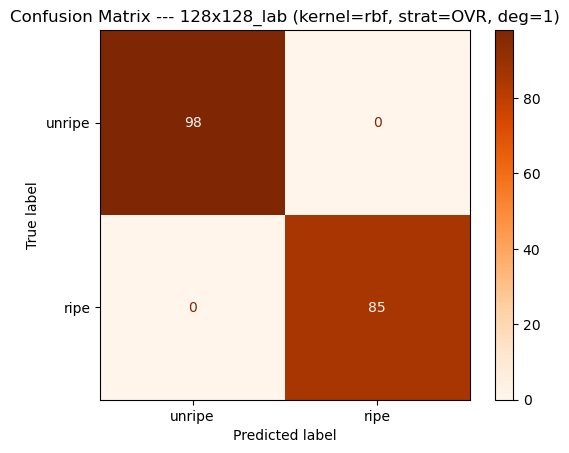


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_lab\rbf\rbf_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_lab\rbf\rbf_results_pairwise.csv


=== SVM (kernel=sigmoid, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.8302    0.8800    0.8544       100
        ripe     0.8533    0.7033    0.7711        91

   micro avg     0.8398    0.7958    0.8172       191
   macro avg     0.8418    0.7916    0.8127       191
weighted avg     0.8412    0.7958    0.8147       191



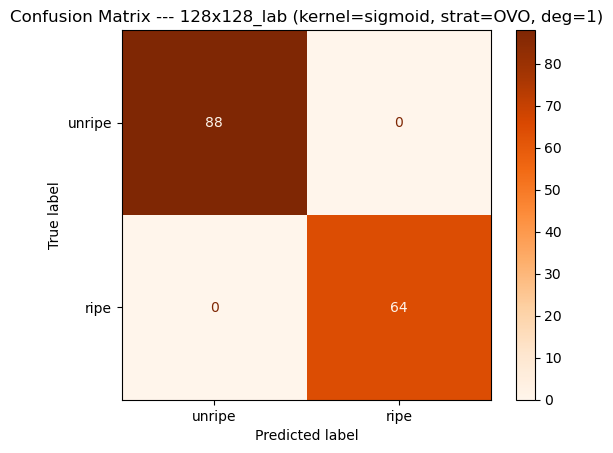


=== SVM (kernel=sigmoid, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.9074    0.9800    0.9423       100
        ripe     0.6867    0.6264    0.6552        91

   micro avg     0.8115    0.8115    0.8115       191
   macro avg     0.7971    0.8032    0.7987       191
weighted avg     0.8023    0.8115    0.8055       191



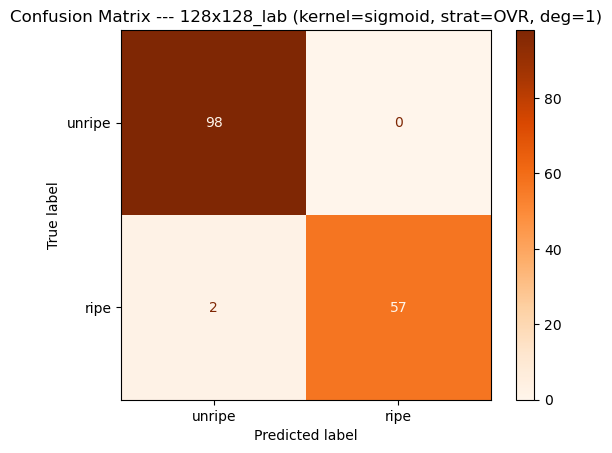


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_lab\sigmoid\sigmoid_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_lab\sigmoid\sigmoid_results_pairwise.csv


 Now running: 128x128_glcm

=== SVM (kernel=poly, degree=3, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.8696    0.8000    0.8333       100
        ripe     0.7708    0.8132    0.7914        91

   micro avg     0.8191    0.8063    0.8127       191
   macro avg     0.8202    0.8066    0.8124       191
weighted avg     0.8225    0.8063    0.8134       191



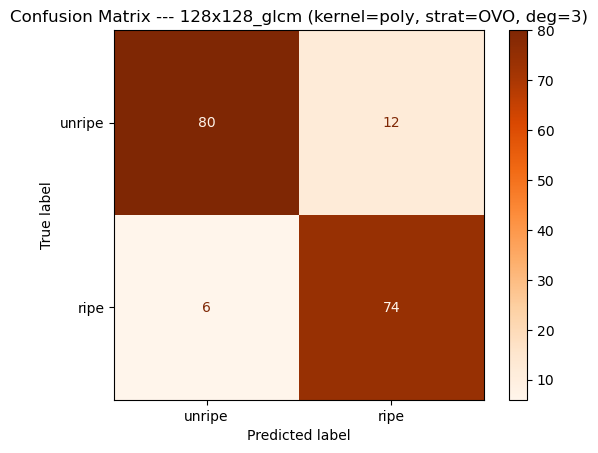


=== SVM (kernel=poly, degree=4, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.7671    0.5600    0.6474       100
        ripe     0.5417    0.8571    0.6638        91

   micro avg     0.6175    0.7016    0.6569       191
   macro avg     0.6544    0.7086    0.6556       191
weighted avg     0.6597    0.7016    0.6552       191



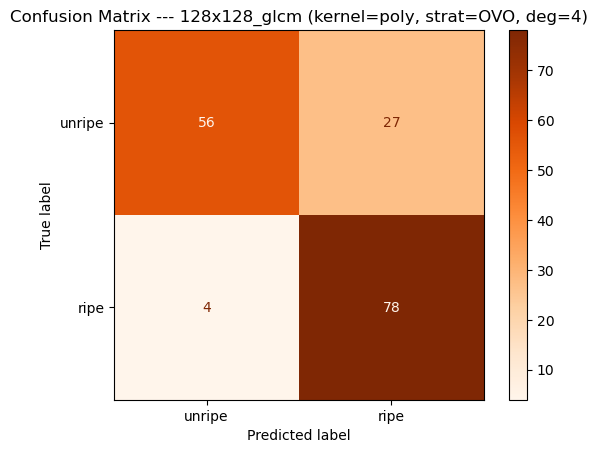


=== SVM (kernel=poly, degree=5, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.7917    0.3800    0.5135       100
        ripe     0.4444    0.9231    0.6000        91

   micro avg     0.5148    0.6387    0.5701       191
   macro avg     0.6181    0.6515    0.5568       191
weighted avg     0.6262    0.6387    0.5547       191



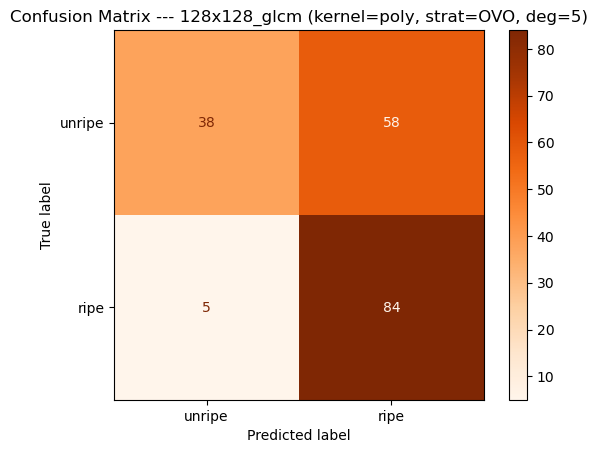


=== SVM (kernel=poly, degree=6, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.6857    0.2400    0.3556       100
        ripe     0.3455    0.9341    0.5045        91

   micro avg     0.3879    0.5707    0.4619       191
   macro avg     0.5156    0.5870    0.4300       191
weighted avg     0.5236    0.5707    0.4265       191



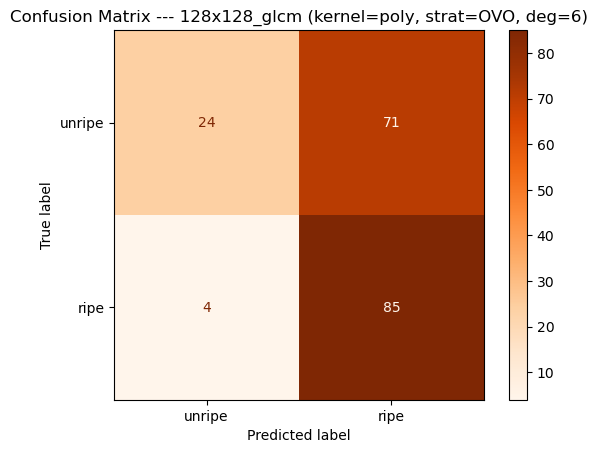


=== SVM (kernel=poly, degree=7, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.8889    0.2400    0.3780       100
        ripe     0.3696    0.9341    0.5296        91

   micro avg     0.4241    0.5707    0.4866       191
   macro avg     0.6292    0.5870    0.4538       191
weighted avg     0.6415    0.5707    0.4502       191



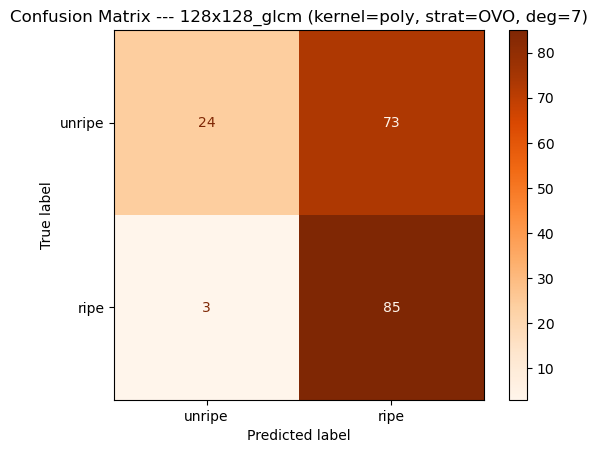


=== SVM (kernel=poly, degree=8, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.6818    0.1500    0.2459       100
        ripe     0.3055    0.9231    0.4590        91

   micro avg     0.3333    0.5183    0.4057       191
   macro avg     0.4936    0.5365    0.3525       191
weighted avg     0.5025    0.5183    0.3474       191



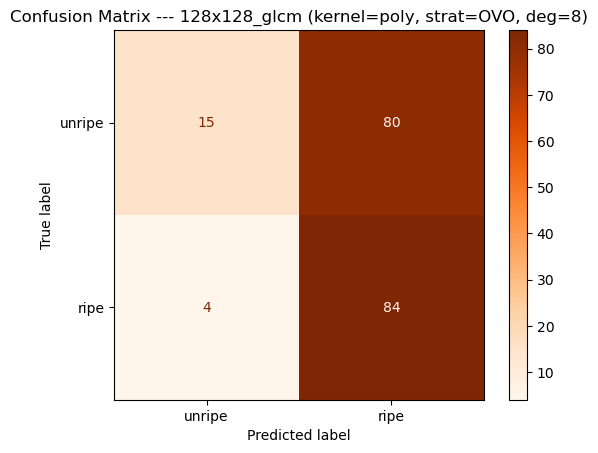


=== SVM (kernel=poly, degree=9, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.8125    0.1300    0.2241       100
        ripe     0.3386    0.9341    0.4971        91

   micro avg     0.3670    0.5131    0.4279       191
   macro avg     0.5756    0.5320    0.3606       191
weighted avg     0.5867    0.5131    0.3542       191



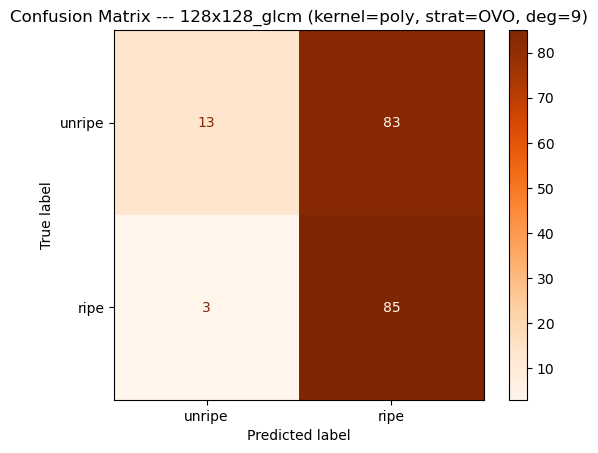


=== SVM (kernel=poly, degree=3, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.8000    0.9600    0.8727       100
        ripe     0.7882    0.7363    0.7614        91

   micro avg     0.7951    0.8534    0.8232       191
   macro avg     0.7941    0.8481    0.8170       191
weighted avg     0.7944    0.8534    0.8197       191



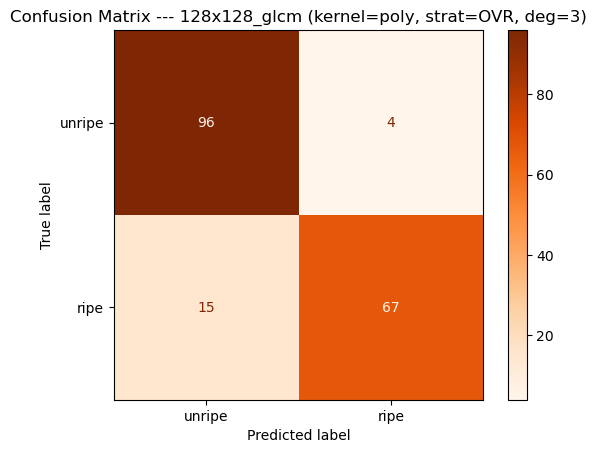


=== SVM (kernel=poly, degree=4, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.7857    0.8800    0.8302       100
        ripe     0.8333    0.4396    0.5755        91

   micro avg     0.8000    0.6702    0.7293       191
   macro avg     0.8095    0.6598    0.7029       191
weighted avg     0.8084    0.6702    0.7089       191



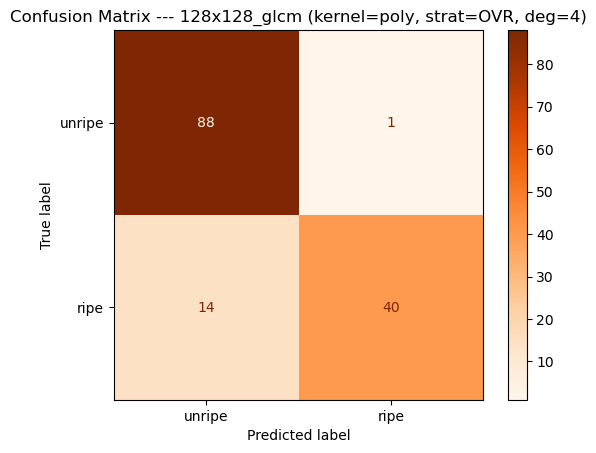


=== SVM (kernel=poly, degree=5, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.7405    0.9700    0.8398       100
        ripe     0.8000    0.6154    0.6957        91

   micro avg     0.7612    0.8010    0.7806       191
   macro avg     0.7702    0.7927    0.7677       191
weighted avg     0.7688    0.8010    0.7711       191



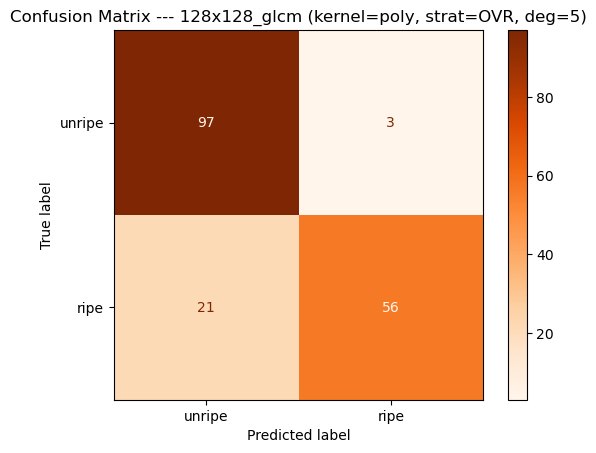


=== SVM (kernel=poly, degree=6, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.8252    0.8500    0.8374       100
        ripe     0.7222    0.4286    0.5379        91

   micro avg     0.7898    0.6492    0.7126       191
   macro avg     0.7737    0.6393    0.6877       191
weighted avg     0.7762    0.6492    0.6947       191



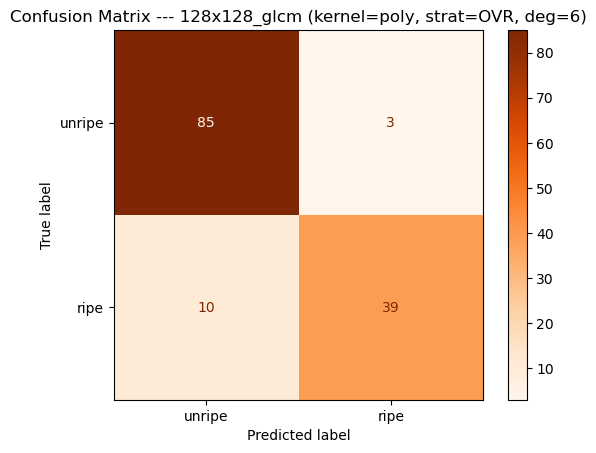


=== SVM (kernel=poly, degree=7, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.6929    0.9700    0.8083       100
        ripe     0.7500    0.5275    0.6194        91

   micro avg     0.7108    0.7592    0.7342       191
   macro avg     0.7214    0.7487    0.7138       191
weighted avg     0.7201    0.7592    0.7183       191



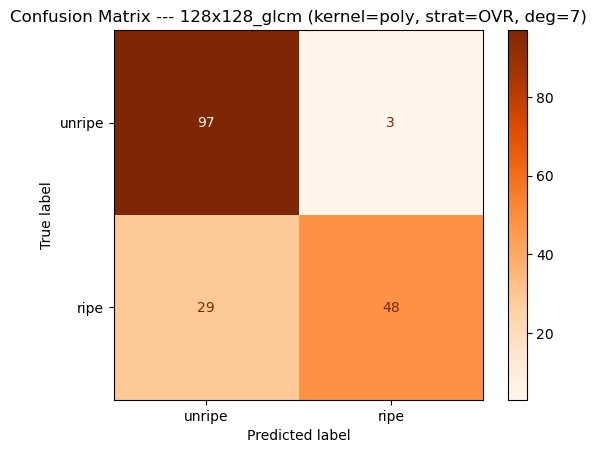


=== SVM (kernel=poly, degree=8, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.8469    0.8300    0.8384       100
        ripe     0.6909    0.4176    0.5205        91

   micro avg     0.7908    0.6335    0.7035       191
   macro avg     0.7689    0.6238    0.6795       191
weighted avg     0.7726    0.6335    0.6870       191



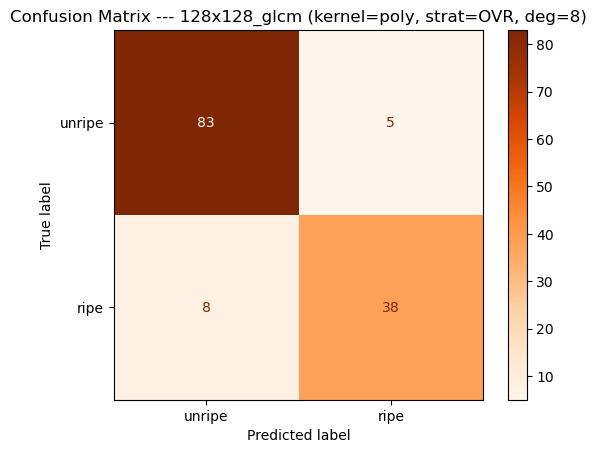


=== SVM (kernel=poly, degree=9, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.8835    0.9100    0.8966       100
        ripe     0.7302    0.5055    0.5974        91

   micro avg     0.8253    0.7173    0.7675       191
   macro avg     0.8068    0.7077    0.7470       191
weighted avg     0.8104    0.7173    0.7540       191



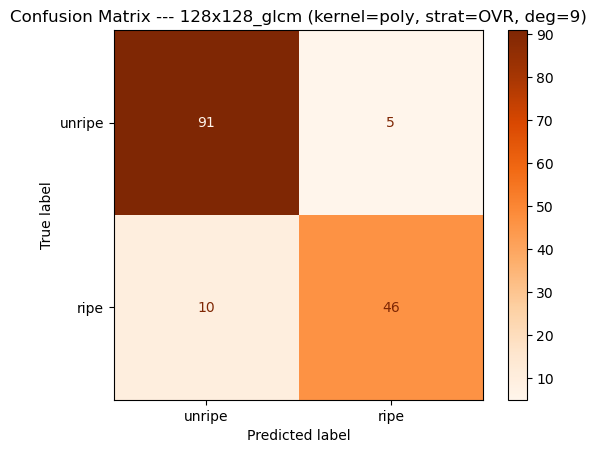


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_glcm\poly\poly_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_glcm\poly\poly_results_pairwise.csv


=== SVM (kernel=linear, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.8667    0.9100    0.8878       100
        ripe     0.7816    0.7473    0.7640        91

   micro avg     0.8281    0.8325    0.8303       191
   macro avg     0.8241    0.8286    0.8259       191
weighted avg     0.8261    0.8325    0.8288       191



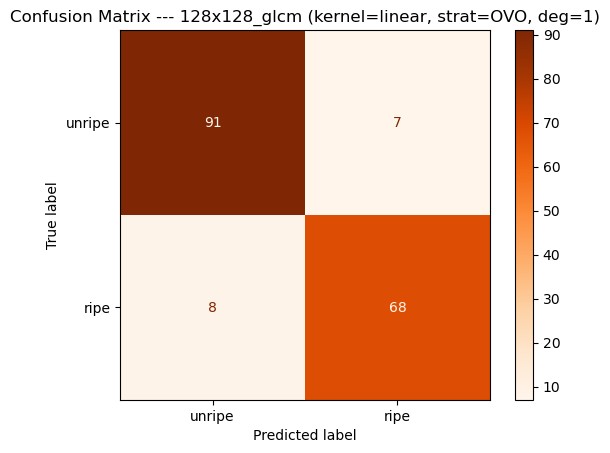


=== SVM (kernel=linear, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.8468    0.9400    0.8910       100
        ripe     0.7556    0.7473    0.7514        91

   micro avg     0.8060    0.8482    0.8265       191
   macro avg     0.8012    0.8436    0.8212       191
weighted avg     0.8034    0.8482    0.8245       191



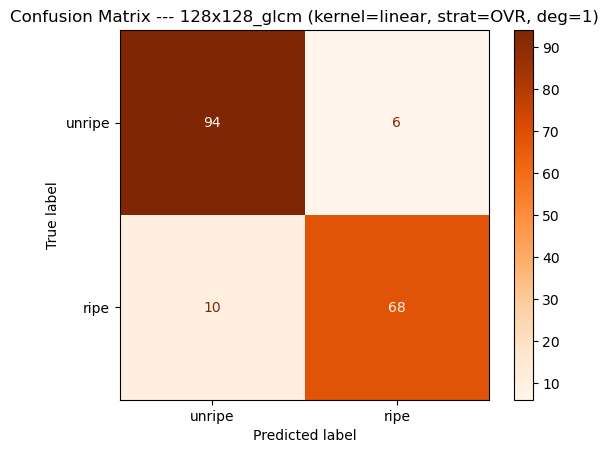


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_glcm\linear\linear_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_glcm\linear\linear_results_pairwise.csv


=== SVM (kernel=rbf, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.8455    0.9300    0.8857       100
        ripe     0.8111    0.8022    0.8066        91

   micro avg     0.8300    0.8691    0.8491       191
   macro avg     0.8283    0.8661    0.8462       191
weighted avg     0.8291    0.8691    0.8480       191



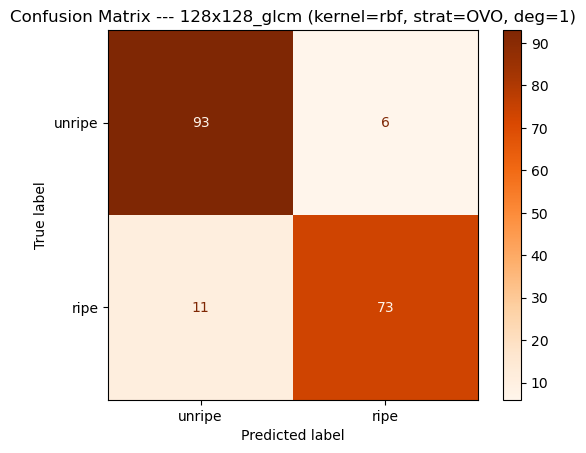


=== SVM (kernel=rbf, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.8468    0.9400    0.8910       100
        ripe     0.7957    0.8132    0.8043        91

   micro avg     0.8235    0.8796    0.8506       191
   macro avg     0.8213    0.8766    0.8477       191
weighted avg     0.8225    0.8796    0.8497       191



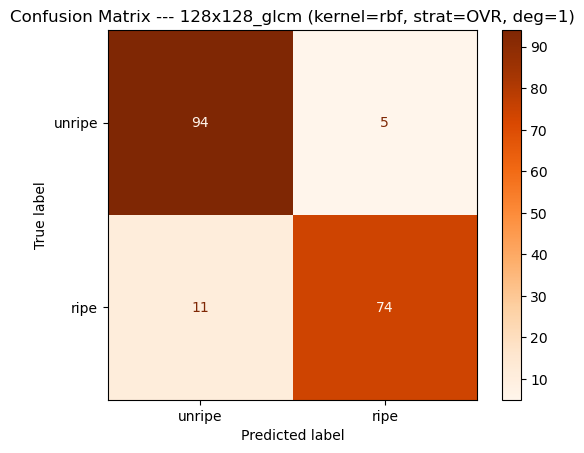


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_glcm\rbf\rbf_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_glcm\rbf\rbf_results_pairwise.csv


=== SVM (kernel=sigmoid, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.7570    0.8100    0.7826       100
        ripe     0.5402    0.5165    0.5281        91

   micro avg     0.6598    0.6702    0.6649       191
   macro avg     0.6486    0.6632    0.6553       191
weighted avg     0.6537    0.6702    0.6613       191



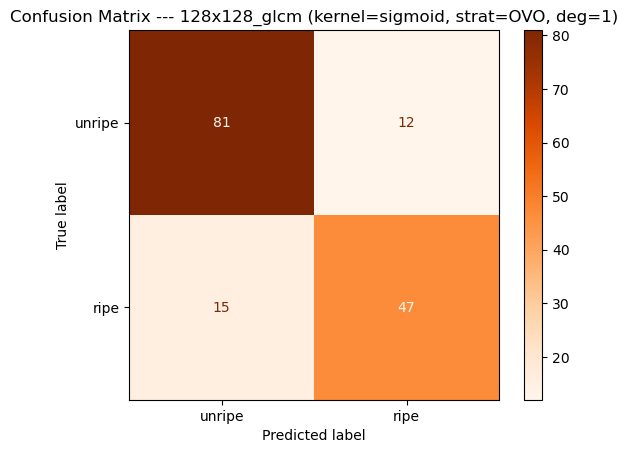


=== SVM (kernel=sigmoid, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.7477    0.8000    0.7729       100
        ripe     0.5256    0.4505    0.4852        91

   micro avg     0.6541    0.6335    0.6436       191
   macro avg     0.6367    0.6253    0.6291       191
weighted avg     0.6419    0.6335    0.6359       191



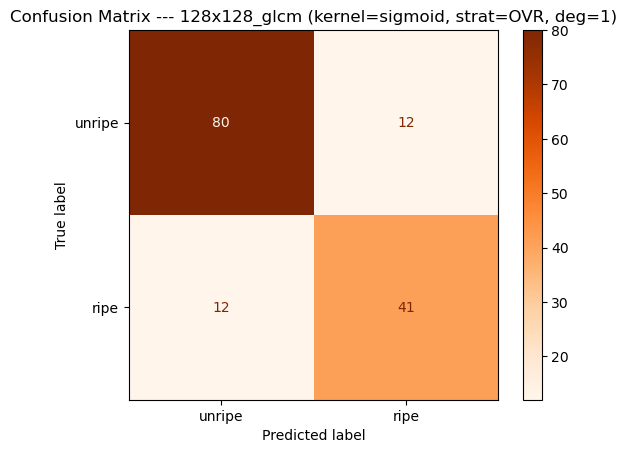


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_glcm\sigmoid\sigmoid_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_glcm\sigmoid\sigmoid_results_pairwise.csv


 Now running: 128x128_lbp

=== SVM (kernel=poly, degree=3, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.7857    0.8800    0.8302       100
        ripe     0.9143    0.7033    0.7950        91

   micro avg     0.8352    0.7958    0.8150       191
   macro avg     0.8500    0.7916    0.8126       191
weighted avg     0.8470    0.7958    0.8134       191



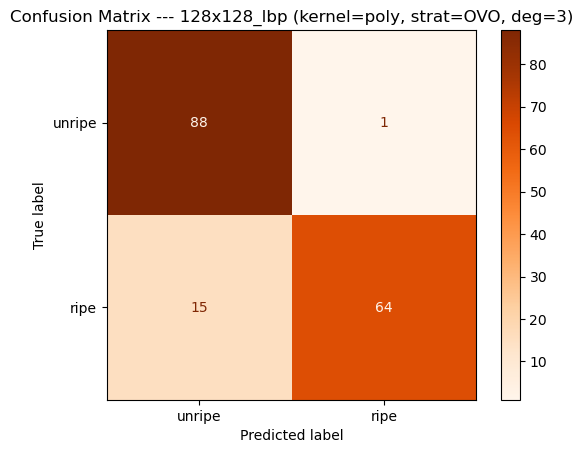


=== SVM (kernel=poly, degree=4, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.7213    0.8800    0.7928       100
        ripe     0.9286    0.5714    0.7075        91

   micro avg     0.7865    0.7330    0.7588       191
   macro avg     0.8249    0.7257    0.7501       191
weighted avg     0.8201    0.7330    0.7521       191



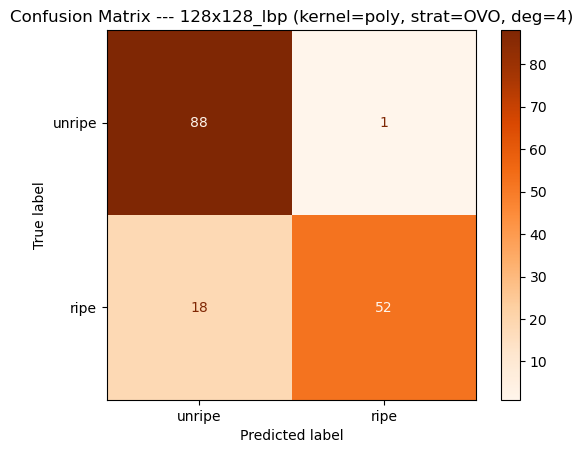


=== SVM (kernel=poly, degree=5, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.7477    0.8300    0.7867       100
        ripe     0.9091    0.5495    0.6849        91

   micro avg     0.8012    0.6963    0.7451       191
   macro avg     0.8284    0.6897    0.7358       191
weighted avg     0.8246    0.6963    0.7382       191



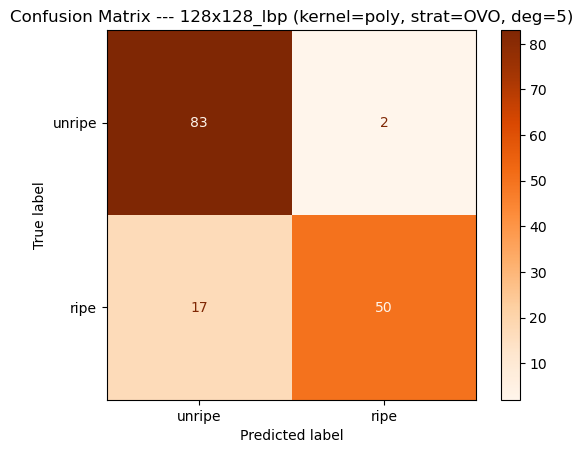


=== SVM (kernel=poly, degree=6, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.6640    0.8300    0.7378       100
        ripe     0.9130    0.4615    0.6131        91

   micro avg     0.7310    0.6545    0.6906       191
   macro avg     0.7885    0.6458    0.6755       191
weighted avg     0.7827    0.6545    0.6784       191



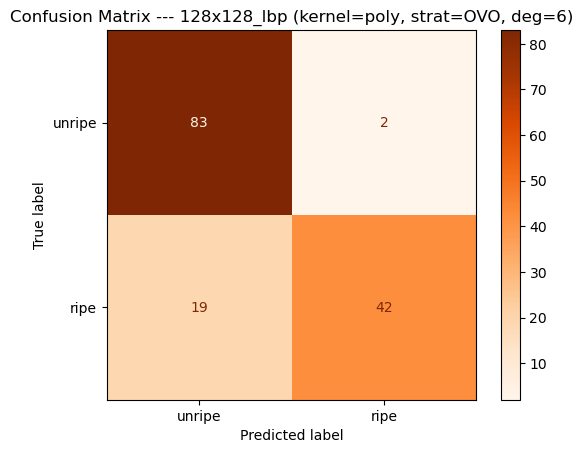


=== SVM (kernel=poly, degree=7, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.7576    0.7500    0.7538       100
        ripe     0.8913    0.4505    0.5985        91

   micro avg     0.8000    0.6073    0.6905       191
   macro avg     0.8244    0.6003    0.6762       191
weighted avg     0.8213    0.6073    0.6798       191



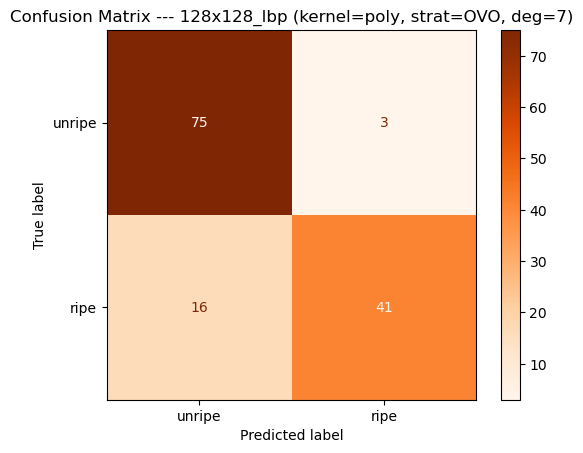


=== SVM (kernel=poly, degree=8, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.6606    0.7200    0.6890       100
        ripe     0.8636    0.4176    0.5630        91

   micro avg     0.7190    0.5759    0.6395       191
   macro avg     0.7621    0.5688    0.6260       191
weighted avg     0.7573    0.5759    0.6289       191



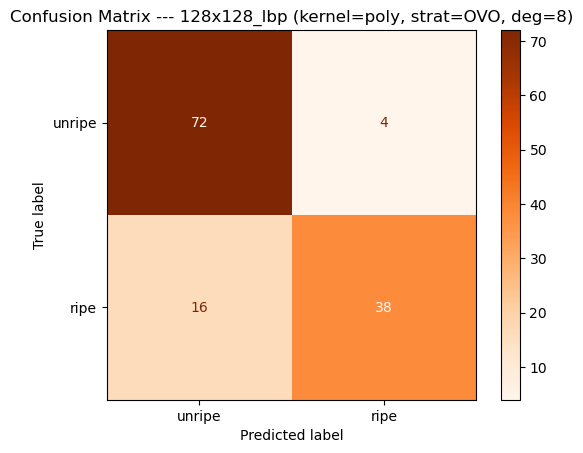


=== SVM (kernel=poly, degree=9, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.7209    0.6200    0.6667       100
        ripe     0.8372    0.3956    0.5373        91

   micro avg     0.7597    0.5131    0.6125       191
   macro avg     0.7791    0.5078    0.6020       191
weighted avg     0.7763    0.5131    0.6050       191



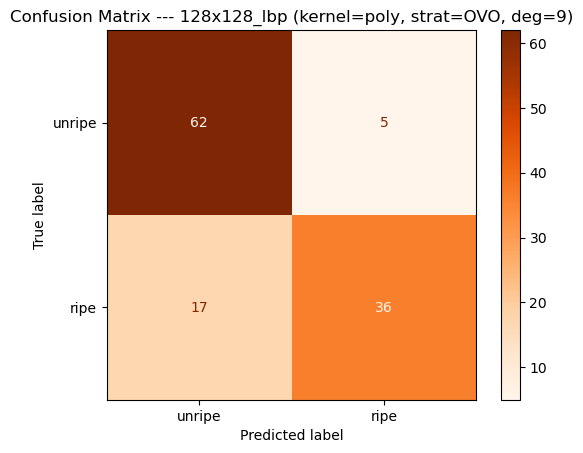


=== SVM (kernel=poly, degree=3, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.7440    0.9300    0.8267       100
        ripe     0.8312    0.7033    0.7619        91

   micro avg     0.7772    0.8220    0.7990       191
   macro avg     0.7876    0.8166    0.7943       191
weighted avg     0.7855    0.8220    0.7958       191



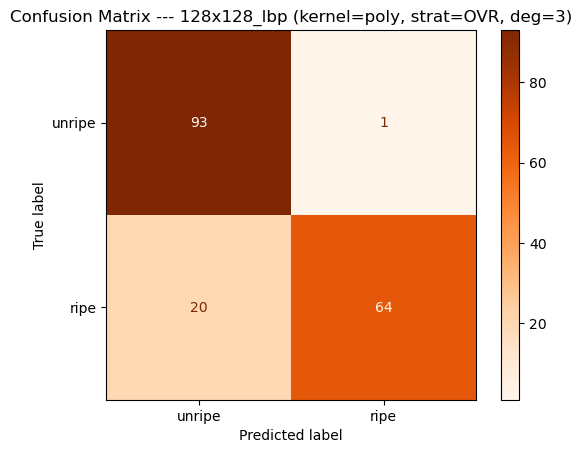


=== SVM (kernel=poly, degree=4, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.7778    0.9100    0.8387       100
        ripe     0.8939    0.6484    0.7516        91

   micro avg     0.8197    0.7853    0.8021       191
   macro avg     0.8359    0.7792    0.7952       191
weighted avg     0.8331    0.7853    0.7972       191



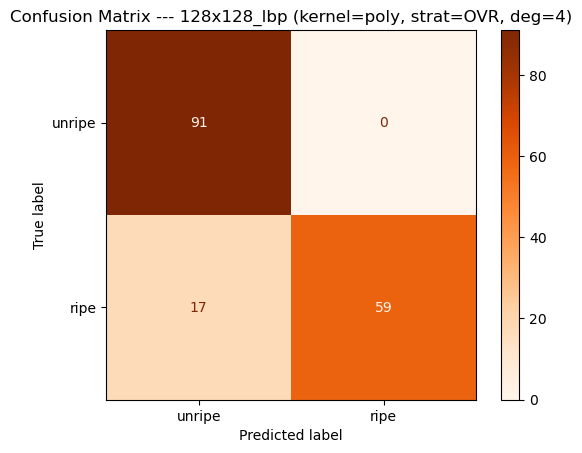


=== SVM (kernel=poly, degree=5, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.7768    0.8700    0.8208       100
        ripe     0.8553    0.7143    0.7784        91

   micro avg     0.8085    0.7958    0.8021       191
   macro avg     0.8160    0.7921    0.7996       191
weighted avg     0.8142    0.7958    0.8006       191



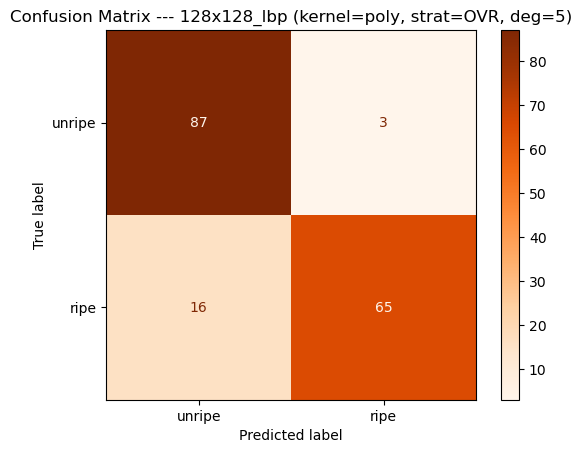


=== SVM (kernel=poly, degree=6, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.8113    0.8600    0.8350       100
        ripe     0.8630    0.6923    0.7683        91

   micro avg     0.8324    0.7801    0.8054       191
   macro avg     0.8372    0.7762    0.8016       191
weighted avg     0.8359    0.7801    0.8032       191



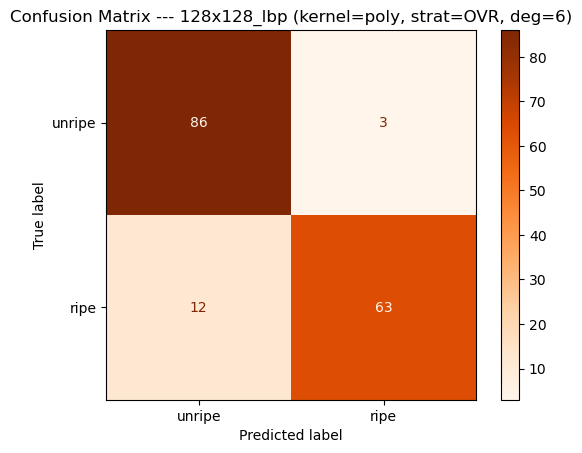


=== SVM (kernel=poly, degree=7, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.7843    0.8000    0.7921       100
        ripe     0.8333    0.7143    0.7692        91

   micro avg     0.8056    0.7592    0.7817       191
   macro avg     0.8088    0.7571    0.7807       191
weighted avg     0.8077    0.7592    0.7812       191



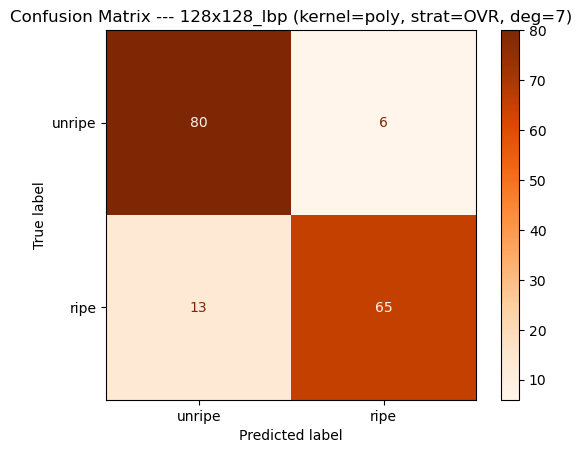


=== SVM (kernel=poly, degree=8, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.7872    0.7400    0.7629       100
        ripe     0.8101    0.7033    0.7529        91

   micro avg     0.7977    0.7225    0.7582       191
   macro avg     0.7987    0.7216    0.7579       191
weighted avg     0.7981    0.7225    0.7581       191



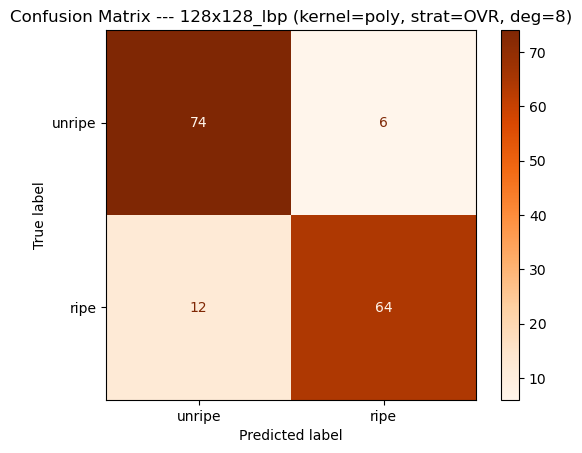


=== SVM (kernel=poly, degree=9, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.7849    0.7300    0.7565       100
        ripe     0.8148    0.7253    0.7674        91

   micro avg     0.7989    0.7277    0.7616       191
   macro avg     0.7999    0.7276    0.7620       191
weighted avg     0.7992    0.7277    0.7617       191



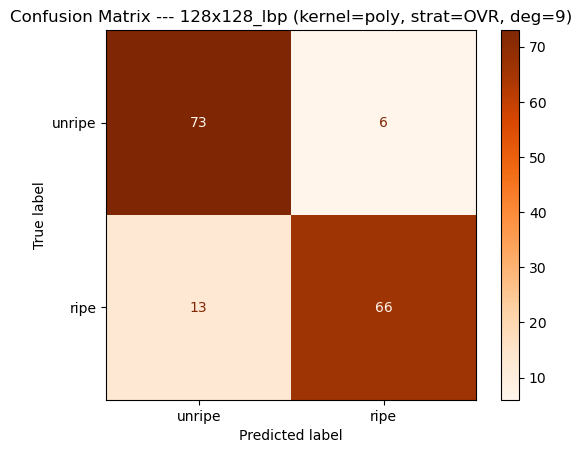


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_lbp\poly\poly_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_lbp\poly\poly_results_pairwise.csv


=== SVM (kernel=linear, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.7706    0.8400    0.8038       100
        ripe     0.7831    0.7143    0.7471        91

   micro avg     0.7760    0.7801    0.7781       191
   macro avg     0.7769    0.7771    0.7755       191
weighted avg     0.7766    0.7801    0.7768       191



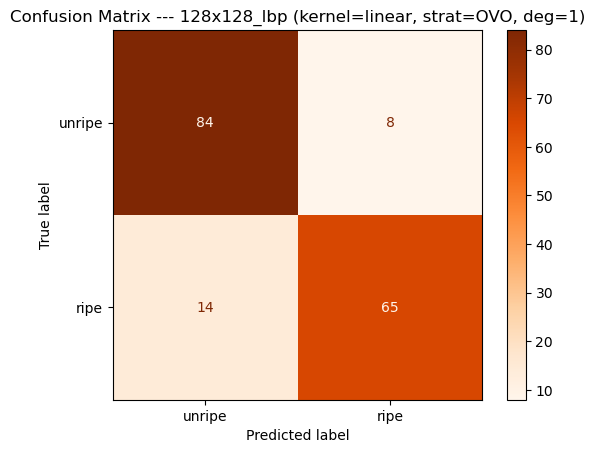


=== SVM (kernel=linear, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.7273    0.8800    0.7964       100
        ripe     0.7412    0.6923    0.7159        91

   micro avg     0.7330    0.7906    0.7607       191
   macro avg     0.7342    0.7862    0.7561       191
weighted avg     0.7339    0.7906    0.7580       191



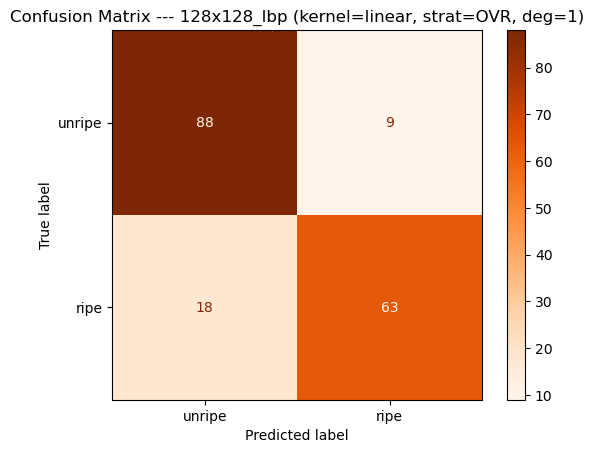


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_lbp\linear\linear_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_lbp\linear\linear_results_pairwise.csv


=== SVM (kernel=rbf, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.7913    0.9100    0.8465       100
        ripe     0.8493    0.6813    0.7561        91

   micro avg     0.8138    0.8010    0.8074       191
   macro avg     0.8203    0.7957    0.8013       191
weighted avg     0.8189    0.8010    0.8034       191



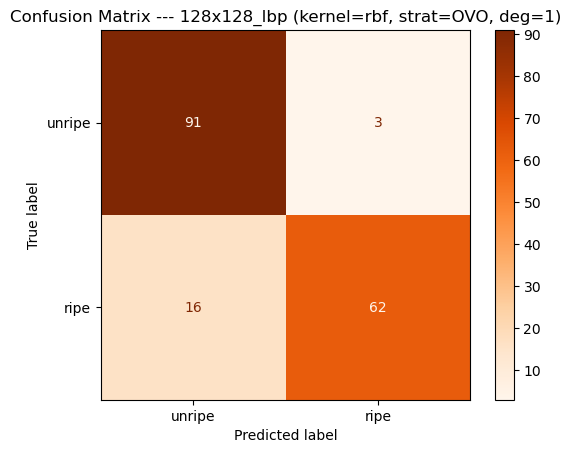


=== SVM (kernel=rbf, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.7966    0.9400    0.8624       100
        ripe     0.8732    0.6813    0.7654        91

   micro avg     0.8254    0.8168    0.8211       191
   macro avg     0.8349    0.8107    0.8139       191
weighted avg     0.8331    0.8168    0.8162       191



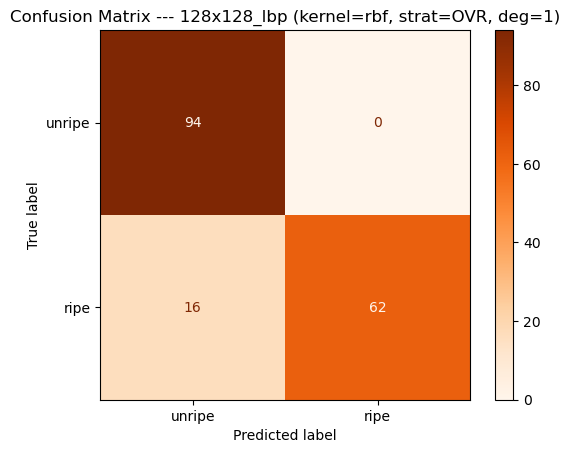


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_lbp\rbf\rbf_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_lbp\rbf\rbf_results_pairwise.csv


=== SVM (kernel=sigmoid, degree=1, strat=OVO) ===
              precision    recall  f1-score   support

      unripe     0.5847    0.6900    0.6330       100
        ripe     0.6154    0.4396    0.5128        91

   micro avg     0.5956    0.5707    0.5829       191
   macro avg     0.6001    0.5648    0.5729       191
weighted avg     0.5993    0.5707    0.5758       191



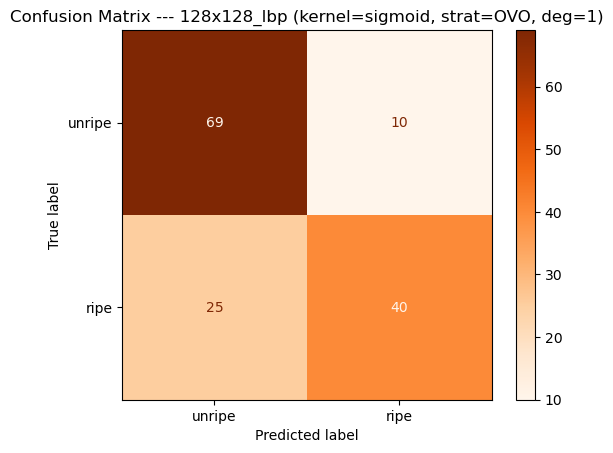


=== SVM (kernel=sigmoid, degree=1, strat=OVR) ===
              precision    recall  f1-score   support

      unripe     0.5772    0.7100    0.6368       100
        ripe     0.4615    0.5275    0.4923        91

   micro avg     0.5242    0.6230    0.5694       191
   macro avg     0.5194    0.6187    0.5645       191
weighted avg     0.5221    0.6230    0.5679       191



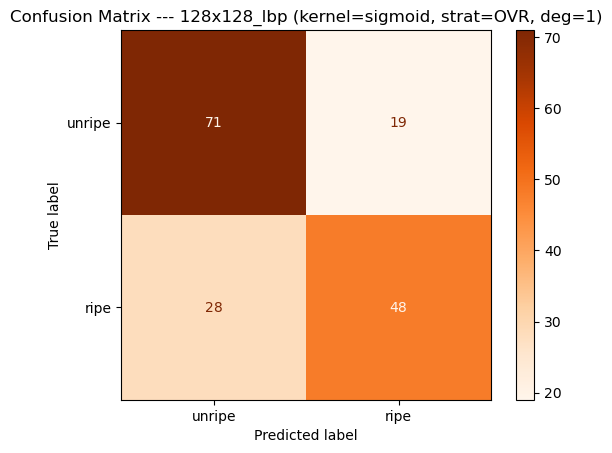


Saved:
  C:\Users\User\Desktop\Results\P1\128x128_lbp\sigmoid\sigmoid_results.csv
  C:\Users\User\Desktop\Results\P1\128x128_lbp\sigmoid\sigmoid_results_pairwise.csv



In [19]:
from svm_classification import svm_classification

base_dir = r"C:\Users\User\Desktop\FYP\Dataset\papaya_1"
results_dir = r"C:\Users\User\Desktop\Results\P1"

feature_types = ['128x128_rgb', '128x128_his', '128x128_lab', '128x128_glcm', '128x128_lbp']

class_order=['unripe', 'ripe']

for feature_name in feature_types:
    train_csv = f"{base_dir}\\{feature_name}_train.csv"
    test_csv  = f"{base_dir}\\{feature_name}_test.csv"

    print(f"\n Now running: {feature_name}")

    svm_classification(
        train_csv     = train_csv,
        test_csv      = test_csv,
        feature_name  = feature_name,
        degrees       = list(range(3, 10)), 
        strategies    = ['ovo', 'ovr'],
        kernels       = ['poly'],
        class_order   = class_order,
        output_dir    = f"{results_dir}\\{feature_name}\\poly",
        out_csv_name  = f"poly_results.csv"
    )

    for kernel in ['linear', 'rbf', 'sigmoid']:
        svm_classification(
            train_csv     = train_csv,
            test_csv      = test_csv,
            feature_name  = feature_name,
            degrees       = [1],
            strategies    = ['ovo', 'ovr'],
            kernels       = [kernel],
            class_order   = class_order,
            output_dir    = f"{results_dir}\\{feature_name}\\{kernel}",
            out_csv_name  = f"{kernel}_results.csv"
        )


## Random Forest


--- Random Forest (n_estimators=10) on 128x128_papaya_1_rgb ---
              precision    recall  f1-score   support

      unripe     0.9700    0.9700    0.9700       100
        ripe     0.8765    0.7802    0.8256        91

   micro avg     0.9282    0.8796    0.9032       191
   macro avg     0.9233    0.8751    0.8978       191
weighted avg     0.9255    0.8796    0.9012       191

Training time: 0.0240 seconds


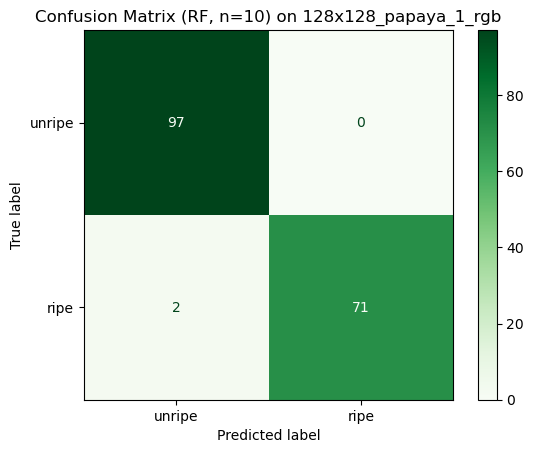

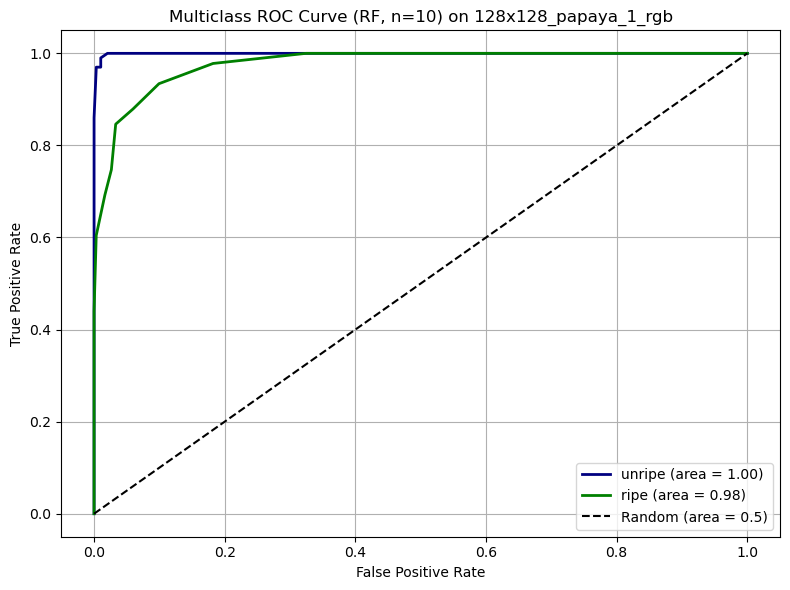


--- Random Forest (n_estimators=30) on 128x128_papaya_1_rgb ---
              precision    recall  f1-score   support

      unripe     0.9800    0.9800    0.9800       100
        ripe     0.8876    0.8681    0.8778        91

   micro avg     0.9365    0.9267    0.9316       191
   macro avg     0.9338    0.9241    0.9289       191
weighted avg     0.9360    0.9267    0.9313       191

Training time: 0.0755 seconds


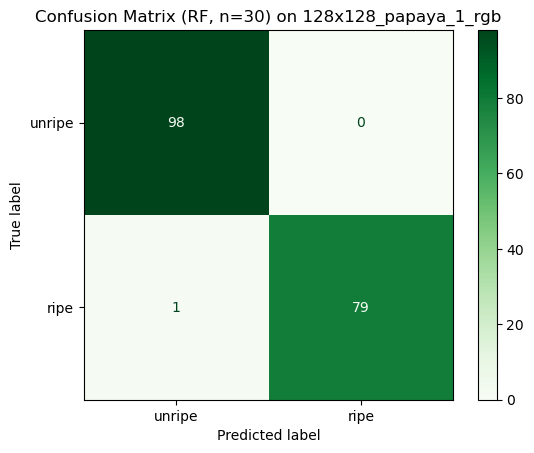

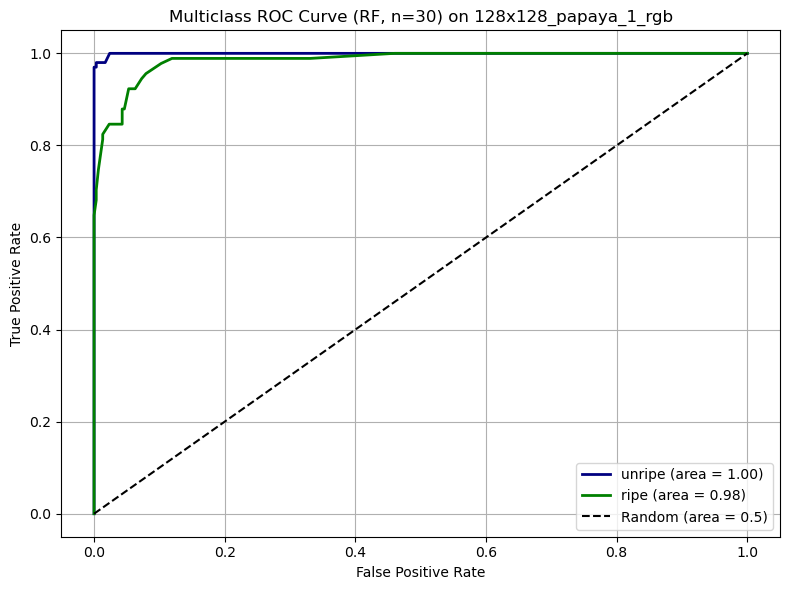


--- Random Forest (n_estimators=50) on 128x128_papaya_1_rgb ---
              precision    recall  f1-score   support

      unripe     0.9800    0.9800    0.9800       100
        ripe     0.9091    0.8791    0.8939        91

   micro avg     0.9468    0.9319    0.9393       191
   macro avg     0.9445    0.9296    0.9369       191
weighted avg     0.9462    0.9319    0.9390       191

Training time: 0.1160 seconds


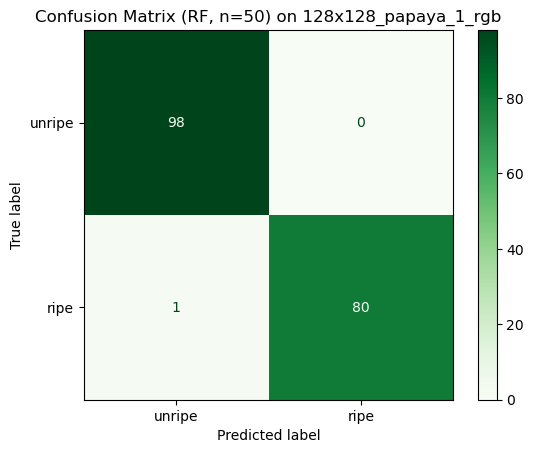

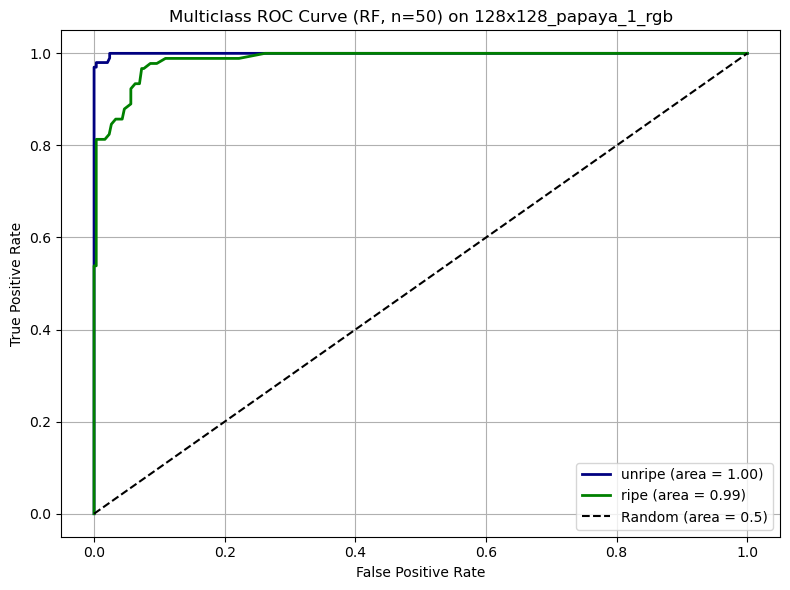


--- Random Forest (n_estimators=100) on 128x128_papaya_1_rgb ---
              precision    recall  f1-score   support

      unripe     0.9800    0.9800    0.9800       100
        ripe     0.9000    0.8901    0.8950        91

   micro avg     0.9421    0.9372    0.9396       191
   macro avg     0.9400    0.9351    0.9375       191
weighted avg     0.9419    0.9372    0.9395       191

Training time: 0.2392 seconds


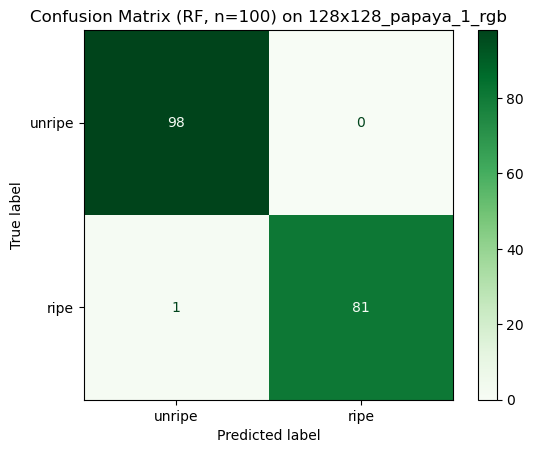

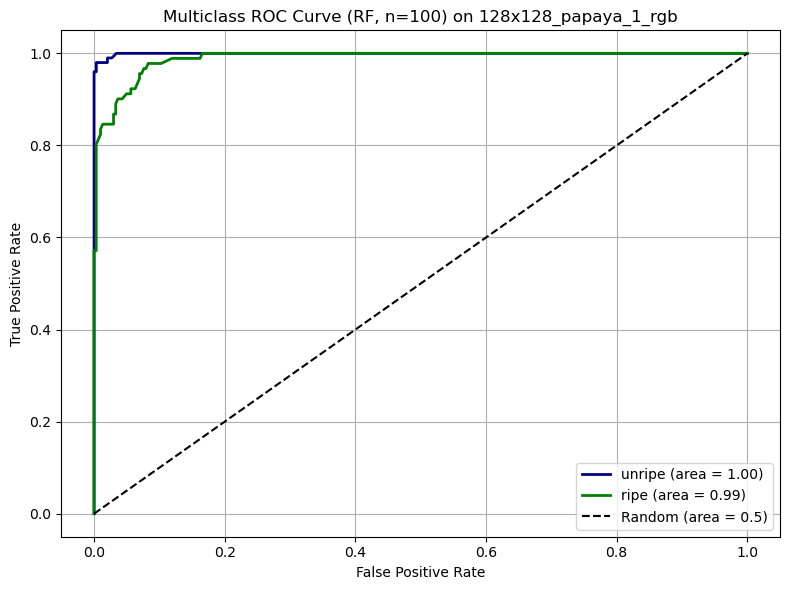


--- Random Forest (n_estimators=150) on 128x128_papaya_1_rgb ---
              precision    recall  f1-score   support

      unripe     0.9800    0.9800    0.9800       100
        ripe     0.8977    0.8681    0.8827        91

   micro avg     0.9415    0.9267    0.9340       191
   macro avg     0.9389    0.9241    0.9313       191
weighted avg     0.9408    0.9267    0.9336       191

Training time: 0.4132 seconds


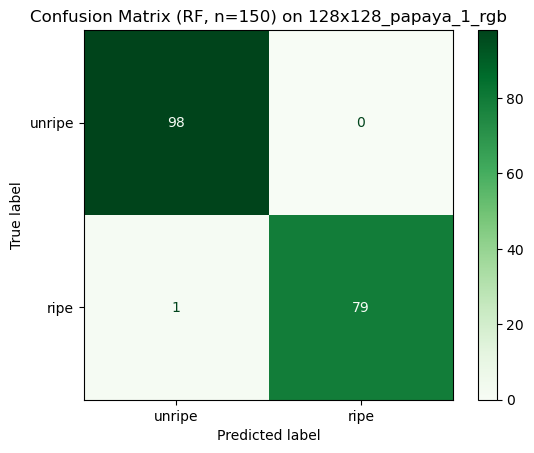

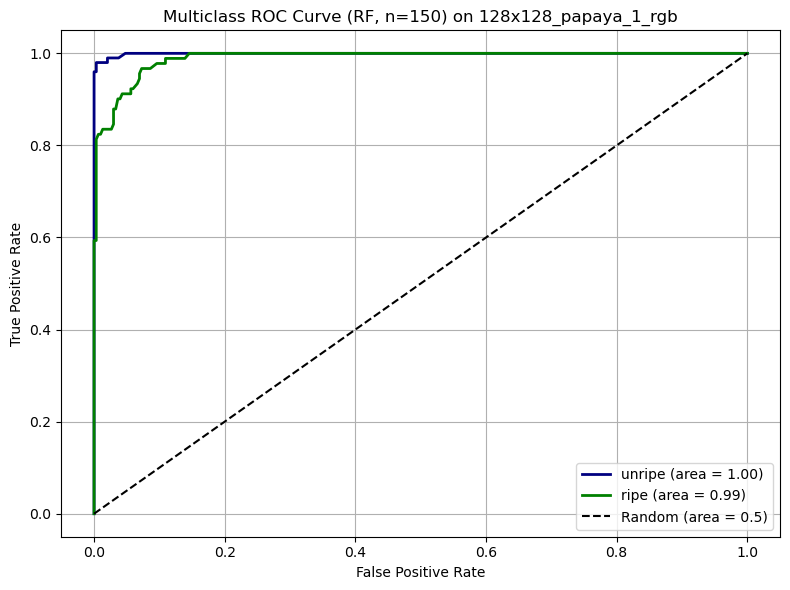


--- Random Forest (n_estimators=200) on 128x128_papaya_1_rgb ---
              precision    recall  f1-score   support

      unripe     0.9899    0.9800    0.9849       100
        ripe     0.8889    0.8791    0.8840        91

   micro avg     0.9418    0.9319    0.9368       191
   macro avg     0.9394    0.9296    0.9345       191
weighted avg     0.9418    0.9319    0.9368       191

Training time: 0.4689 seconds


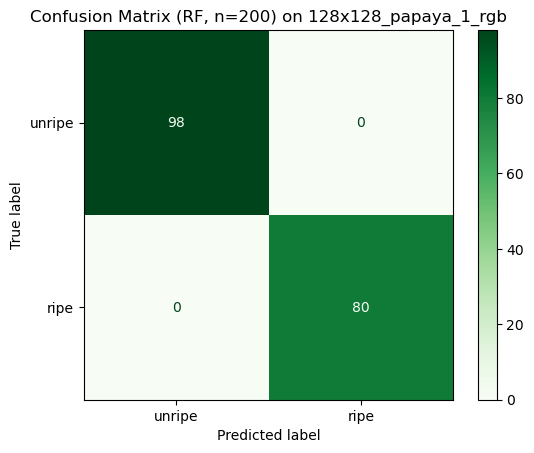

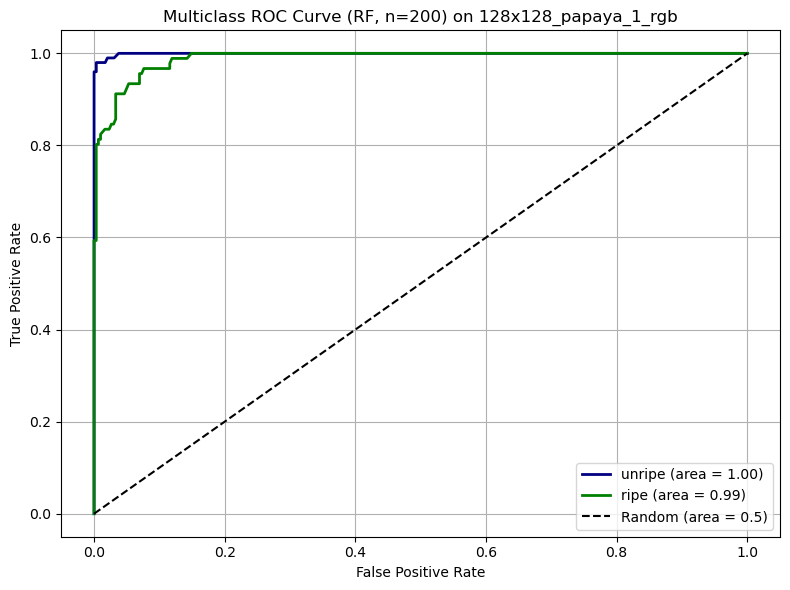

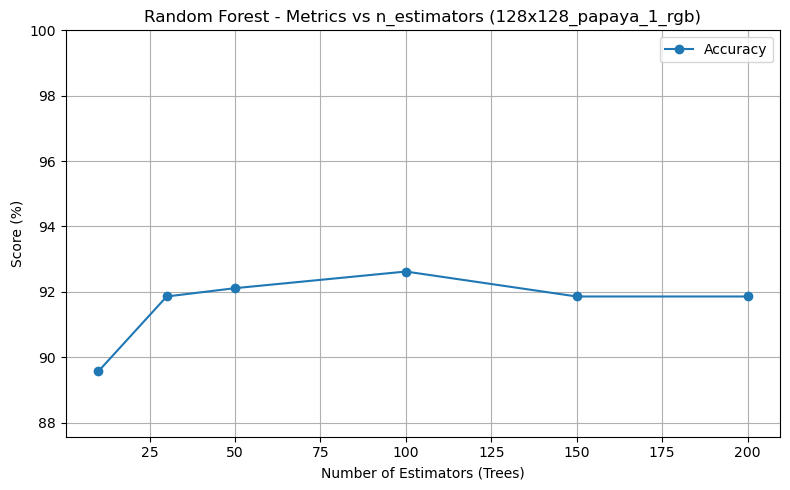

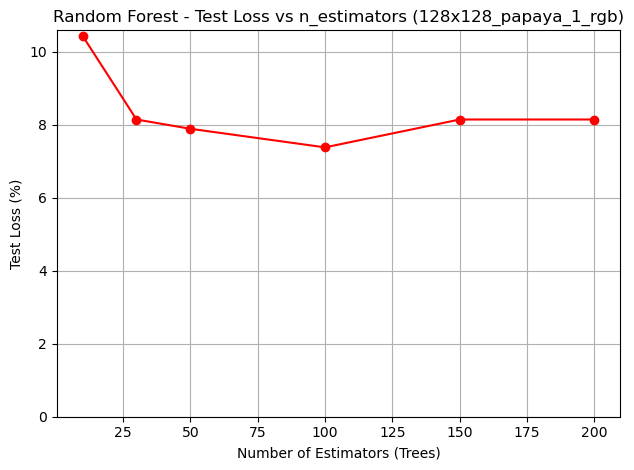

n_estimators  Accuracy (%)  Precision (%)  Recall (%)  F1-score (%)  \
0            10     89.567430      89.588303   89.567430     89.486070   
1            30     91.857506      91.938352   91.857506     91.865595   
2            50     92.111959      92.190630   92.111959     92.119540   
3           100     92.620865      92.639277   92.620865     92.621764   
4           150     91.857506      91.927502   91.857506     91.860823   
5           200     91.857506      91.955177   91.857506     91.875347   

   Test Loss (%)  Training Time (s)  
0      10.432570           0.023999  
1       8.142494           0.075476  
2       7.888041           0.116024  
3       7.379135           0.239243  
4       8.142494           0.413152  
5       8.142494           0.468886

In [21]:
from rf_classification import rf_classification

rf_classification(
    train_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_rgb_train.csv", 
    test_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_rgb_test.csv",
    feature="128x128_papaya_1_rgb",
    class_order=['unripe', 'ripe']
)


--- Random Forest (n_estimators=10) on 128x128_papaya_1_his ---
              precision    recall  f1-score   support

      unripe     0.9706    0.9900    0.9802       100
        ripe     0.9114    0.7912    0.8471        91

   micro avg     0.9448    0.8953    0.9194       191
   macro avg     0.9410    0.8906    0.9136       191
weighted avg     0.9424    0.8953    0.9168       191

Training time: 0.0220 seconds


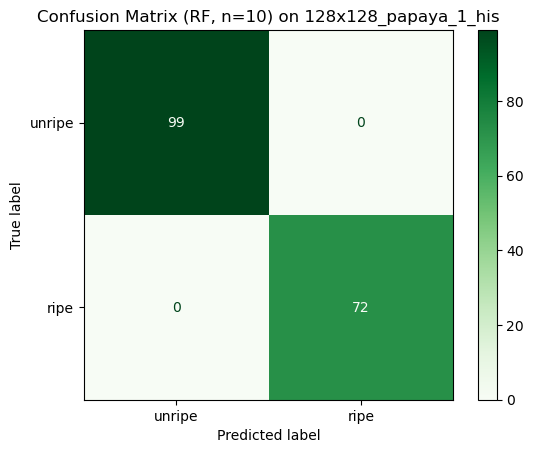

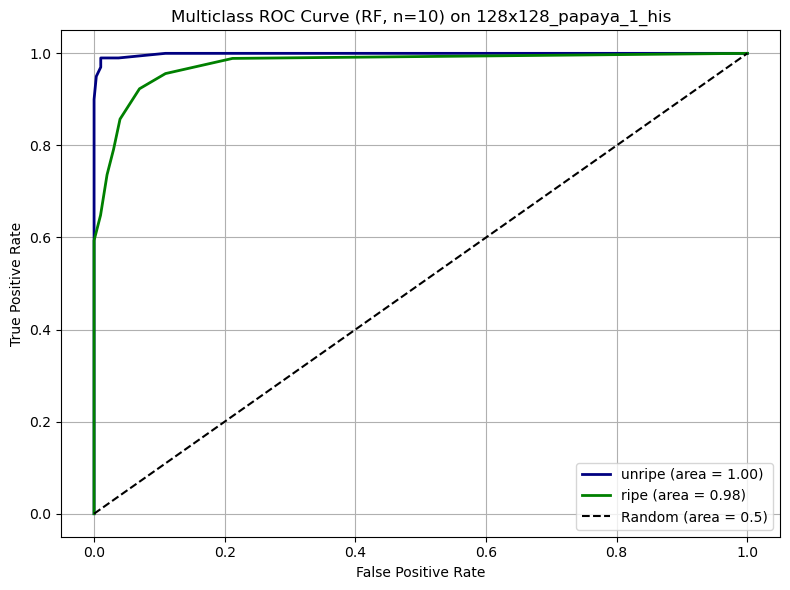


--- Random Forest (n_estimators=30) on 128x128_papaya_1_his ---
              precision    recall  f1-score   support

      unripe     0.9802    0.9900    0.9851       100
        ripe     0.8750    0.8462    0.8603        91

   micro avg     0.9312    0.9215    0.9263       191
   macro avg     0.9276    0.9181    0.9227       191
weighted avg     0.9301    0.9215    0.9256       191

Training time: 0.0640 seconds


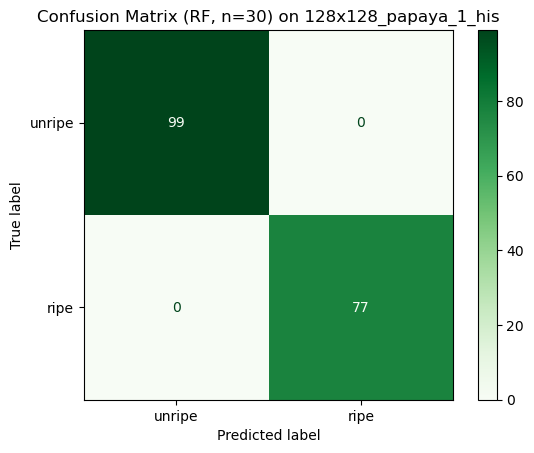

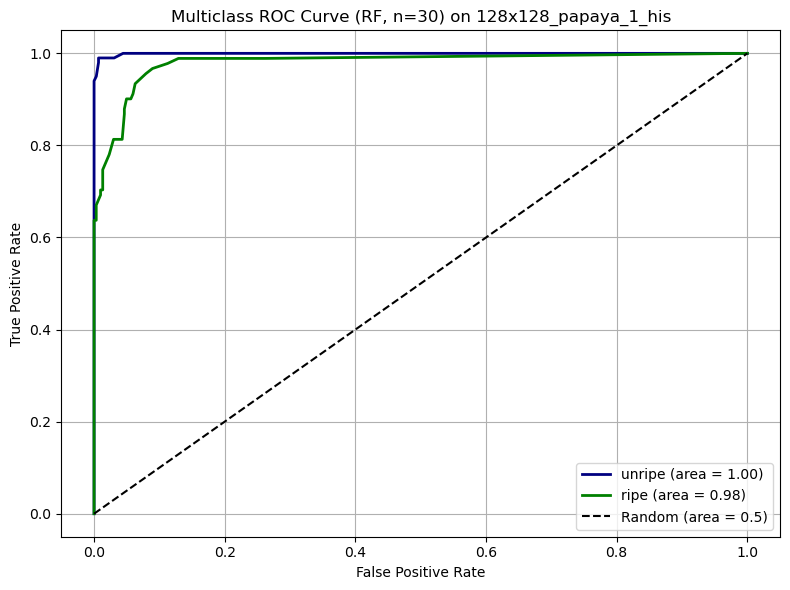


--- Random Forest (n_estimators=50) on 128x128_papaya_1_his ---
              precision    recall  f1-score   support

      unripe     0.9802    0.9900    0.9851       100
        ripe     0.8764    0.8571    0.8667        91

   micro avg     0.9316    0.9267    0.9291       191
   macro avg     0.9283    0.9236    0.9259       191
weighted avg     0.9307    0.9267    0.9287       191

Training time: 0.1055 seconds


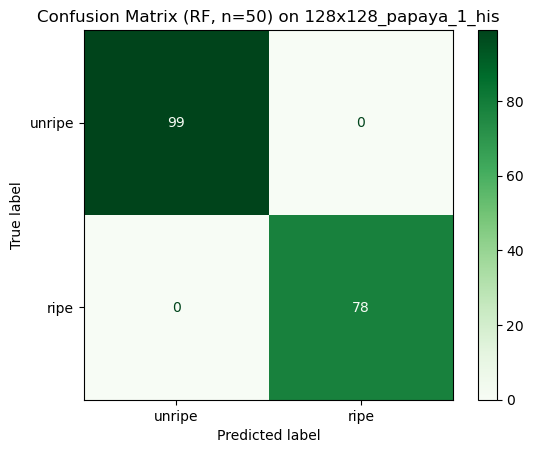

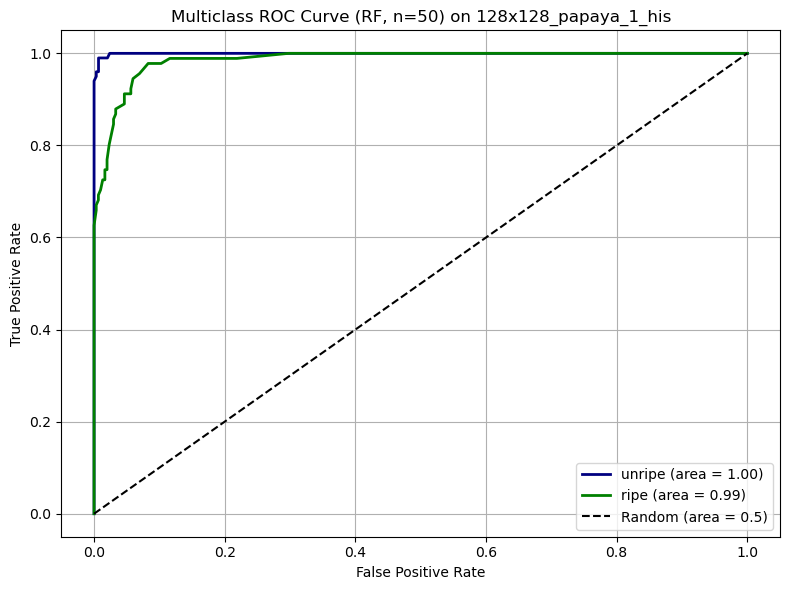


--- Random Forest (n_estimators=100) on 128x128_papaya_1_his ---
              precision    recall  f1-score   support

      unripe     0.9802    0.9900    0.9851       100
        ripe     0.8764    0.8571    0.8667        91

   micro avg     0.9316    0.9267    0.9291       191
   macro avg     0.9283    0.9236    0.9259       191
weighted avg     0.9307    0.9267    0.9287       191

Training time: 0.2122 seconds


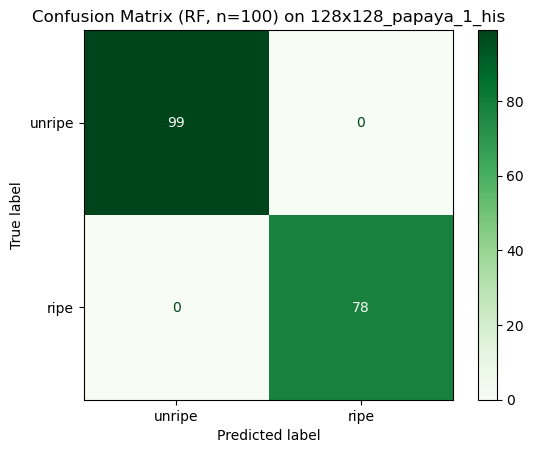

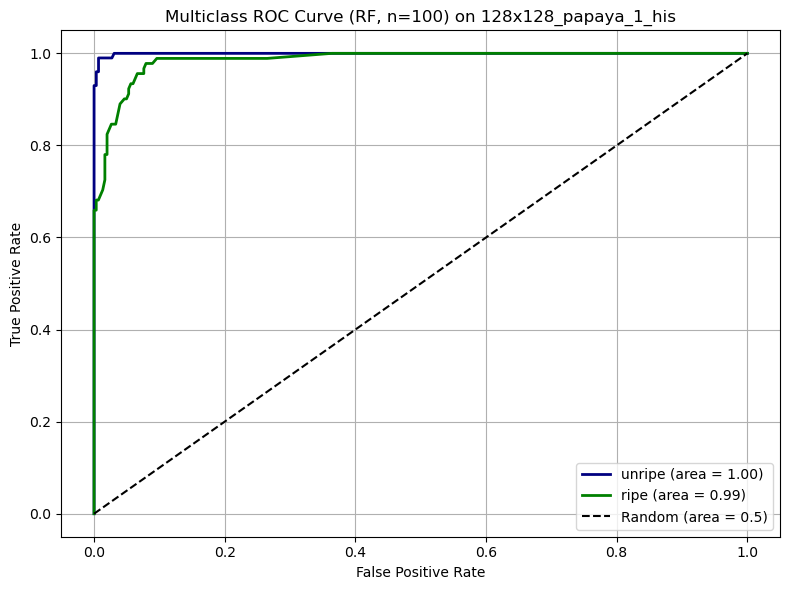


--- Random Forest (n_estimators=150) on 128x128_papaya_1_his ---
              precision    recall  f1-score   support

      unripe     0.9802    0.9900    0.9851       100
        ripe     0.8778    0.8681    0.8729        91

   micro avg     0.9319    0.9319    0.9319       191
   macro avg     0.9290    0.9291    0.9290       191
weighted avg     0.9314    0.9319    0.9316       191

Training time: 0.3352 seconds


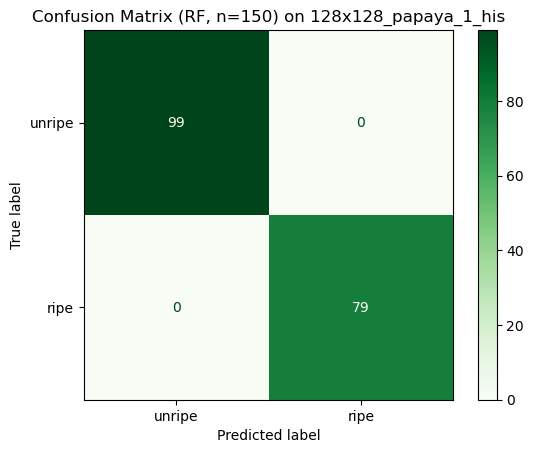

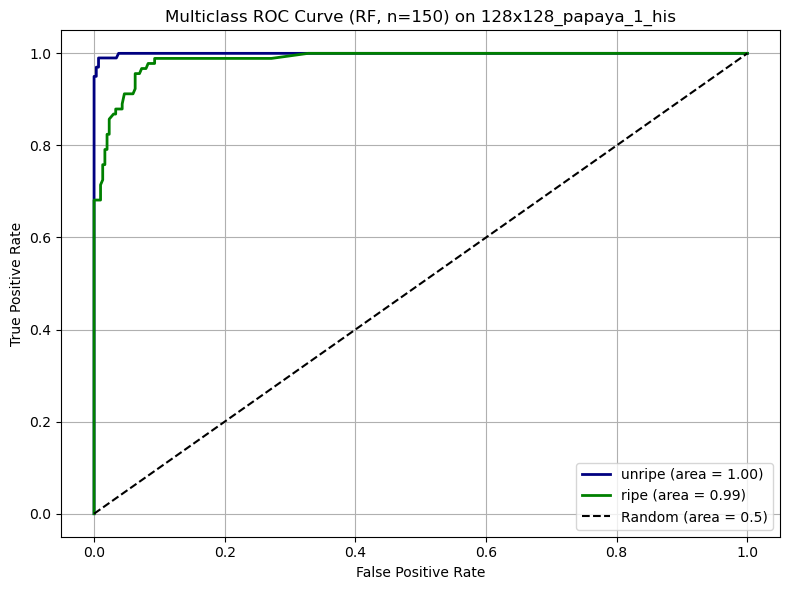


--- Random Forest (n_estimators=200) on 128x128_papaya_1_his ---
              precision    recall  f1-score   support

      unripe     0.9703    0.9800    0.9751       100
        ripe     0.8778    0.8681    0.8729        91

   micro avg     0.9267    0.9267    0.9267       191
   macro avg     0.9240    0.9241    0.9240       191
weighted avg     0.9262    0.9267    0.9264       191

Training time: 0.4441 seconds


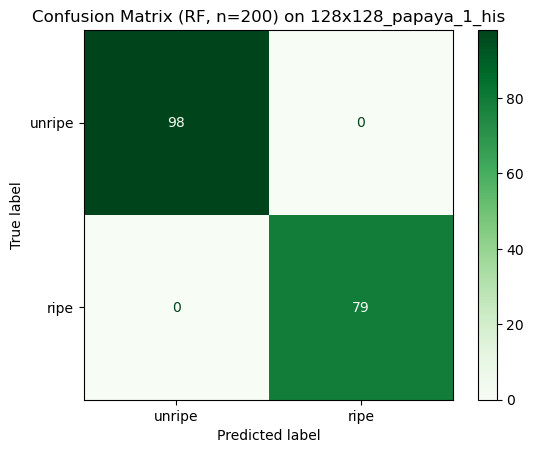

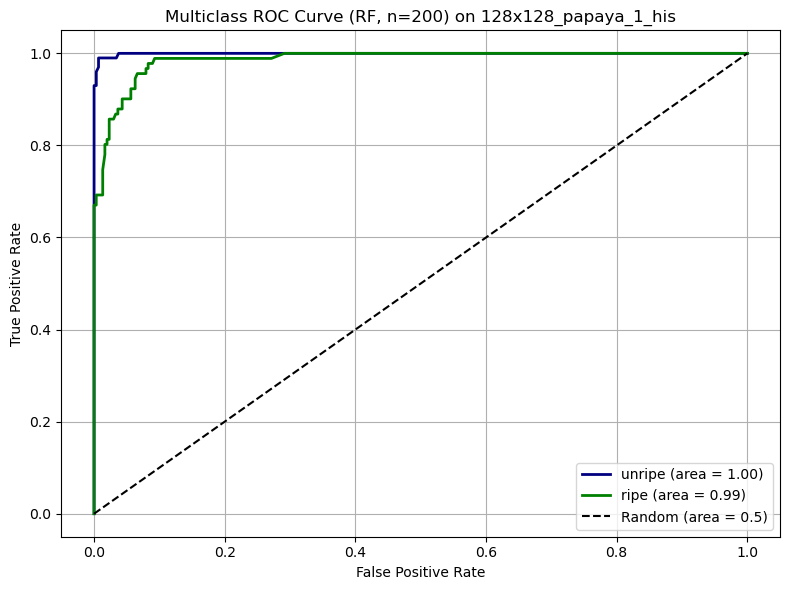

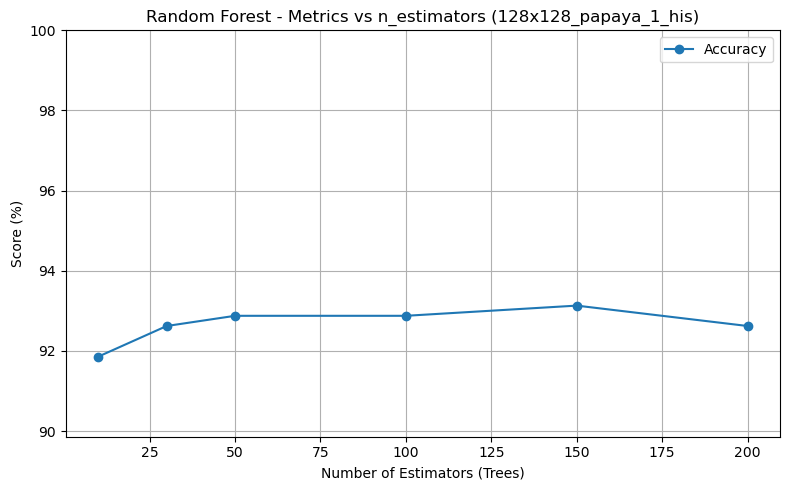

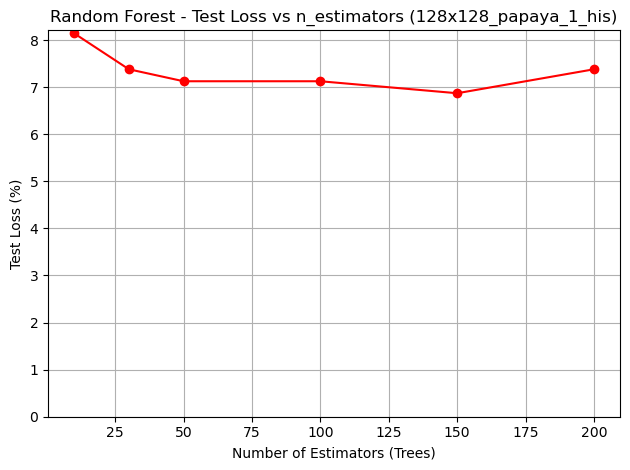

n_estimators  Accuracy (%)  Precision (%)  Recall (%)  F1-score (%)  \
0            10     91.857506      91.870628   91.857506     91.735716   
1            30     92.620865      92.574261   92.620865     92.588817   
2            50     92.875318      92.849743   92.875318     92.851605   
3           100     92.875318      92.849743   92.875318     92.851605   
4           150     93.129771      93.126268   93.129771     93.116181   
5           200     92.620865      92.669838   92.620865     92.614917   

   Test Loss (%)  Training Time (s)  
0       8.142494           0.022004  
1       7.379135           0.063999  
2       7.124682           0.105509  
3       7.124682           0.212187  
4       6.870229           0.335155  
5       7.379135           0.444088

In [22]:
from rf_classification import rf_classification

rf_classification(
    train_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_his_train.csv", 
    test_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_his_test.csv",
    feature="128x128_papaya_1_his",
    class_order=['unripe', 'ripe']
)


--- Random Forest (n_estimators=10) on 128x128_papaya_1_lab ---
              precision    recall  f1-score   support

      unripe     0.9899    0.9800    0.9849       100
        ripe     0.9255    0.9560    0.9405        91

   micro avg     0.9585    0.9686    0.9635       191
   macro avg     0.9577    0.9680    0.9627       191
weighted avg     0.9592    0.9686    0.9638       191

Training time: 0.0252 seconds


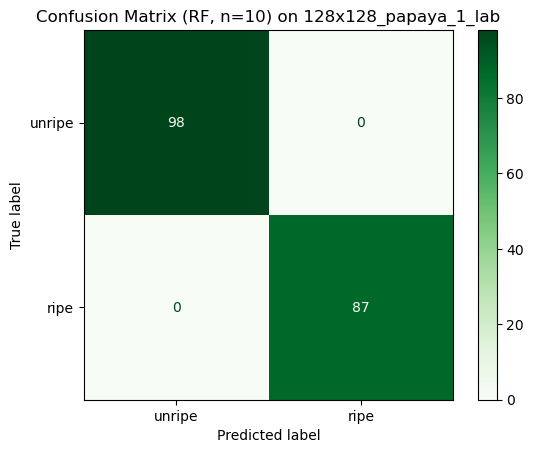

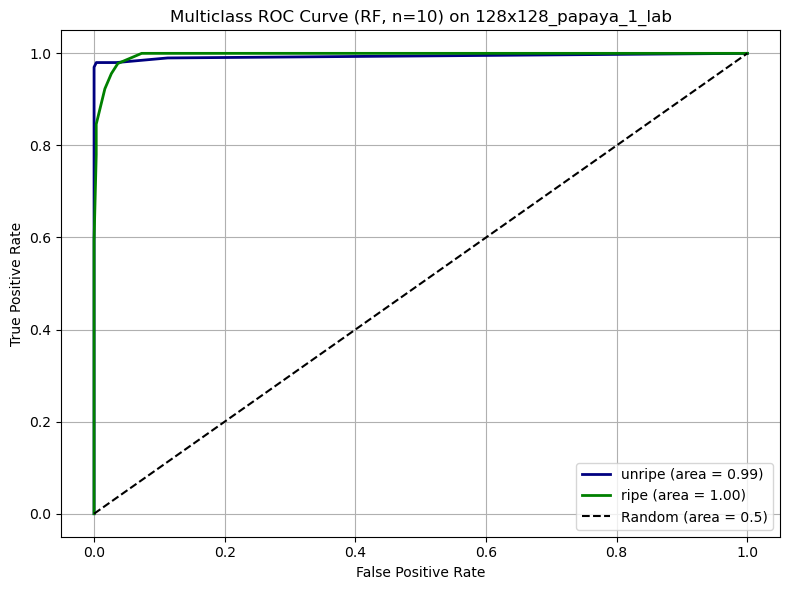


--- Random Forest (n_estimators=30) on 128x128_papaya_1_lab ---
              precision    recall  f1-score   support

      unripe     0.9899    0.9800    0.9849       100
        ripe     0.9239    0.9341    0.9290        91

   micro avg     0.9581    0.9581    0.9581       191
   macro avg     0.9569    0.9570    0.9569       191
weighted avg     0.9585    0.9581    0.9583       191

Training time: 0.0771 seconds


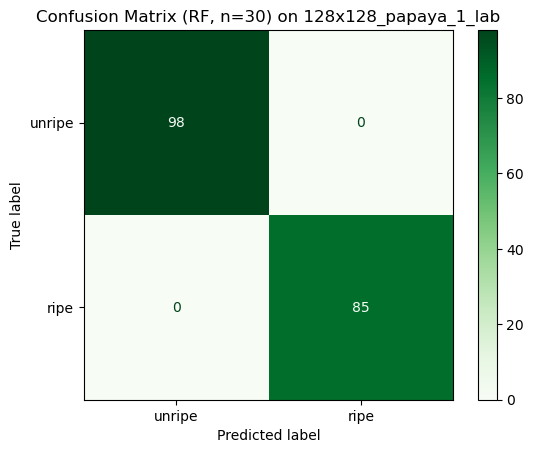

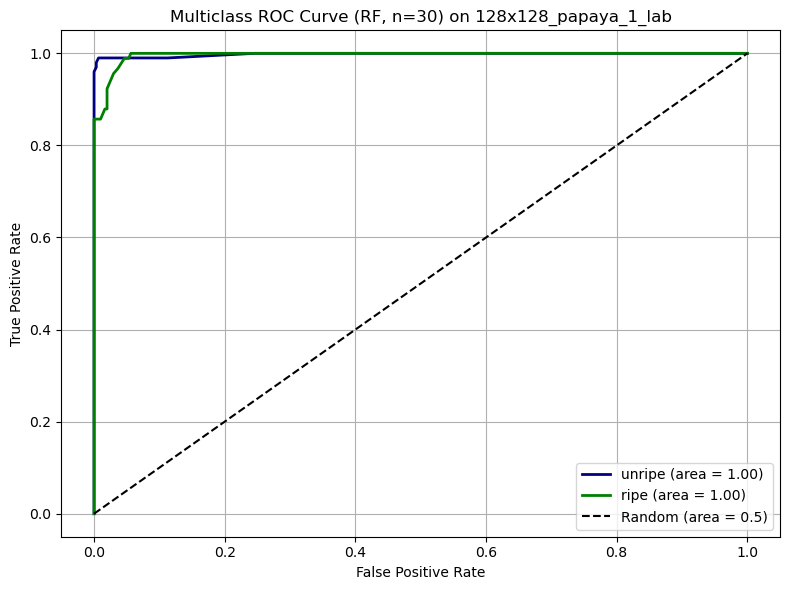


--- Random Forest (n_estimators=50) on 128x128_papaya_1_lab ---
              precision    recall  f1-score   support

      unripe     0.9899    0.9800    0.9849       100
        ripe     0.9158    0.9560    0.9355        91

   micro avg     0.9536    0.9686    0.9610       191
   macro avg     0.9528    0.9680    0.9602       191
weighted avg     0.9546    0.9686    0.9614       191

Training time: 0.1215 seconds


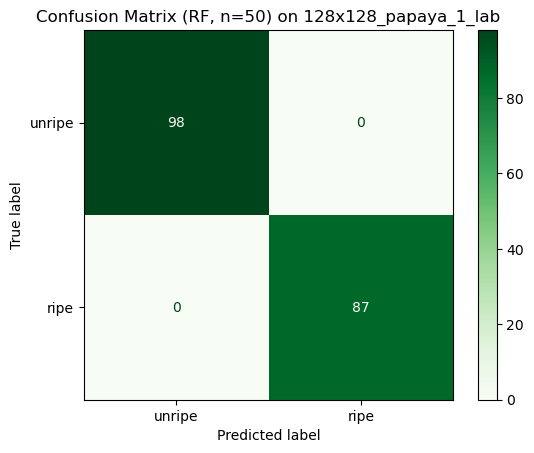

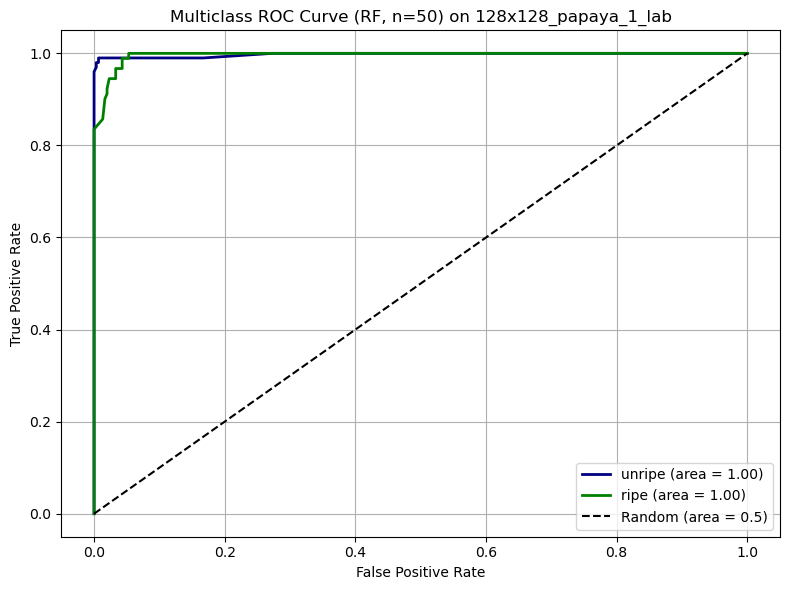


--- Random Forest (n_estimators=100) on 128x128_papaya_1_lab ---
              precision    recall  f1-score   support

      unripe     0.9899    0.9800    0.9849       100
        ripe     0.9247    0.9451    0.9348        91

   micro avg     0.9583    0.9634    0.9608       191
   macro avg     0.9573    0.9625    0.9599       191
weighted avg     0.9589    0.9634    0.9610       191

Training time: 0.2365 seconds


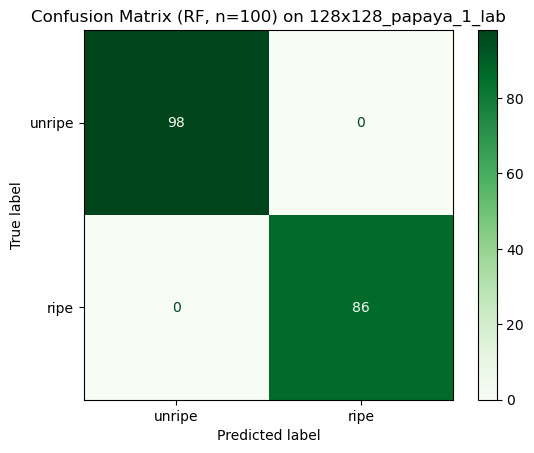

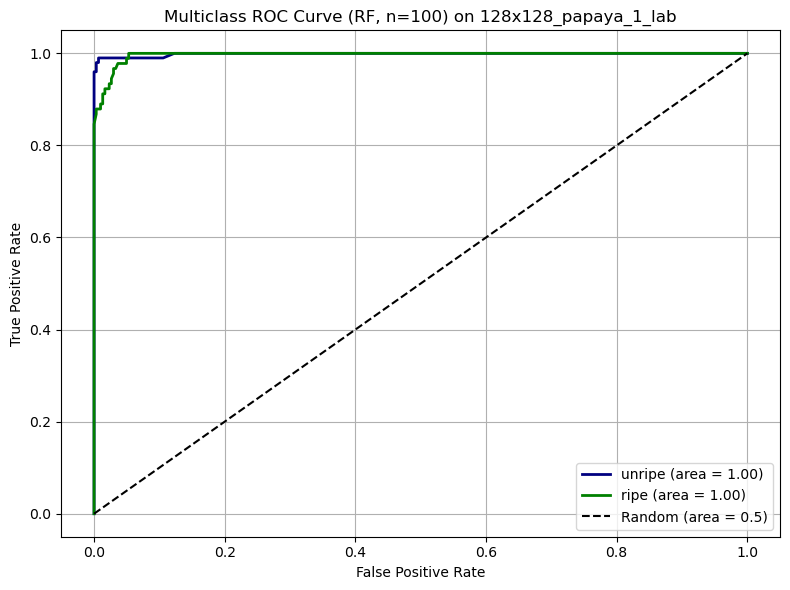


--- Random Forest (n_estimators=150) on 128x128_papaya_1_lab ---
              precision    recall  f1-score   support

      unripe     0.9899    0.9800    0.9849       100
        ripe     0.9341    0.9341    0.9341        91

   micro avg     0.9632    0.9581    0.9606       191
   macro avg     0.9620    0.9570    0.9595       191
weighted avg     0.9633    0.9581    0.9607       191

Training time: 0.3550 seconds


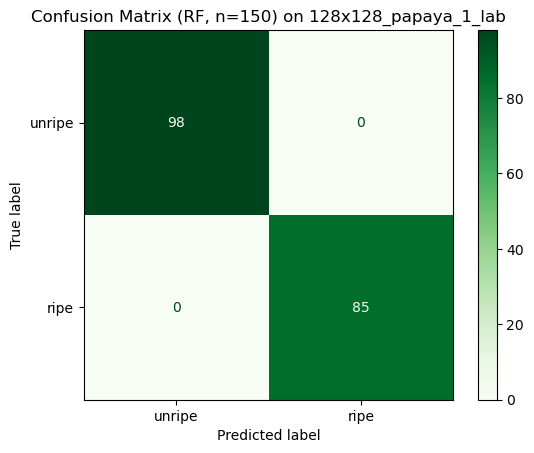

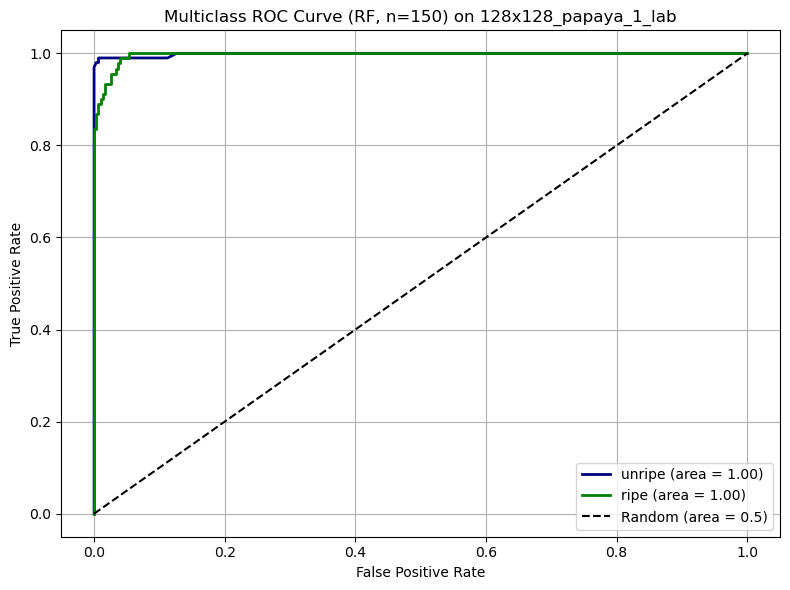


--- Random Forest (n_estimators=200) on 128x128_papaya_1_lab ---
              precision    recall  f1-score   support

      unripe     0.9899    0.9800    0.9849       100
        ripe     0.9348    0.9451    0.9399        91

   micro avg     0.9634    0.9634    0.9634       191
   macro avg     0.9623    0.9625    0.9624       191
weighted avg     0.9636    0.9634    0.9635       191

Training time: 0.4783 seconds


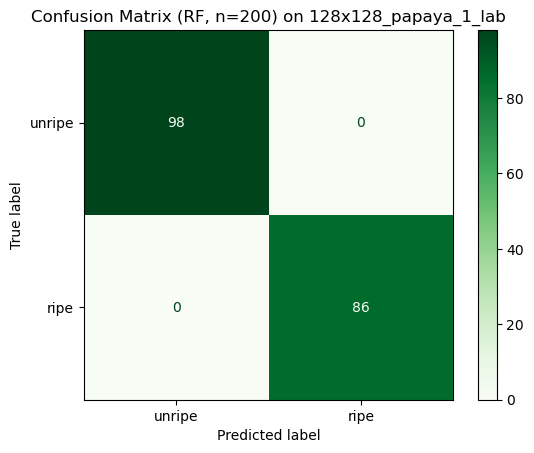

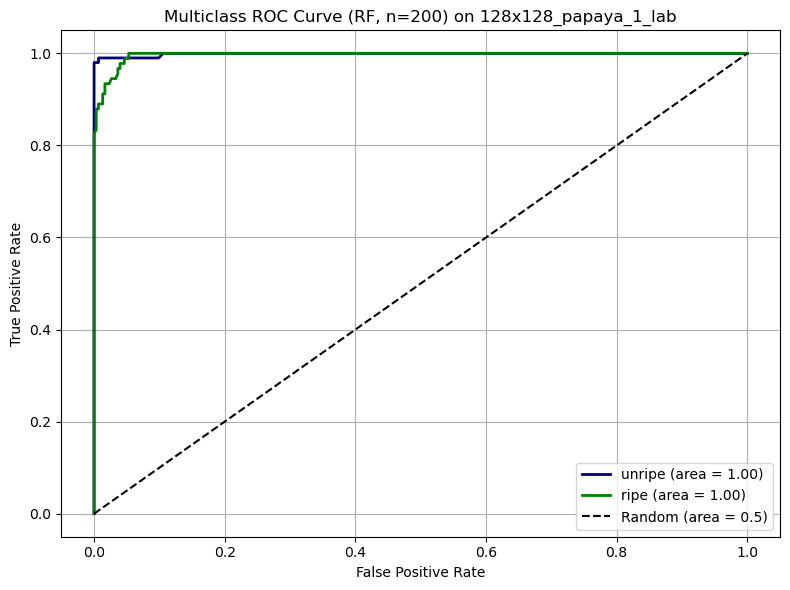

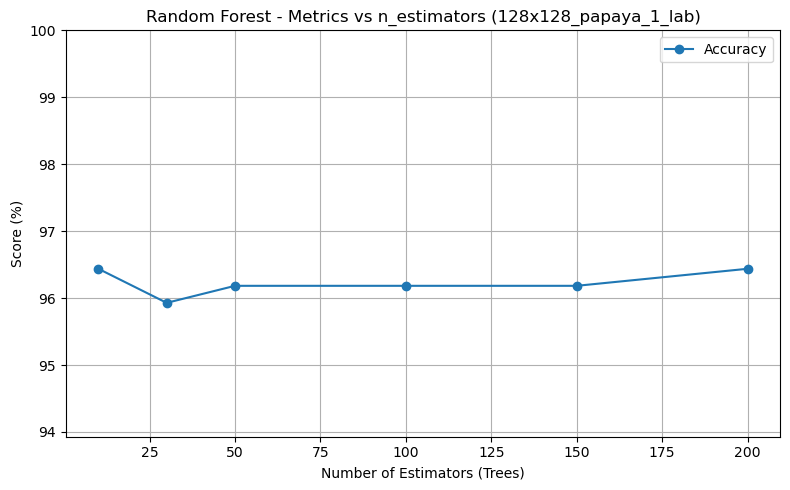

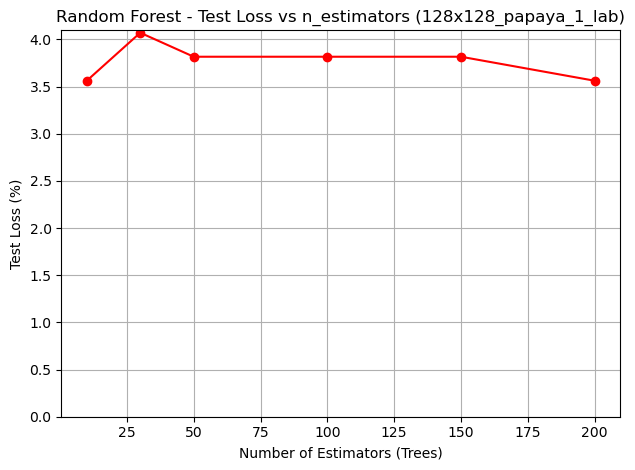

n_estimators  Accuracy (%)  Precision (%)  Recall (%)  F1-score (%)  \
0            10     96.437659      96.482597   96.437659     96.451496   
1            30     95.928753      95.969038   95.928753     95.942762   
2            50     96.183206      96.299179   96.183206     96.213292   
3           100     96.183206      96.275786   96.183206     96.211240   
4           150     96.183206      96.266346   96.183206     96.208892   
5           200     96.437659      96.508529   96.437659     96.460855   

   Test Loss (%)  Training Time (s)  
0       3.562341           0.025229  
1       4.071247           0.077060  
2       3.816794           0.121513  
3       3.816794           0.236539  
4       3.816794           0.355044  
5       3.562341           0.478311

In [23]:
from rf_classification import rf_classification

rf_classification(
    train_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lab_train.csv", 
    test_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lab_test.csv",
    feature="128x128_papaya_1_lab",
    class_order=['unripe', 'ripe']
)


--- Random Forest (n_estimators=10) on 128x128_papaya_1_lbp ---
              precision    recall  f1-score   support

      unripe     0.7328    0.8500    0.7870       100
        ripe     0.7647    0.5714    0.6541        91

   micro avg     0.7446    0.7173    0.7307       191
   macro avg     0.7487    0.7107    0.7206       191
weighted avg     0.7480    0.7173    0.7237       191

Training time: 0.0425 seconds


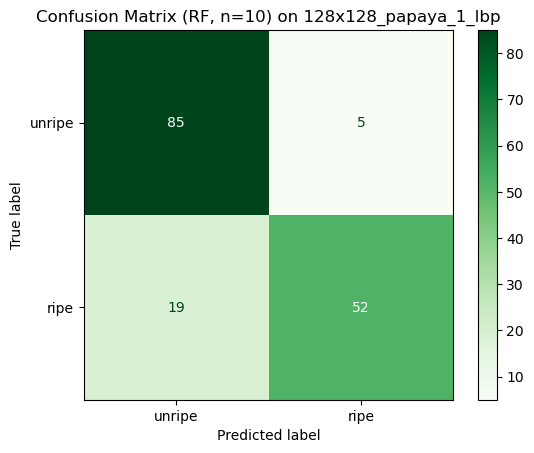

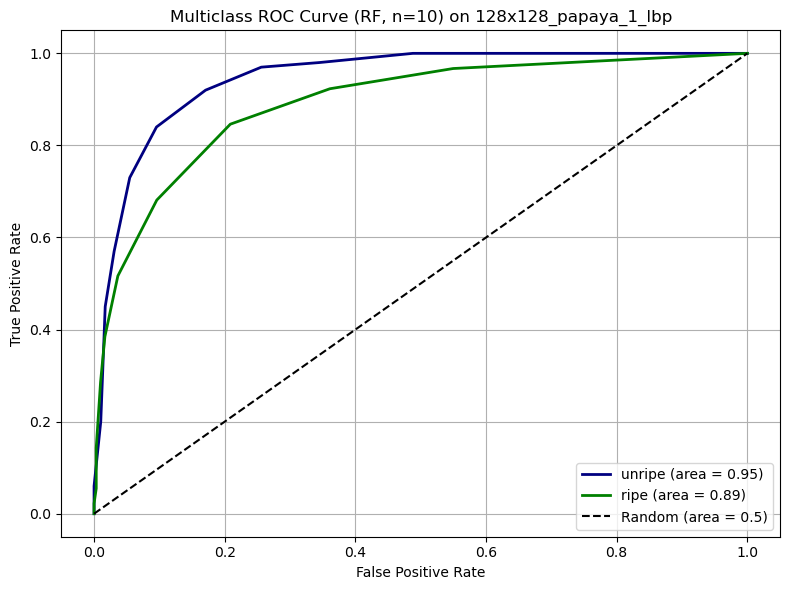


--- Random Forest (n_estimators=30) on 128x128_papaya_1_lbp ---
              precision    recall  f1-score   support

      unripe     0.7692    0.9000    0.8295       100
        ripe     0.8169    0.6374    0.7160        91

   micro avg     0.7872    0.7749    0.7810       191
   macro avg     0.7931    0.7687    0.7728       191
weighted avg     0.7919    0.7749    0.7754       191

Training time: 0.1326 seconds


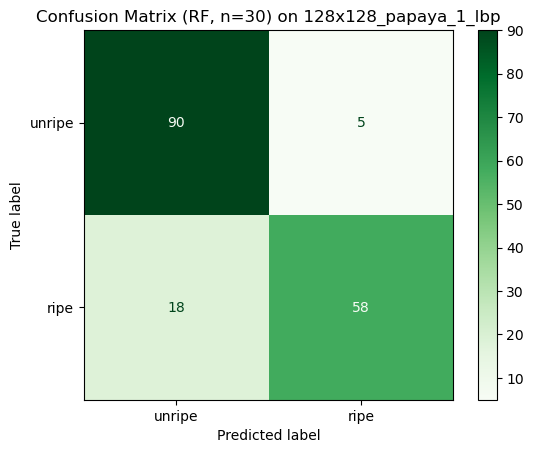

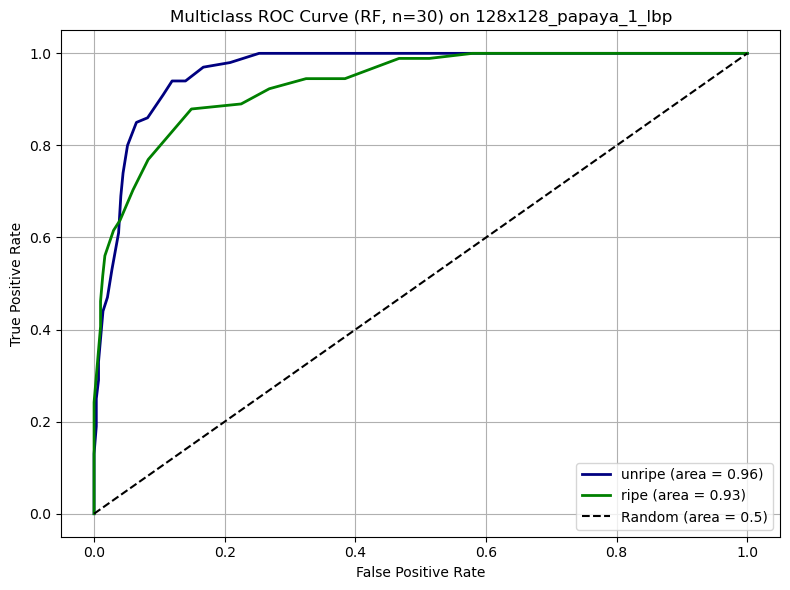


--- Random Forest (n_estimators=50) on 128x128_papaya_1_lbp ---
              precision    recall  f1-score   support

      unripe     0.7692    0.9000    0.8295       100
        ripe     0.7887    0.6154    0.6914        91

   micro avg     0.7766    0.7644    0.7704       191
   macro avg     0.7790    0.7577    0.7604       191
weighted avg     0.7785    0.7644    0.7637       191

Training time: 0.2126 seconds


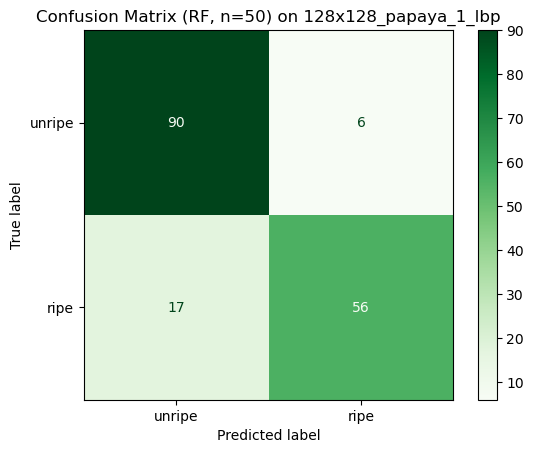

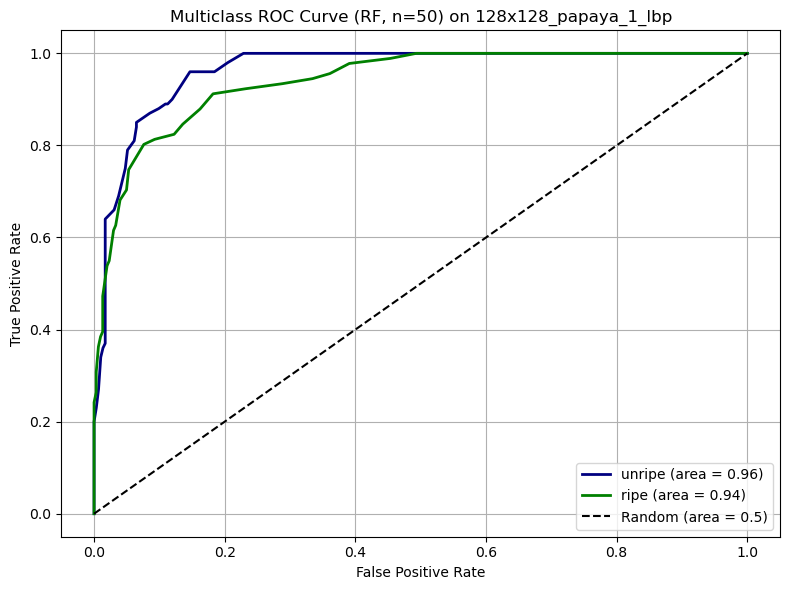


--- Random Forest (n_estimators=100) on 128x128_papaya_1_lbp ---
              precision    recall  f1-score   support

      unripe     0.7826    0.9000    0.8372       100
        ripe     0.8289    0.6923    0.7545        91

   micro avg     0.8010    0.8010    0.8010       191
   macro avg     0.8058    0.7962    0.7959       191
weighted avg     0.8047    0.8010    0.7978       191

Training time: 0.4475 seconds


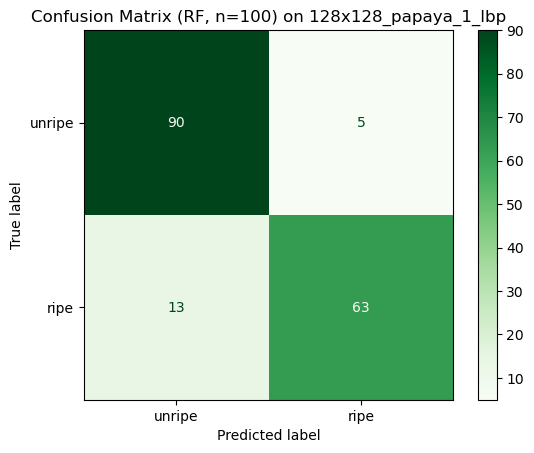

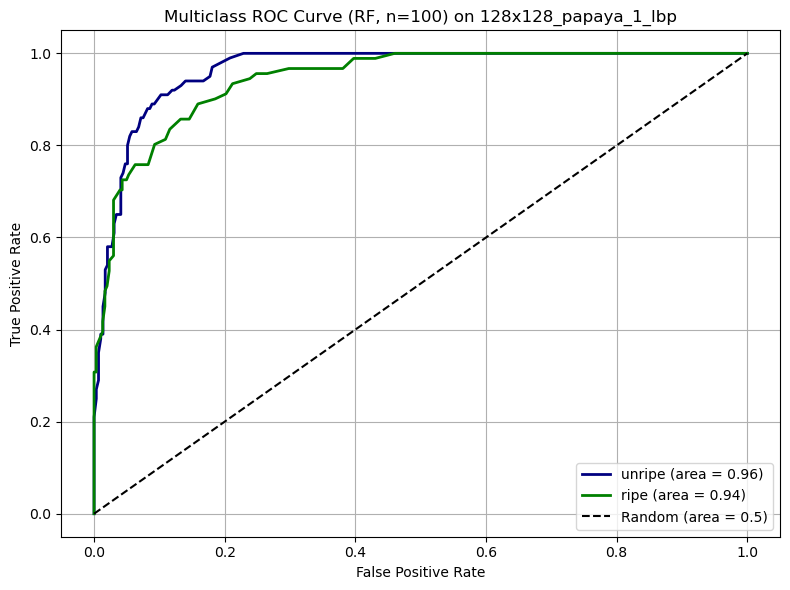


--- Random Forest (n_estimators=150) on 128x128_papaya_1_lbp ---
              precision    recall  f1-score   support

      unripe     0.7759    0.9000    0.8333       100
        ripe     0.8354    0.7253    0.7765        91

   micro avg     0.8000    0.8168    0.8083       191
   macro avg     0.8057    0.8126    0.8049       191
weighted avg     0.8042    0.8168    0.8062       191

Training time: 0.6418 seconds


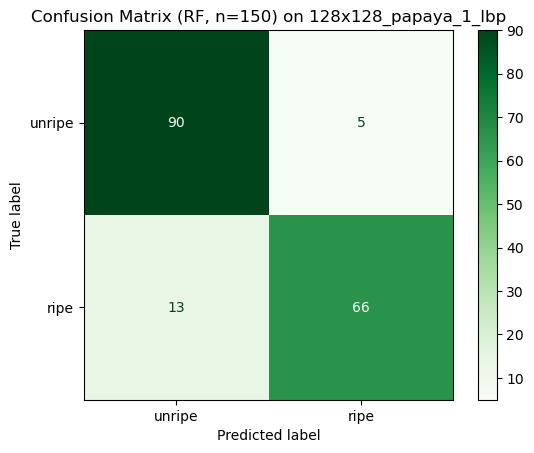

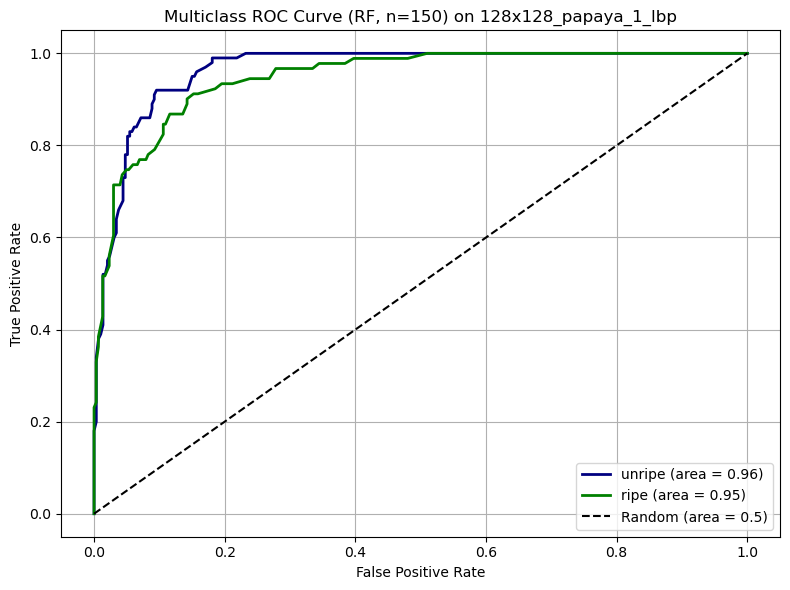


--- Random Forest (n_estimators=200) on 128x128_papaya_1_lbp ---
              precision    recall  f1-score   support

      unripe     0.7778    0.9100    0.8387       100
        ripe     0.8462    0.7253    0.7811        91

   micro avg     0.8051    0.8220    0.8135       191
   macro avg     0.8120    0.8176    0.8099       191
weighted avg     0.8104    0.8220    0.8112       191

Training time: 0.8581 seconds


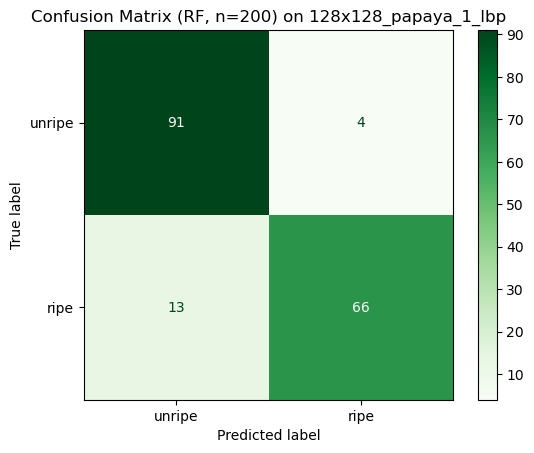

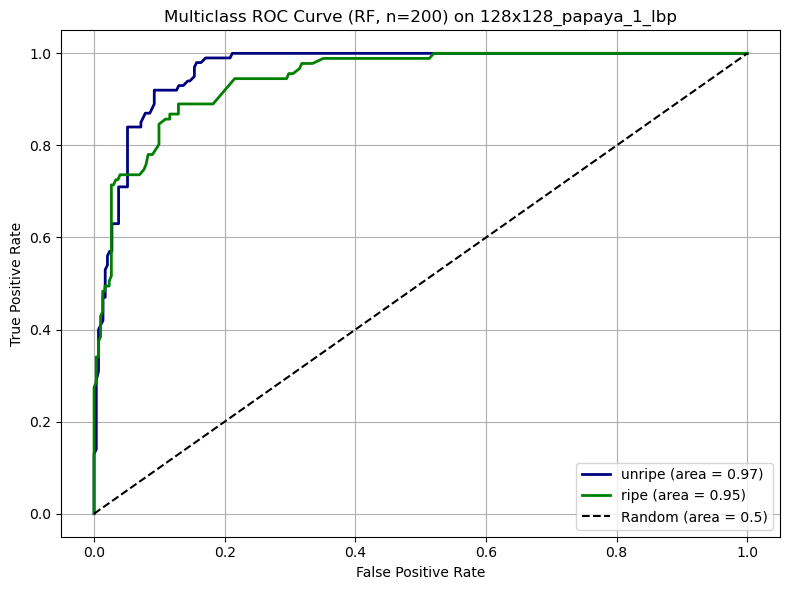

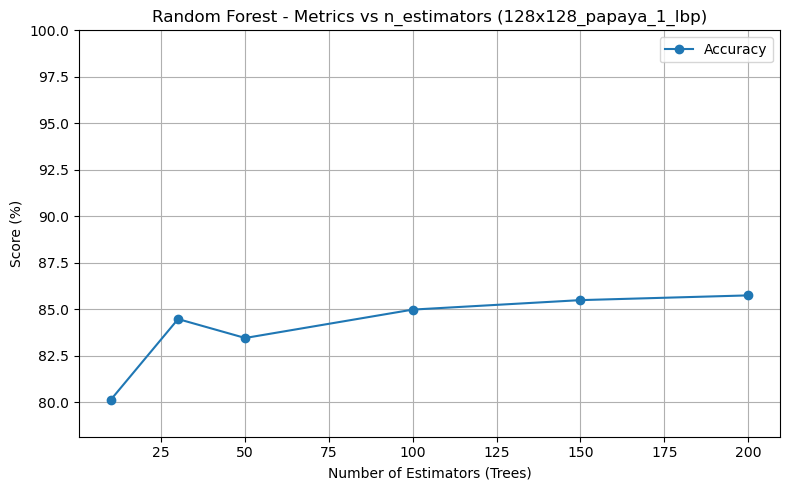

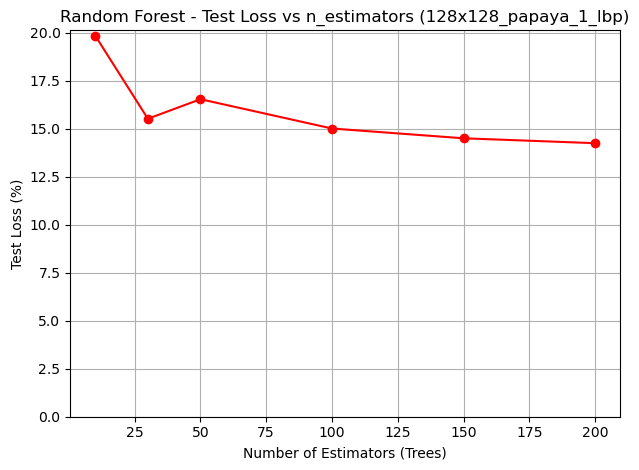

n_estimators  Accuracy (%)  Precision (%)  Recall (%)  F1-score (%)  \
0            10     80.152672      80.501055   80.152672     79.862671   
1            30     84.478372      84.769800   84.478372     84.228026   
2            50     83.460560      83.630063   83.460560     83.158331   
3           100     84.987277      85.222224   84.987277     84.857347   
4           150     85.496183      85.750098   85.496183     85.410453   
5           200     85.750636      86.046855   85.750636     85.653642   

   Test Loss (%)  Training Time (s)  
0      19.847328           0.042514  
1      15.521628           0.132553  
2      16.539440           0.212615  
3      15.012723           0.447528  
4      14.503817           0.641835  
5      14.249364           0.858117

In [24]:
from rf_classification import rf_classification

rf_classification(
    train_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lbp_train.csv", 
    test_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_lbp_test.csv",
    feature="128x128_papaya_1_lbp",
    class_order=['unripe', 'ripe']
)


--- Random Forest (n_estimators=10) on 128x128_papaya_1_glcm ---
              precision    recall  f1-score   support

      unripe     0.8785    0.9400    0.9082       100
        ripe     0.8553    0.7143    0.7784        91

   micro avg     0.8689    0.8325    0.8503       191
   macro avg     0.8669    0.8271    0.8433       191
weighted avg     0.8674    0.8325    0.8464       191

Training time: 0.0252 seconds


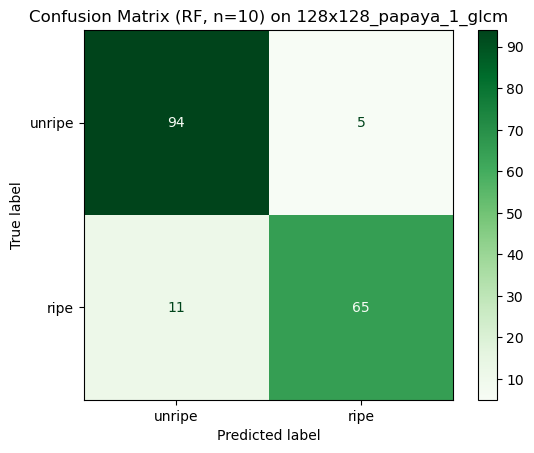

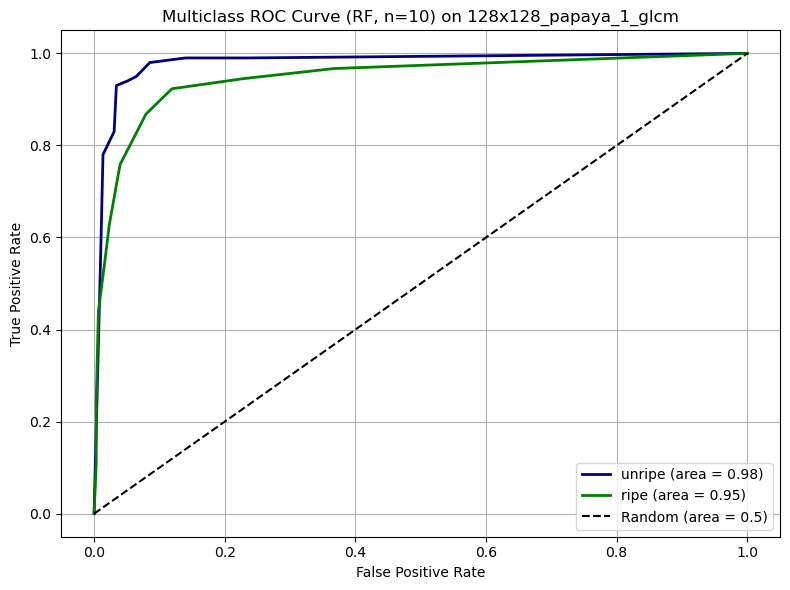


--- Random Forest (n_estimators=30) on 128x128_papaya_1_glcm ---
              precision    recall  f1-score   support

      unripe     0.8868    0.9400    0.9126       100
        ripe     0.8046    0.7692    0.7865        91

   micro avg     0.8497    0.8586    0.8542       191
   macro avg     0.8457    0.8546    0.8496       191
weighted avg     0.8476    0.8586    0.8525       191

Training time: 0.0815 seconds


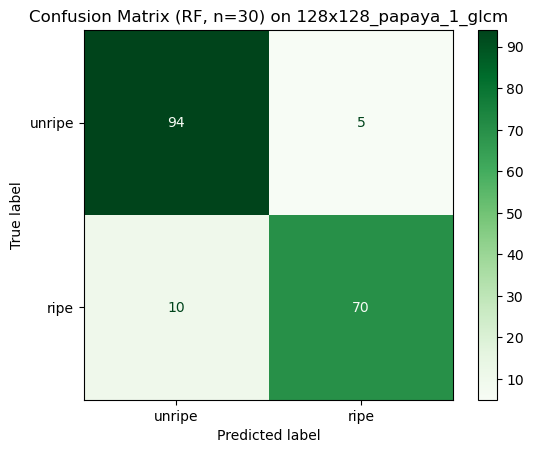

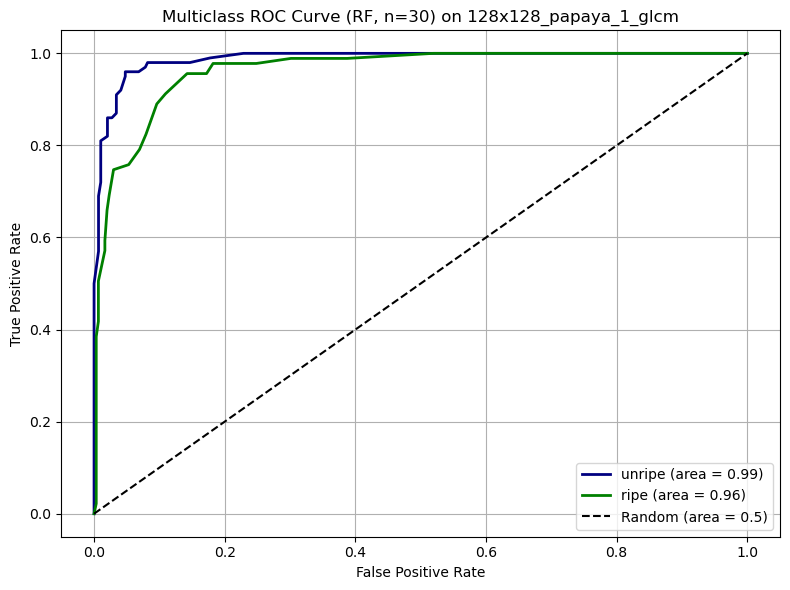


--- Random Forest (n_estimators=50) on 128x128_papaya_1_glcm ---
              precision    recall  f1-score   support

      unripe     0.8704    0.9400    0.9038       100
        ripe     0.8313    0.7582    0.7931        91

   micro avg     0.8534    0.8534    0.8534       191
   macro avg     0.8508    0.8491    0.8485       191
weighted avg     0.8518    0.8534    0.8511       191

Training time: 0.1431 seconds


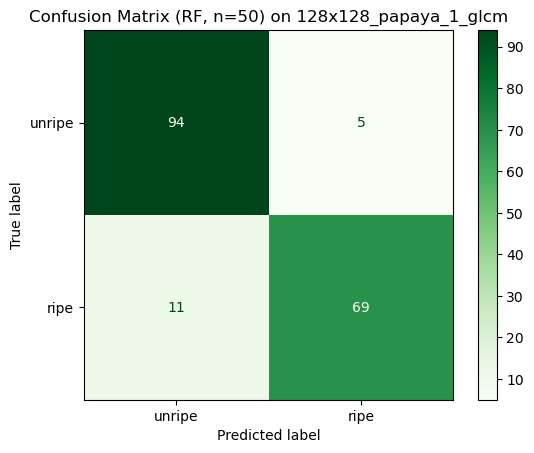

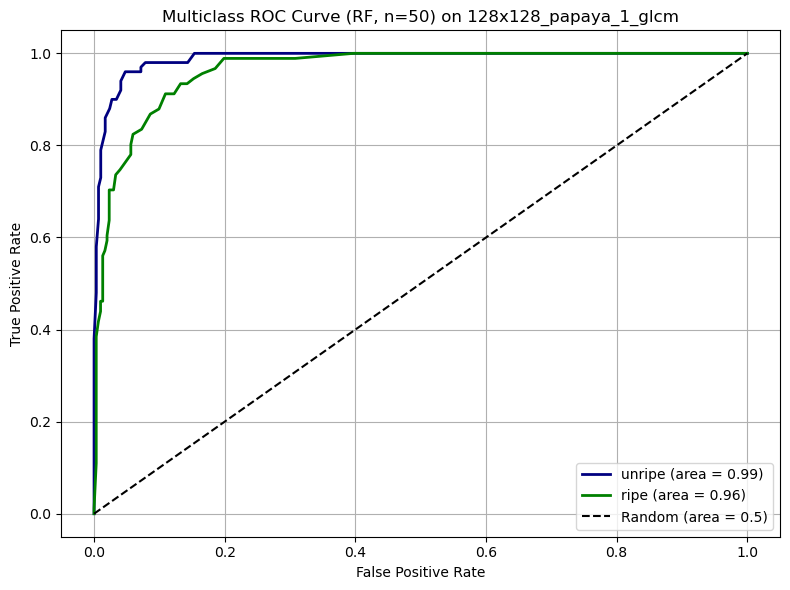


--- Random Forest (n_estimators=100) on 128x128_papaya_1_glcm ---
              precision    recall  f1-score   support

      unripe     0.8636    0.9500    0.9048       100
        ripe     0.8452    0.7802    0.8114        91

   micro avg     0.8557    0.8691    0.8623       191
   macro avg     0.8544    0.8651    0.8581       191
weighted avg     0.8549    0.8691    0.8603       191

Training time: 0.2506 seconds


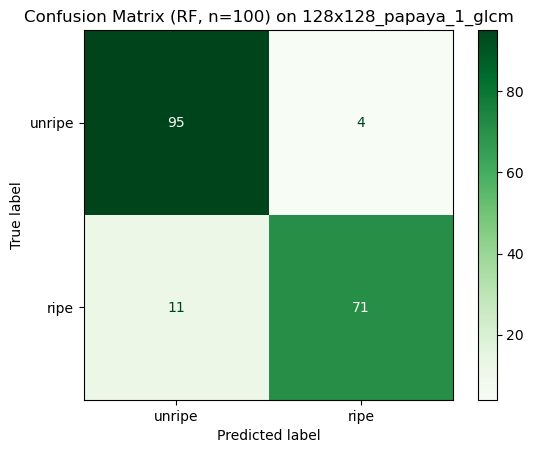

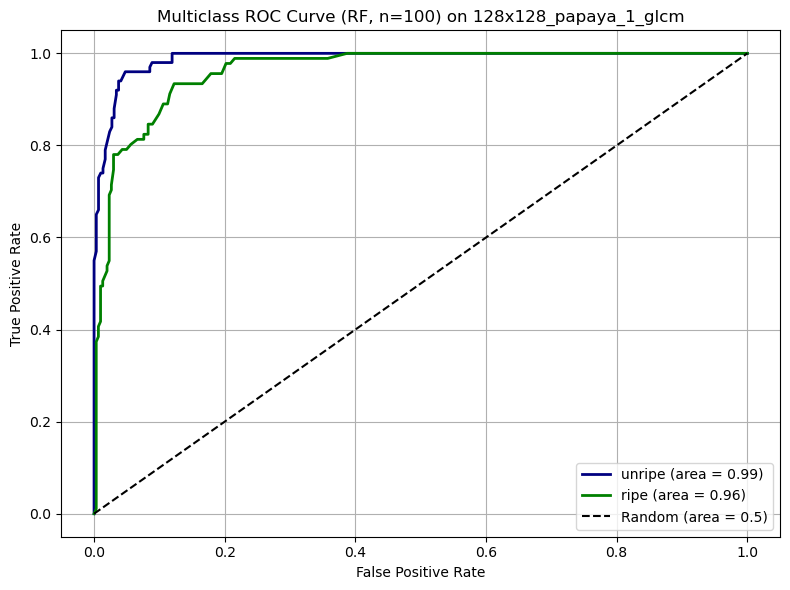


--- Random Forest (n_estimators=150) on 128x128_papaya_1_glcm ---
              precision    recall  f1-score   support

      unripe     0.8716    0.9500    0.9091       100
        ripe     0.8353    0.7802    0.8068        91

   micro avg     0.8557    0.8691    0.8623       191
   macro avg     0.8534    0.8651    0.8580       191
weighted avg     0.8543    0.8691    0.8604       191

Training time: 0.3785 seconds


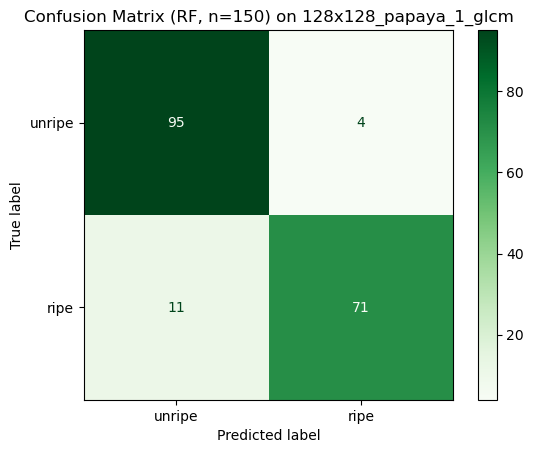

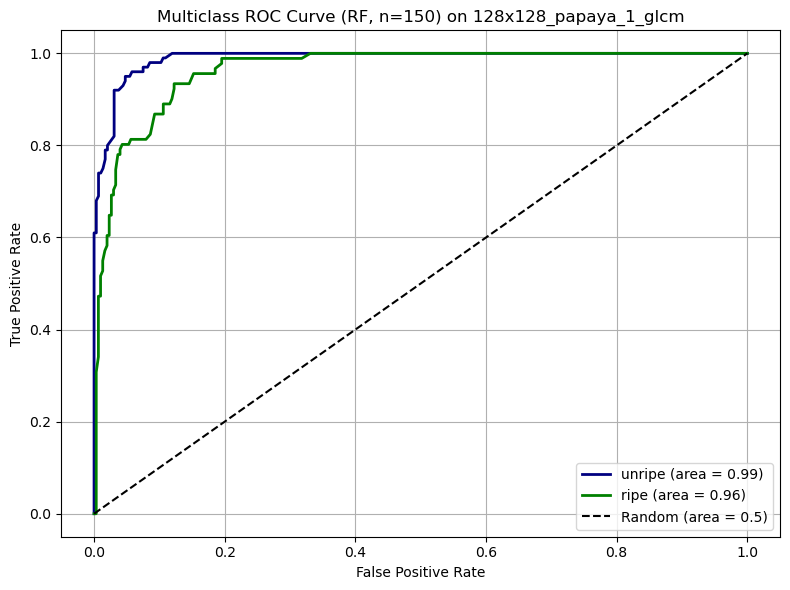


--- Random Forest (n_estimators=200) on 128x128_papaya_1_glcm ---
              precision    recall  f1-score   support

      unripe     0.8879    0.9500    0.9179       100
        ripe     0.8333    0.7692    0.8000        91

   micro avg     0.8639    0.8639    0.8639       191
   macro avg     0.8606    0.8596    0.8589       191
weighted avg     0.8619    0.8639    0.8617       191

Training time: 0.4914 seconds


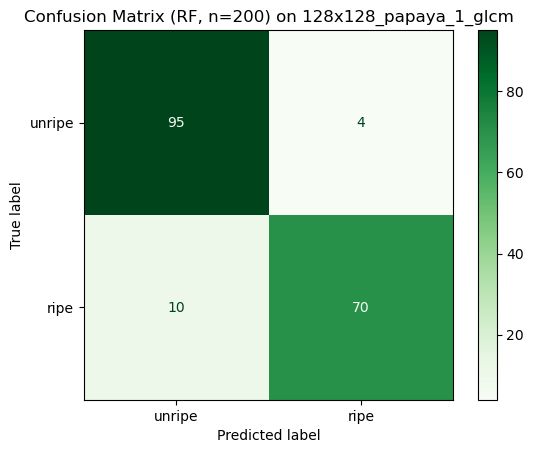

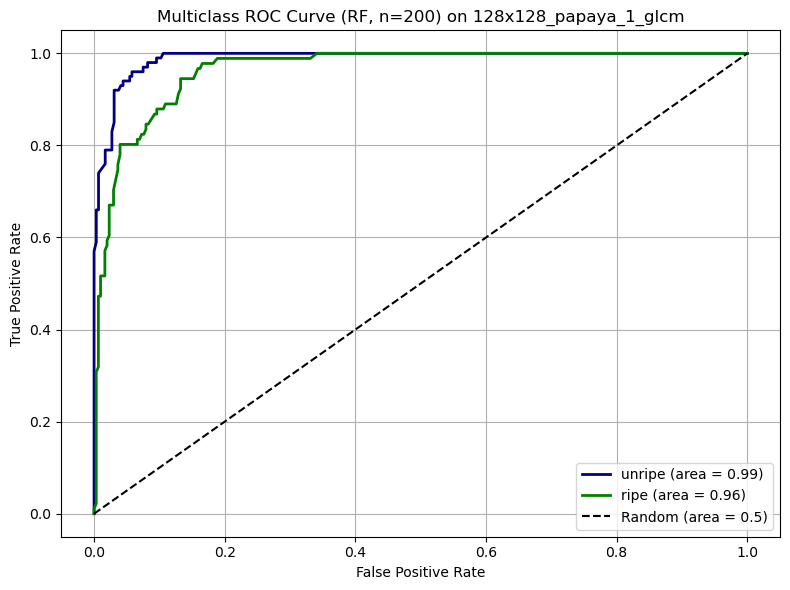

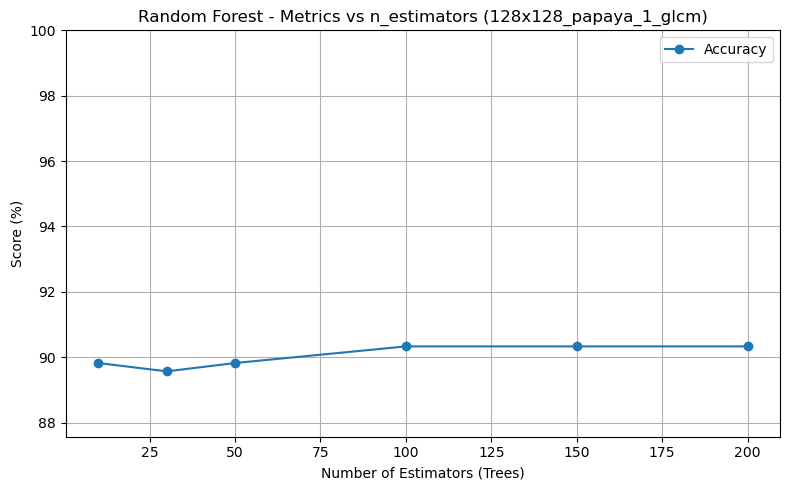

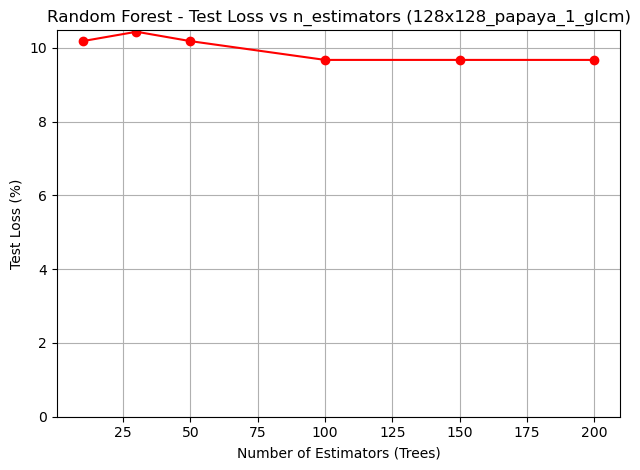

n_estimators  Accuracy (%)  Precision (%)  Recall (%)  F1-score (%)  \
0            10     89.821883      89.814846   89.821883     89.609375   
1            30     89.567430      89.472767   89.567430     89.488734   
2            50     89.821883      89.742402   89.821883     89.709168   
3           100     90.330789      90.315367   90.330789     90.234975   
4           150     90.330789      90.286722   90.330789     90.238374   
5           200     90.330789      90.233684   90.330789     90.225812   

   Test Loss (%)  Training Time (s)  
0      10.178117           0.025153  
1      10.432570           0.081508  
2      10.178117           0.143096  
3       9.669211           0.250647  
4       9.669211           0.378481  
5       9.669211           0.491361

In [25]:
from rf_classification import rf_classification

rf_classification(
    train_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_glcm_train.csv", 
    test_csv=r"C:\Users\User\Desktop\FYP\Dataset\papaya_1\128x128_glcm_test.csv",
    feature="128x128_papaya_1_glcm",
    class_order=['unripe', 'ripe']
)
